In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/snis-2010-2019-cleaned.csv")
df.drop(['Unnamed: 0'], axis = 1, inplace = True) 

In [ ]:
df = pd.read_csv("snis_oobr_2010.csv")
df

Municipio  Nascimentos  Porc_prematuros  Porc_cesareas  \
0          ADAMANTINA          384         5.729167      87.500000   
1              ADOLFO           33        15.151515      87.878788   
2               AGUAI          490         7.959184      66.734694   
3      AGUAS DA PRATA           66         7.575758      65.151515   
4    AGUAS DE LINDOIA          275         9.090909      59.272727   
..                ...          ...              ...            ...   
576         VIRADOURO          225         7.111111      84.444444   
577    VITORIA BRASIL           19         5.263158      73.684211   
578        VOTORANTIM         1646         7.481752      55.839416   
579       VOTUPORANGA         1010        10.406343      86.904762   
580          ZACARIAS           25         8.000000      72.000000   

     Porc_grav_multipla  Porc_anomalias  Porc_nenhuma_consulta  \
0              1.562500        0.520833               0.000000   
1              0.000000        0.000000               0.000000   
2              1.224490        0.216450               1.840491   
3              3.030303        0.000000               1.515152   
4              0.727273        0.000000               1.094891   
..                  ...             ...                    ...   
576            4.888889        0.888889               0.444444   
577            0.000000        0.913495               0.000000   
578            1.458080        1.518834               0.304878   
579            2.475248        0.697906               0.300601   
580            0.000000        0.000000               4.000000   

     Porc_consulta7mais  Porc_feminino  Porc_peso_menor_2500  ...  \
0             96.354167      43.489583              8.593750  ...   
1             78.787879      36.363636              6.060606  ...   
2             67.484663      46.530612             10.000000  ...   
3             69.696970      51.515152             15.151515  ...   
4             80.291971      50.909091              5.818182  ...   
..                  ...            ...                   ...  ...   
576           84.888889      49.777778              9.333333  ...   
577           94.736842      42.105263              5.263158  ...   
578           90.670732      48.724180              8.869988  ...   
579           91.583166      47.524752              9.702970  ...   
580           84.000000      48.000000              8.000000  ...   

     IN022 - Consumo médio percapita de água  \
0                                      181.7   
1                                      165.1   
2                                      559.9   
3                                      202.2   
4                                      161.3   
..                                       ...   
576                                    238.6   
577                                    144.1   
578                                    285.3   
579                                    227.2   
580                                    164.4   

     IN049 - Índice de perdas na distribuição  \
0                                       24.06   
1                                       18.47   
2                                        6.57   
3                                       17.87   
4                                       53.27   
..                                        ...   
576                                     38.21   
577                                      9.79   
578                                      1.52   
579                                     16.45   
580                                     16.24   

     IN052 - Índice de consumo de água  \
0                                75.93   
1                                81.52   
2                                93.42   
3                                82.12   
4                                46.72   
..                                 ...   
576                              61.78   
577                              90.20   
578  

In [ ]:
from math import sqrt
from sklearn.cluster import KMeans

def calculate_wcss(data):
  wcss = []
  for n in range(2, 9):
    kmeans = KMeans(n_clusters=n,algorithm='elkan')
    kmeans.fit(X=data)
    wcss.append(kmeans.inertia_)

  return wcss

def optimal_number_of_clusters(wcss):
  rodadas_cluster = []
  x1, y1 = 2, wcss[0]
  x2, y2 = 11, wcss[len(wcss)-1]

  distances = []
  for i in range(len(wcss)):
    #print('track d',i)
    x0 = i+2
    y0 = wcss[i]
    numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
    distances.append(numerator/denominator)
  rodadas_cluster.append([distances.index(max(distances)) + 2,pd.Series(distances).mean(),pd.Series(distances).std(), max(distances), min(distances)])
  

  return rodadas_cluster


def melhor_valor_k_(data, tit):
  sum_of_squares = calculate_wcss(data)
  rodadas_cluster = optimal_number_of_clusters(sum_of_squares) 
  rodadas_cluster.append("".join(tit[0:5])+str(len(tit)))
  dfDistanciasQuadraticasVetores = pd.DataFrame(sum_of_squares)
  #dfDisQuadVetScaled = (dfDistanciasQuadraticasVetores - dfDistanciasQuadraticasVetores.min())  / (dfDistanciasQuadraticasVetores.max() - dfDistanciasQuadraticasVetores.min()) #dfDistanciasQuadraticasVetores.std()    #
  dfDisQuadVetScaled = (dfDistanciasQuadraticasVetores - dfDistanciasQuadraticasVetores.mean())  / dfDistanciasQuadraticasVetores.std()    #
  dfDistanciasQuadraticasVetores.columns=['']
  #ax = dfDisQuadVetScaled.plot(legend=False)
  #ax.set_xlabel("Number of Clusters")
  #ax.set_ylabel("Sum of Euclidian Distances Scale")
  #plt.title('%s melhor valor de k: %d' % ("".join(tit[:10]),rodadas_cluster[0]))
  #dfDisQuadVetScaled
  return rodadas_cluster 

#def nome_do_codigo(cod):
#  return dfes[dfes['UF']==cod]['UFN'].unique()[0]

#print(melhor_valor_k_(dados_s[feat_set[0]]\
#                      #.fillna(value=dados_s[feat_set[0]].mean()),"Completo") ) 
#                      .fillna(value=0),"Completo") ) 
#print(melhor_valor_k_(dados_s[feat_set[1]]\
#                      #.fillna(value=dados_s[feat_set[1]].mean()),"Obstétrico") ) 
#                      .fillna(value=0),"Obstétrico") ) 



#clusteriza_benchmark(dados[feat_set[0]]\
#                      .fillna(value=dados[feat_set[0]].mean()), 'Socioeconomico & Obstétrico')

#clusteriza_benchmark(dados[feat_set[1]]\
#                      .fillna(value=dados[feat_set[1]].mean()), 'Obstétrico')

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np


def clusteriza_benchmark(X, titulo):
  rodada_inertia = {}
  rodada_distocao = {}
  metricas = ['euclidean', 
              'minkowski',
              'cityblock',
              'seuclidean',
              'sqeuclidean',
              'cosine', 
              'correlation',
              'hamming',
              #'jaccard',
              'jensenshannon',
              'chebyshev',
              'canberra',
              #'braycurtis',
              #'mahalanobis',
              #'yule',
              #'matching',
              #'dice',
              #'kulsinski',
              #'rogerstanimoto', 
              #'russellrao',
              #'sokalmichener', 
              #'sokalsneath',
              #'wminkowski',
              ]
  
  for met in tqdm(metricas):
    distortions = []
    inertias = []
    mapping1 = {}
    mapping2 = {}
    K = range(2, 9)

    for k in tqdm(K):
        #print("%s %d" %(met, k))
        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                            met), axis=1)) / X.shape[0])
        inertias.append(kmeanModel.inertia_)
        mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                      met), axis=1)) / X.shape[0]
        mapping2[k] = kmeanModel.inertia_
    mpl1 = []
    for key, val in mapping1.items():
      
      mpl1.append(val)    
    mp1 = pd.Series(mpl1.copy())  
    rodada_distocao[met] = (mp1 - mp1.mean())/mp1.std()

    mpl2 = []
    for key, val in mapping2.items():    
      mpl2.append(val)

    mp2 = pd.Series(mpl2.copy())  
    rodada_inertia[met] = (mp2 - mp2.mean())/mp2.std()

  dfdistortion = pd.DataFrame.from_dict(rodada_distocao)
  dfdistortion.index=list(K)

  dfinertia = pd.DataFrame.from_dict(rodada_inertia)
  dfinertia.index=list(K)  
  
  ax = dfdistortion.plot(title=titulo,figsize=(9.08,5))
  ax.legend(loc='upper left')
  plt.grid(color='grey', linestyle=':', linewidth=.5)
  ax.set(xlabel='Valores de K', ylabel='Distorção Normalizada')  
  plt.tight_layout()
  #salva_imagem_drive(plt, 'linplot Corr. Distorcao: '+ str(titulo))
  plt.show()

  
  ax = dfinertia.plot(title=titulo,figsize=(9.08,5))
  ax.legend(loc='upper left')
  plt.grid(color='grey', linestyle=':', linewidth=.5)
  plt.tight_layout()
  ax.set(xlabel='Valores de K', ylabel='Inércia Normalizada')
  #salva_imagem_drive(plt, 'linplot Corr. Inércias: ' + titulo)
  plt.show()

100%|██████████| 11/11 [00:22<00:00,  2.06s/it]


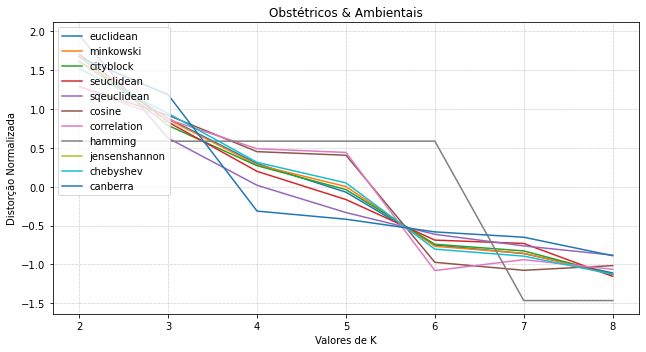

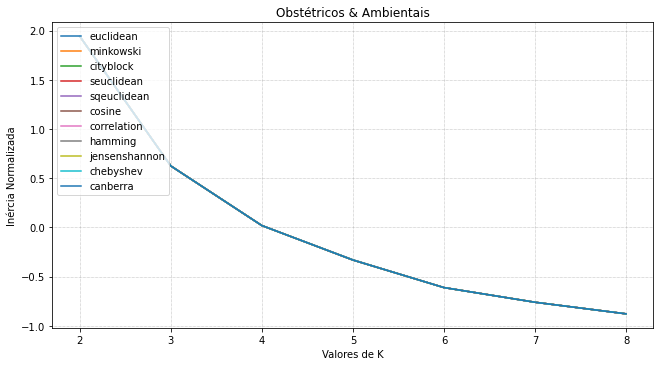

In [ ]:
clusteriza_benchmark(df[df.columns[1:-1]], "Obstétricos & Ambientais")

# Quantidade ótima de Clusters

In [ ]:
d

In [ ]:
X = df[df.columns[1:-1]].copy()
for c in df.columns[1:-1]:
  X[c]  = (X[c] - X[c].mean())/X[c].std()
n_clusters = melhor_valor_k_(X, "Obstétricos & Ambientais")

In [ ]:
int(max(n_clusters[0]))

8

In [ ]:
max()

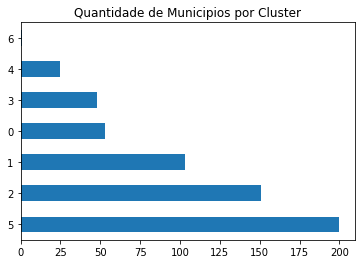

In [ ]:
kmeans = KMeans(n_clusters=7,algorithm='elkan')
kmeans.fit(X=X)
X['Cluster'] = kmeans.labels_
X['Cluster'].value_counts().plot(kind='barh', title='Quantidade de Municipios por Cluster')

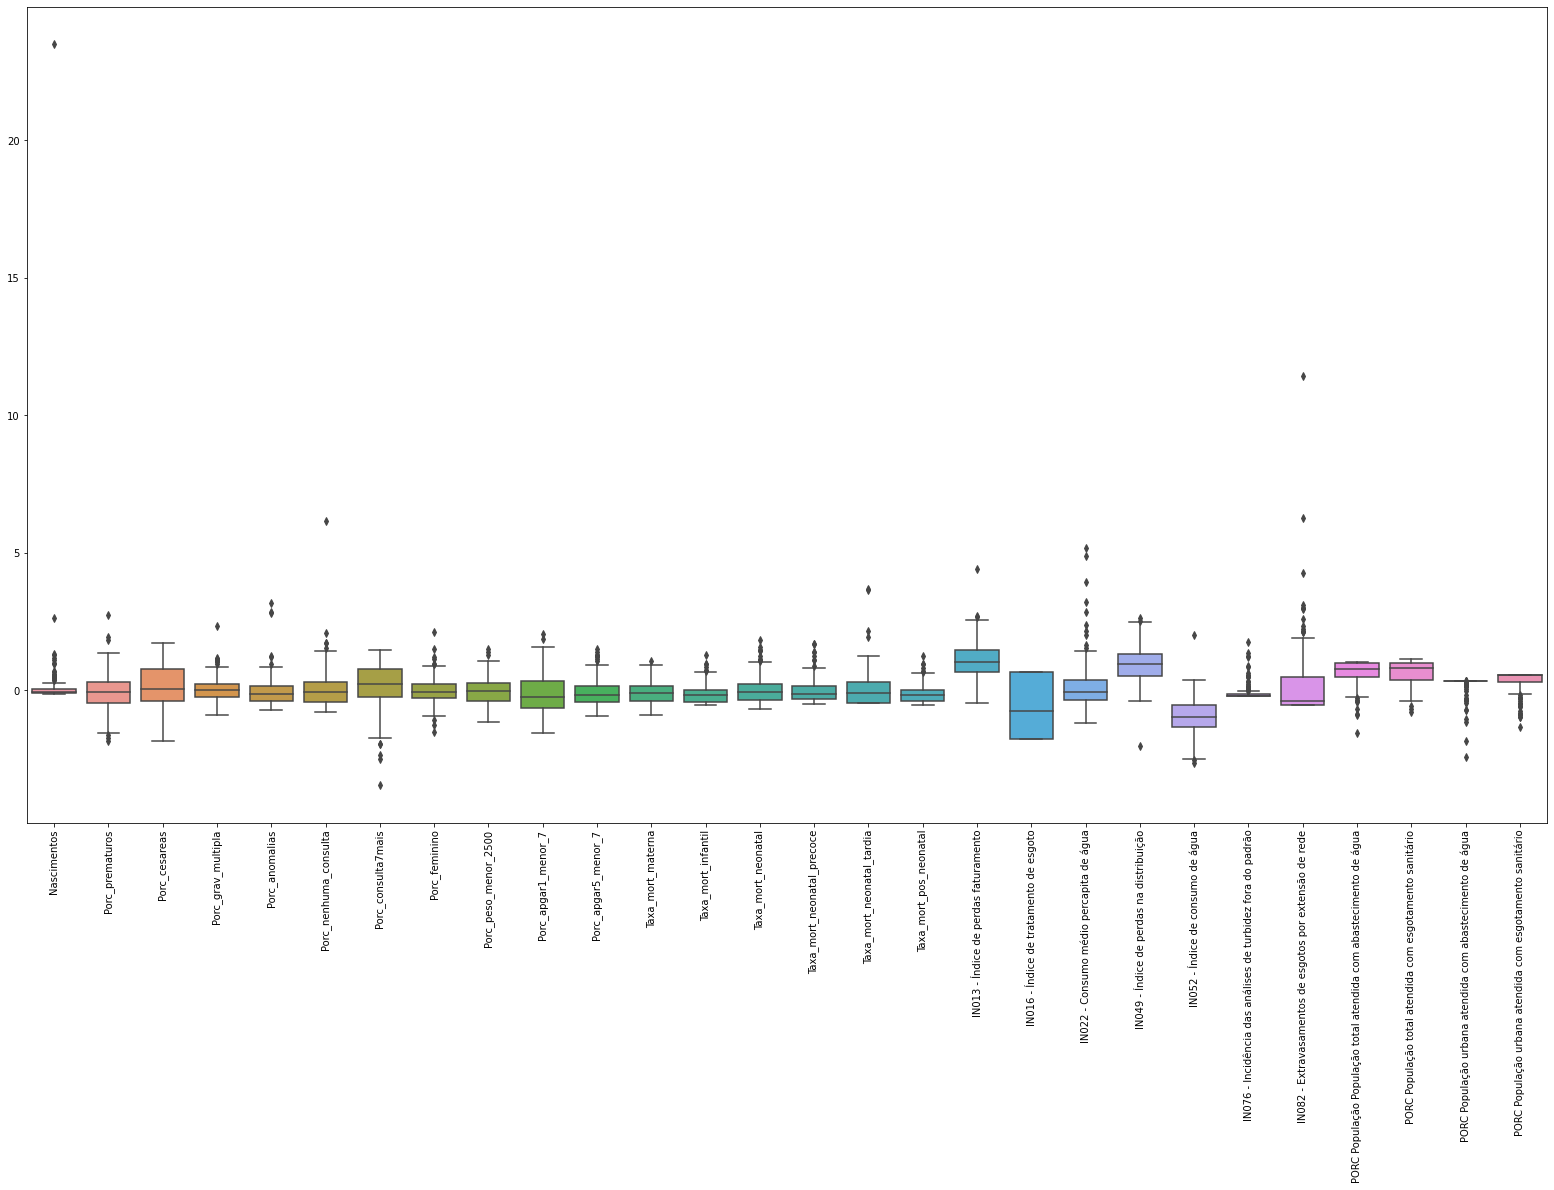

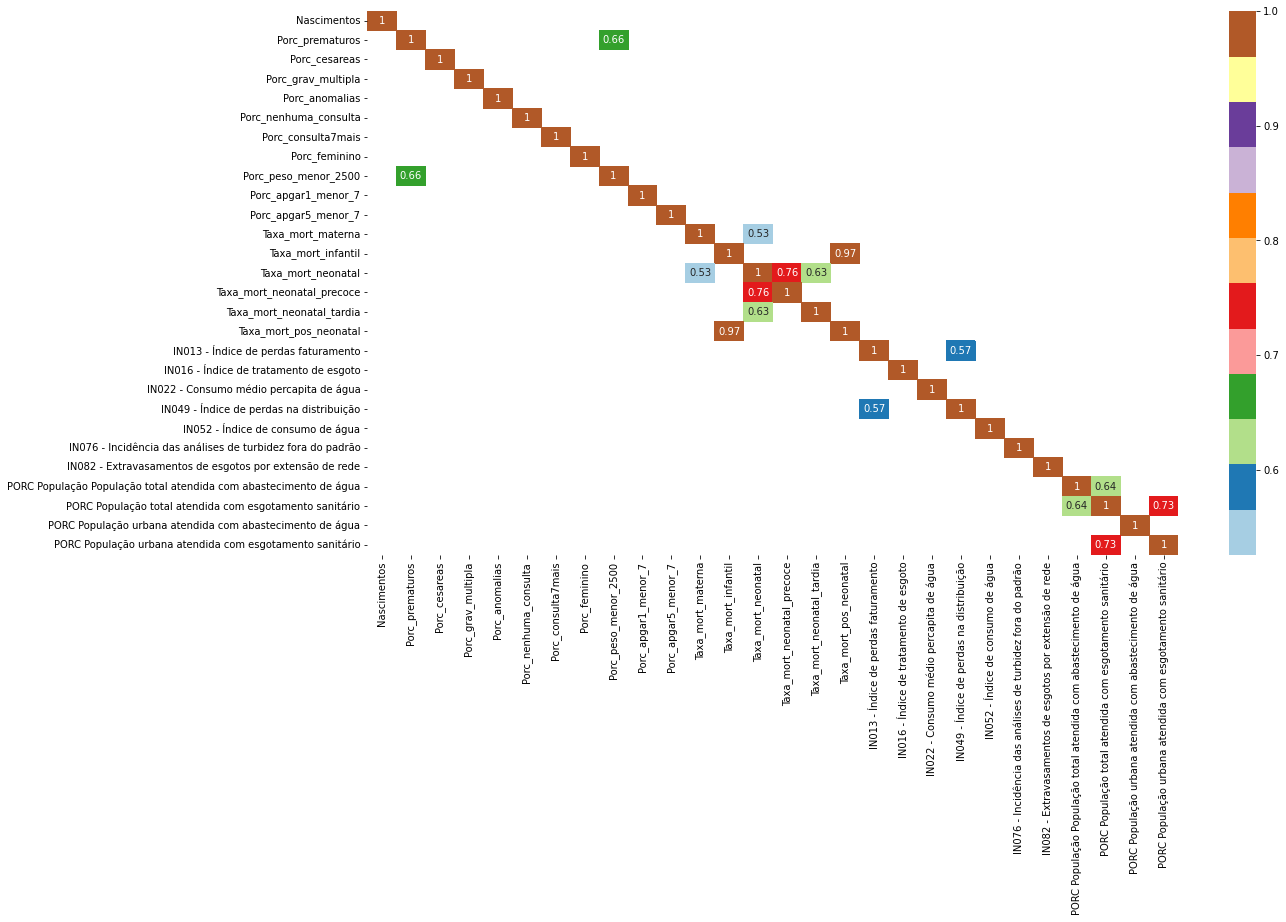

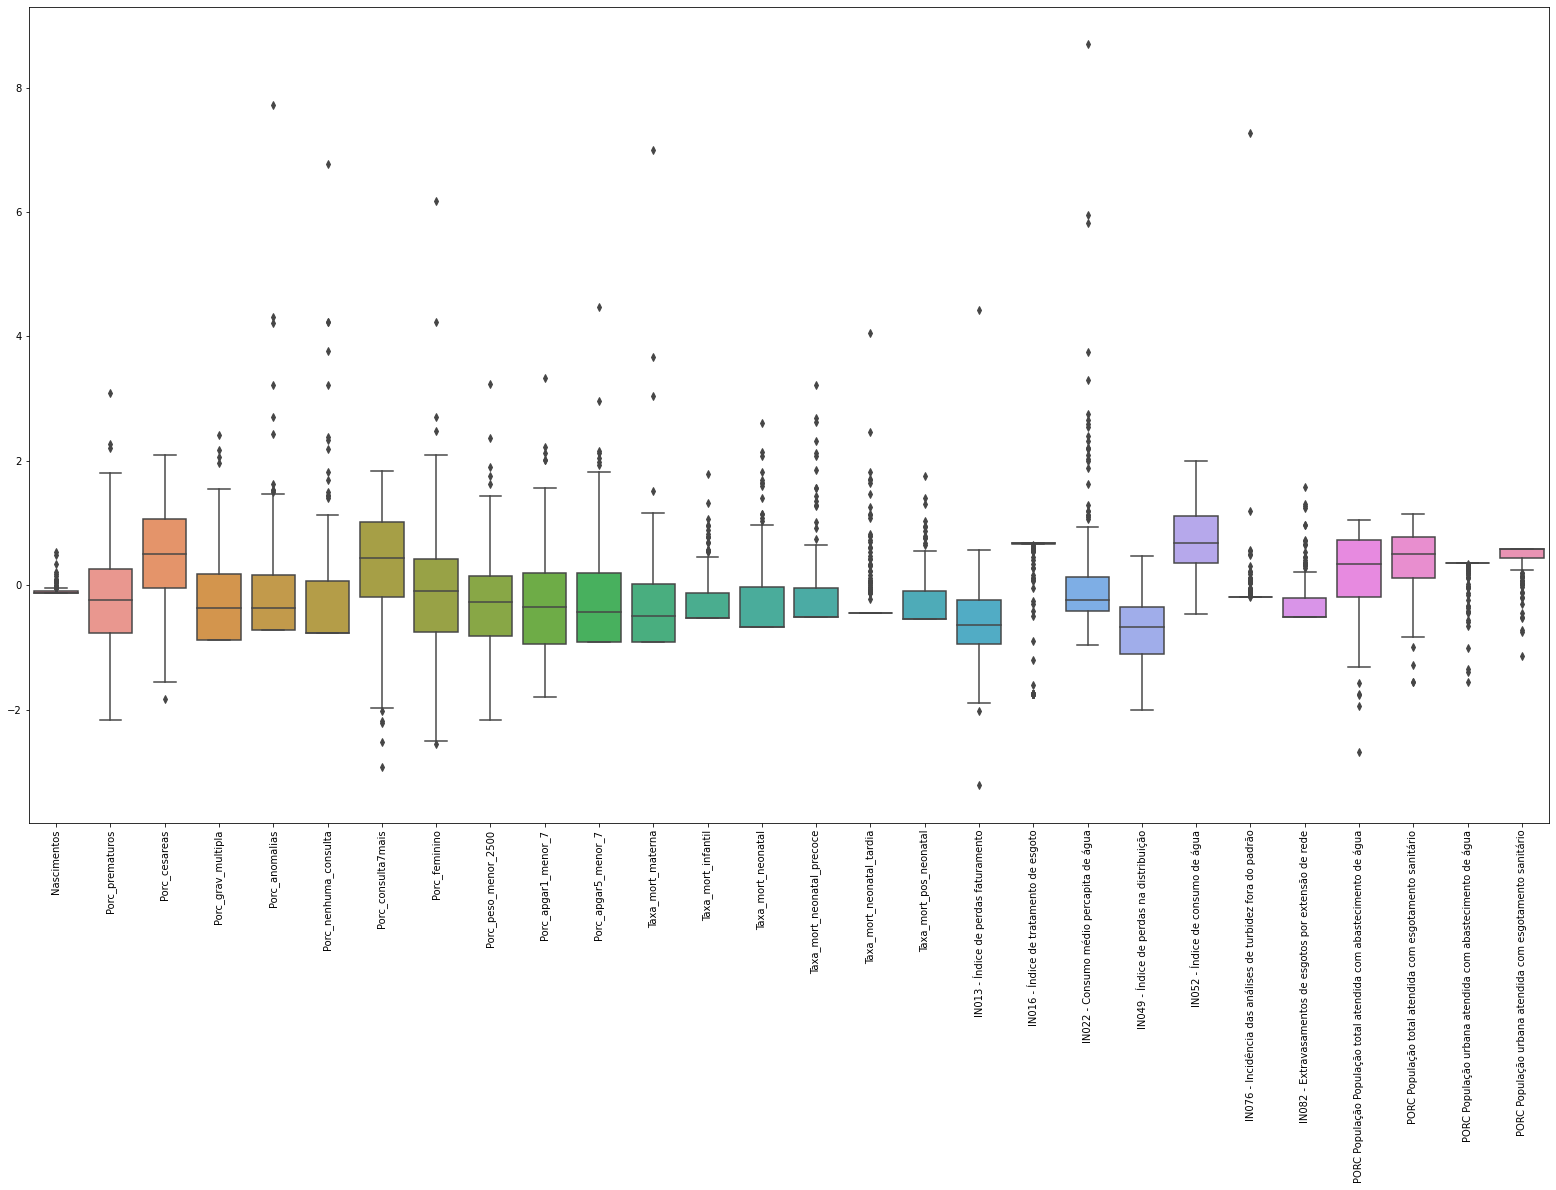

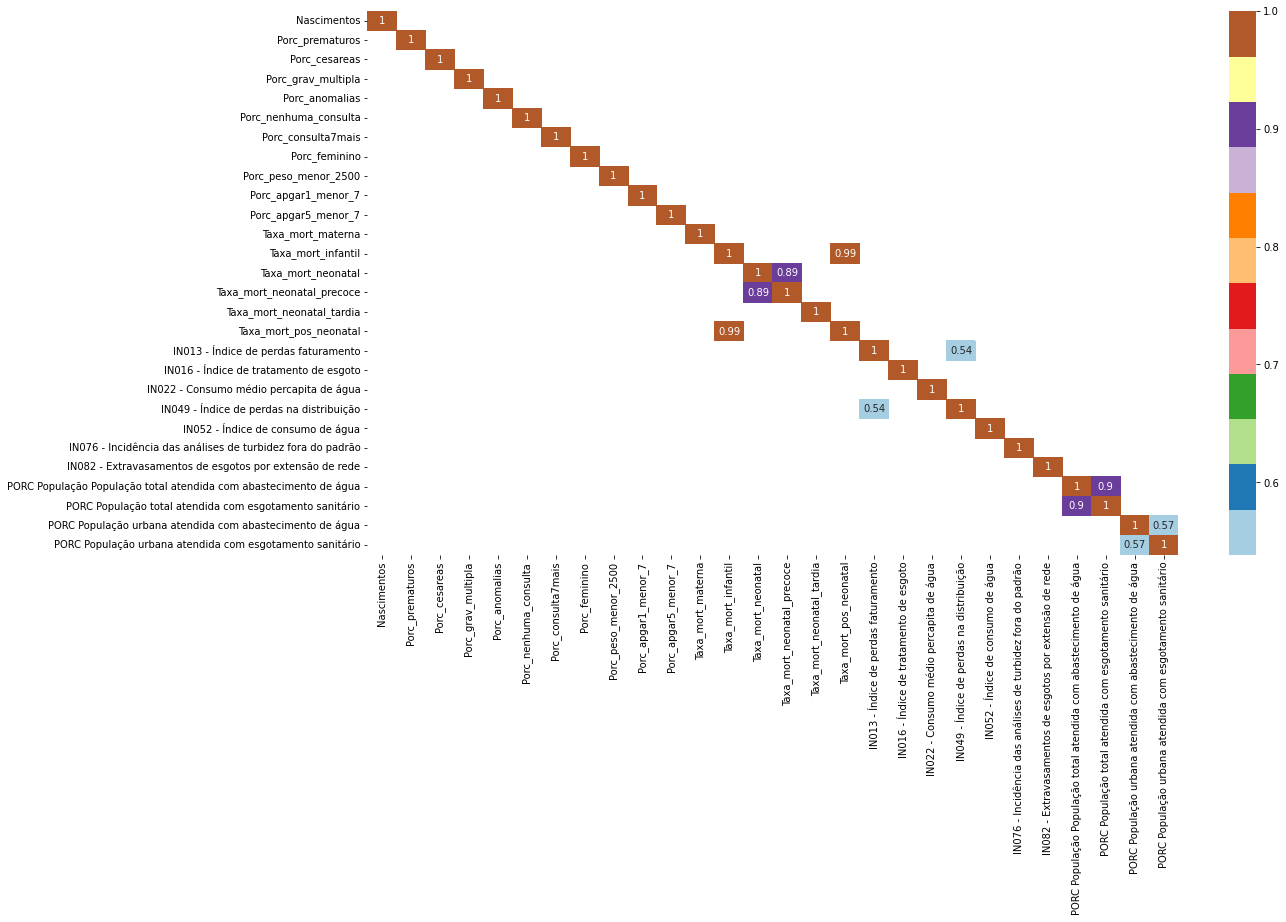

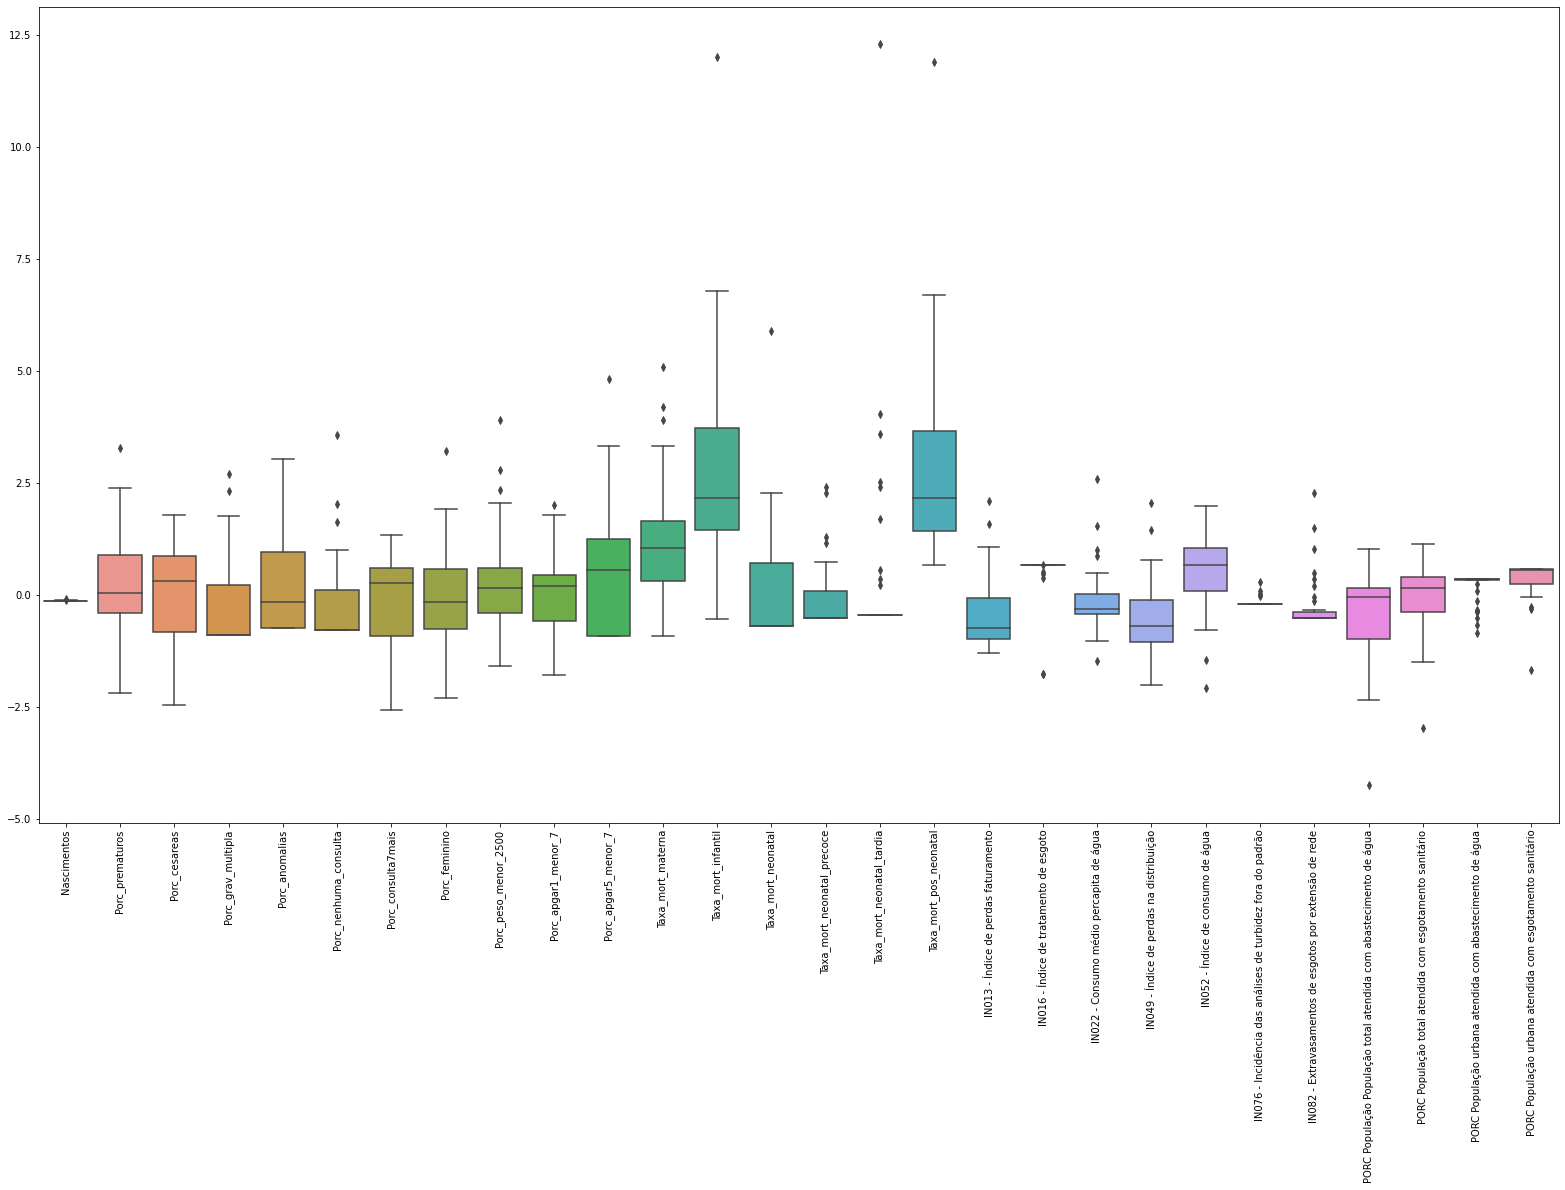

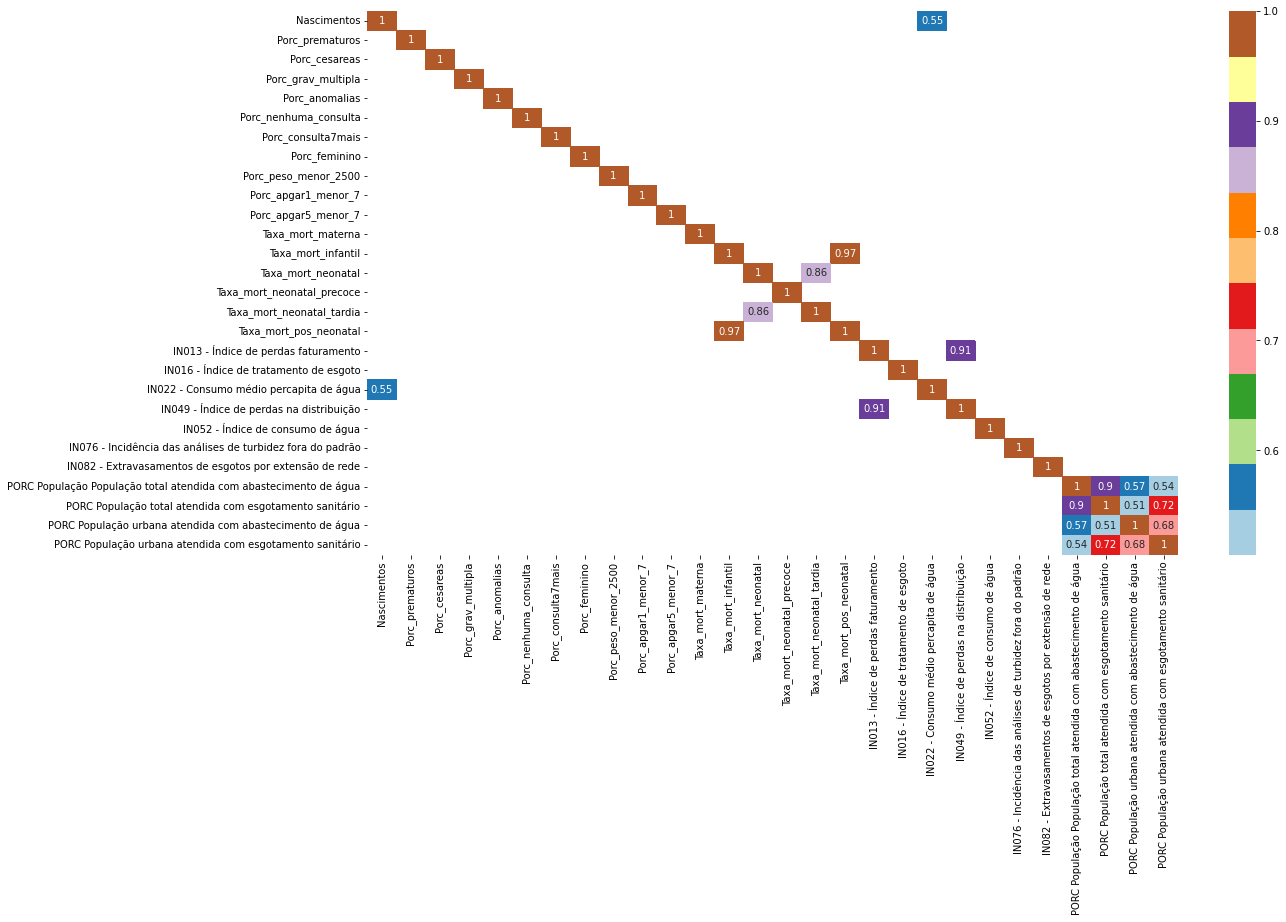

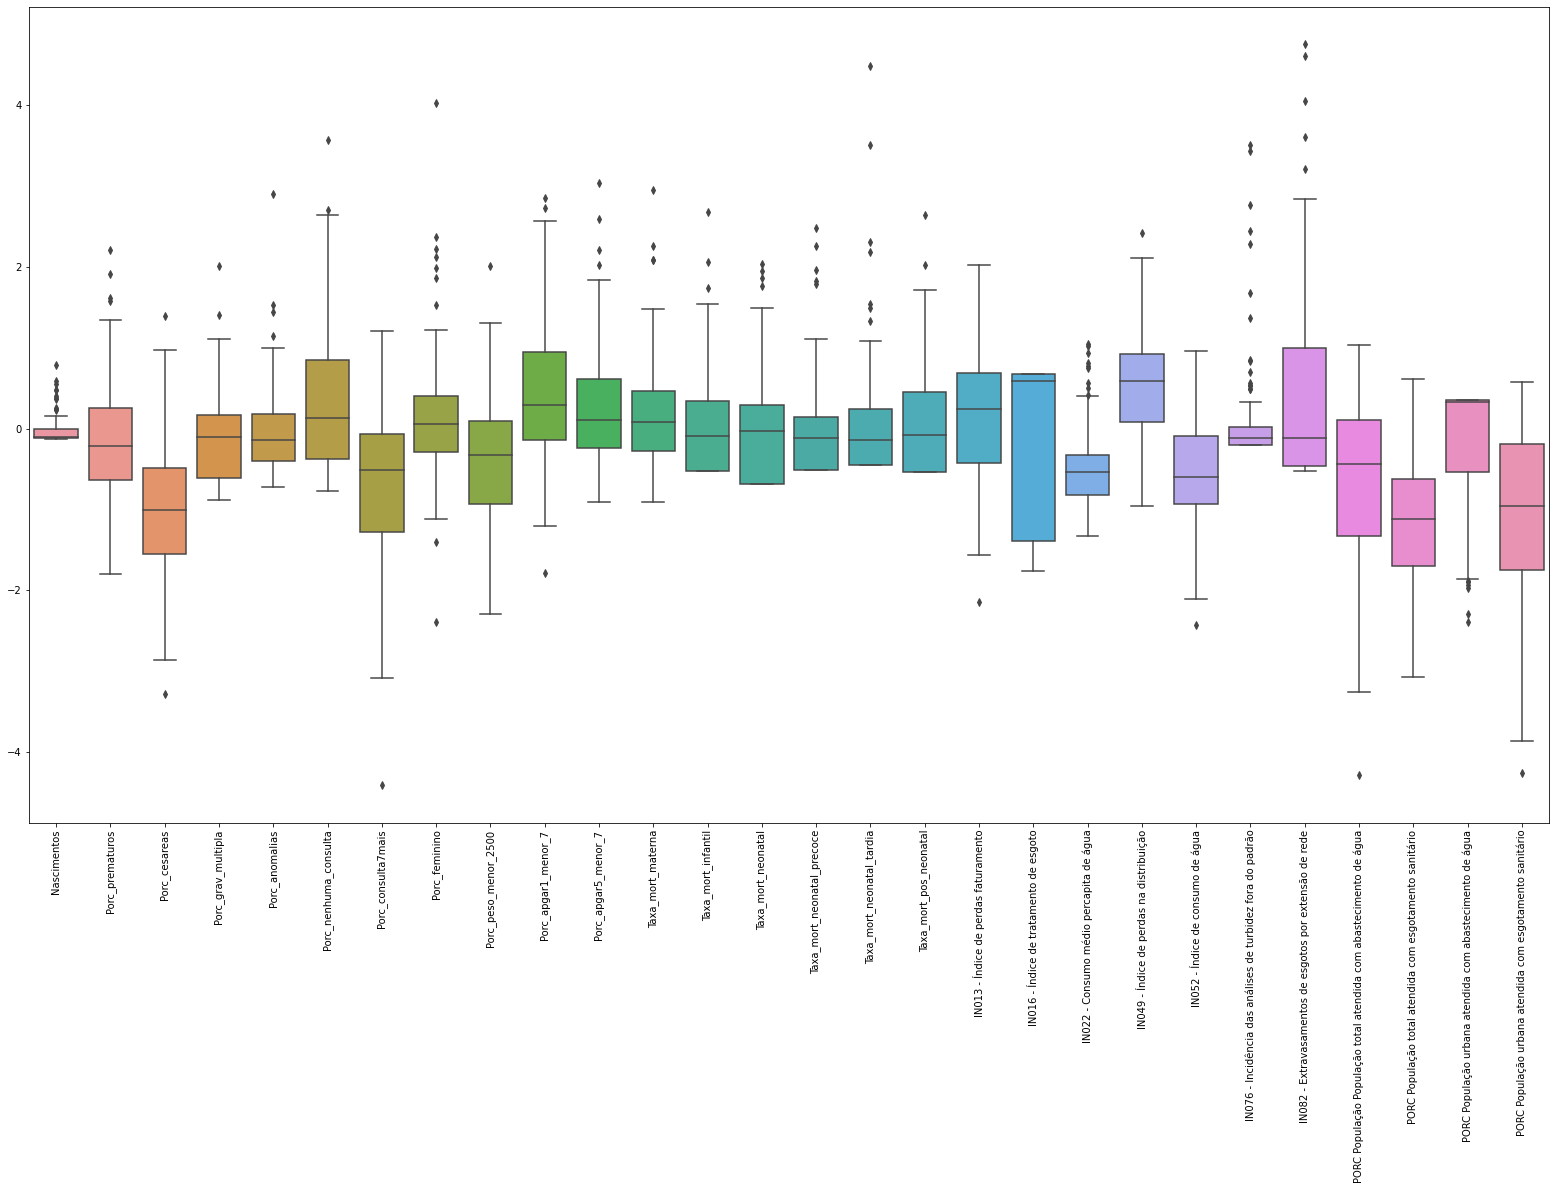

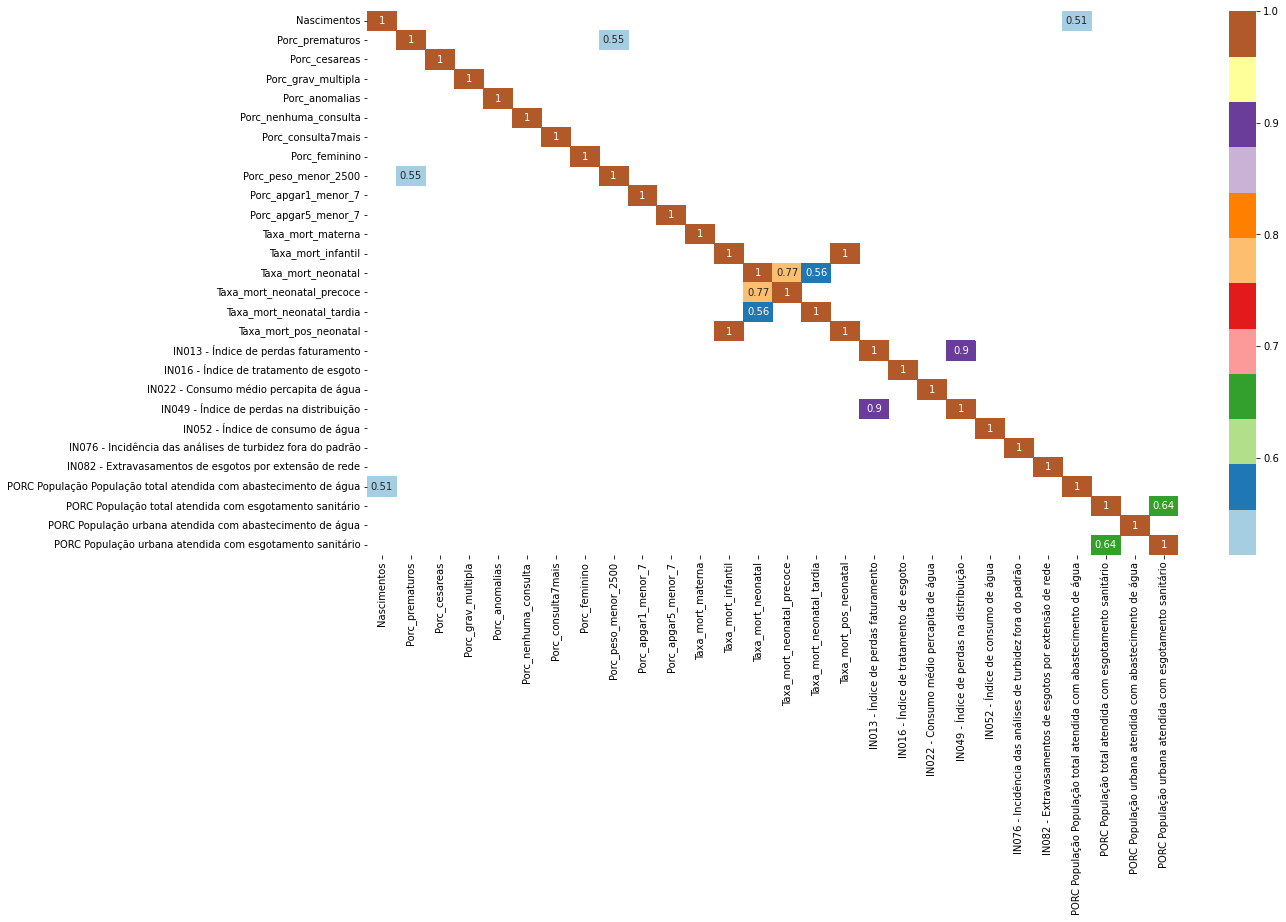

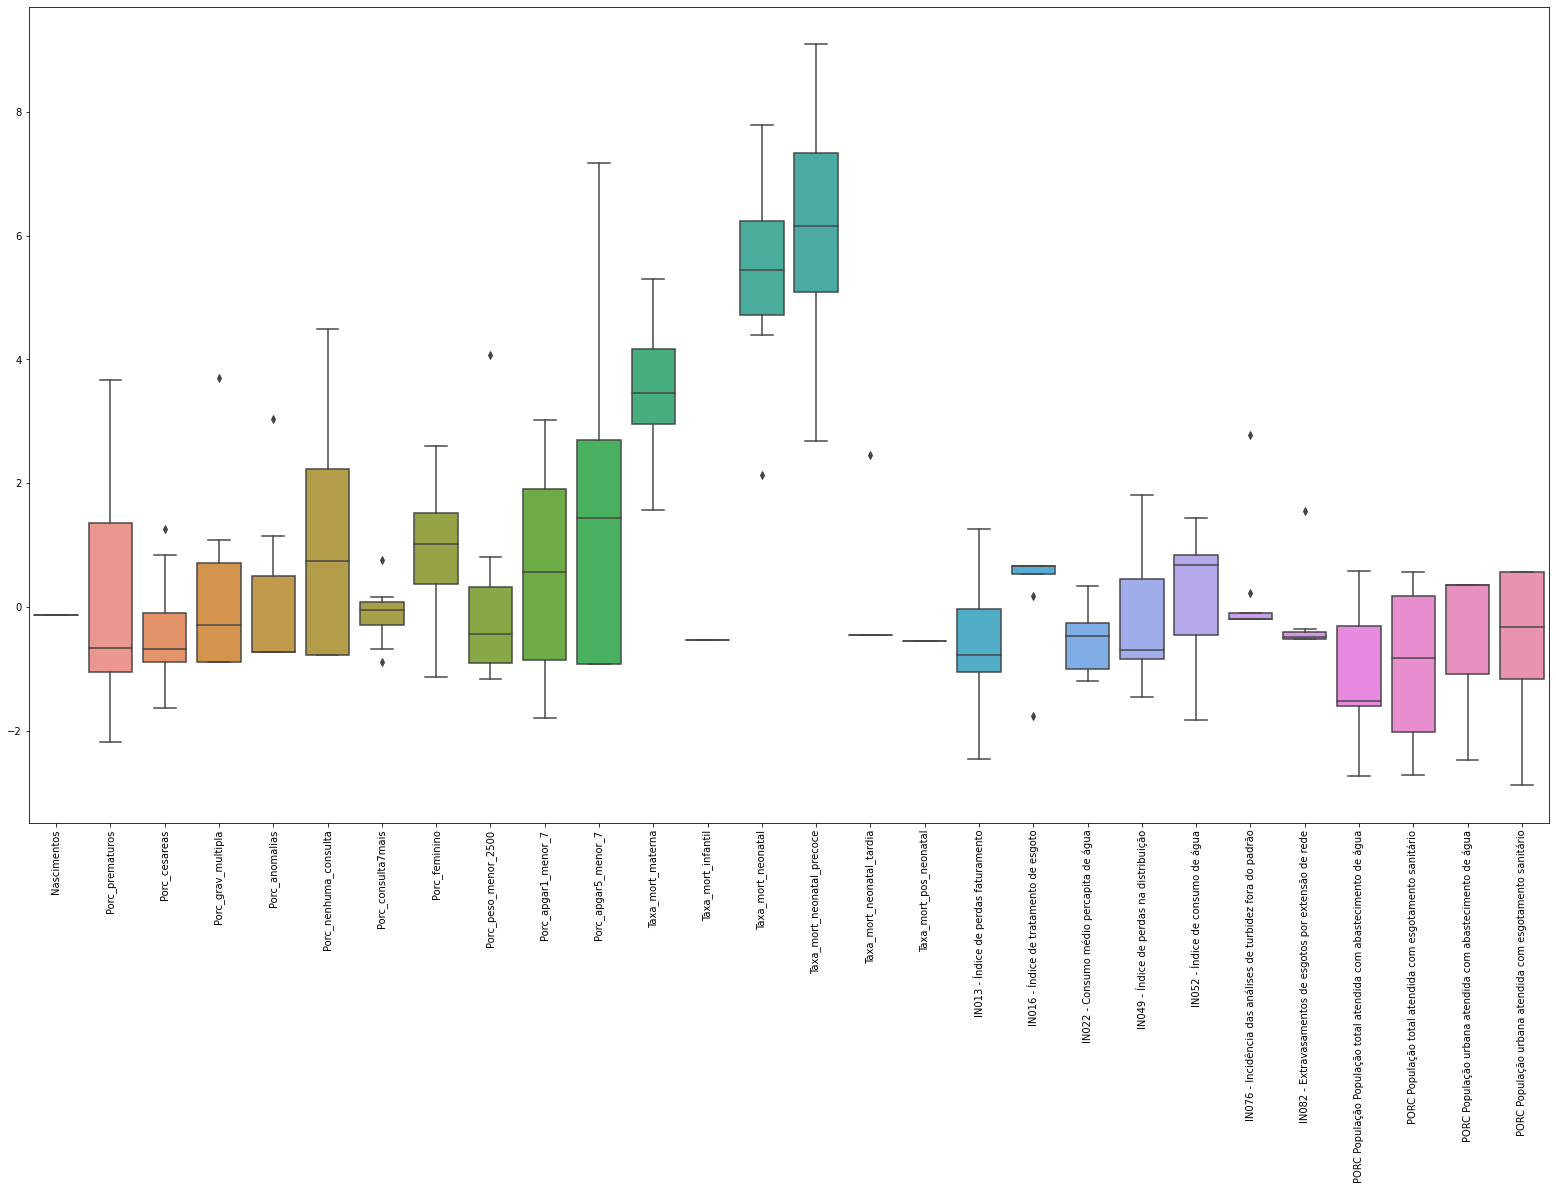

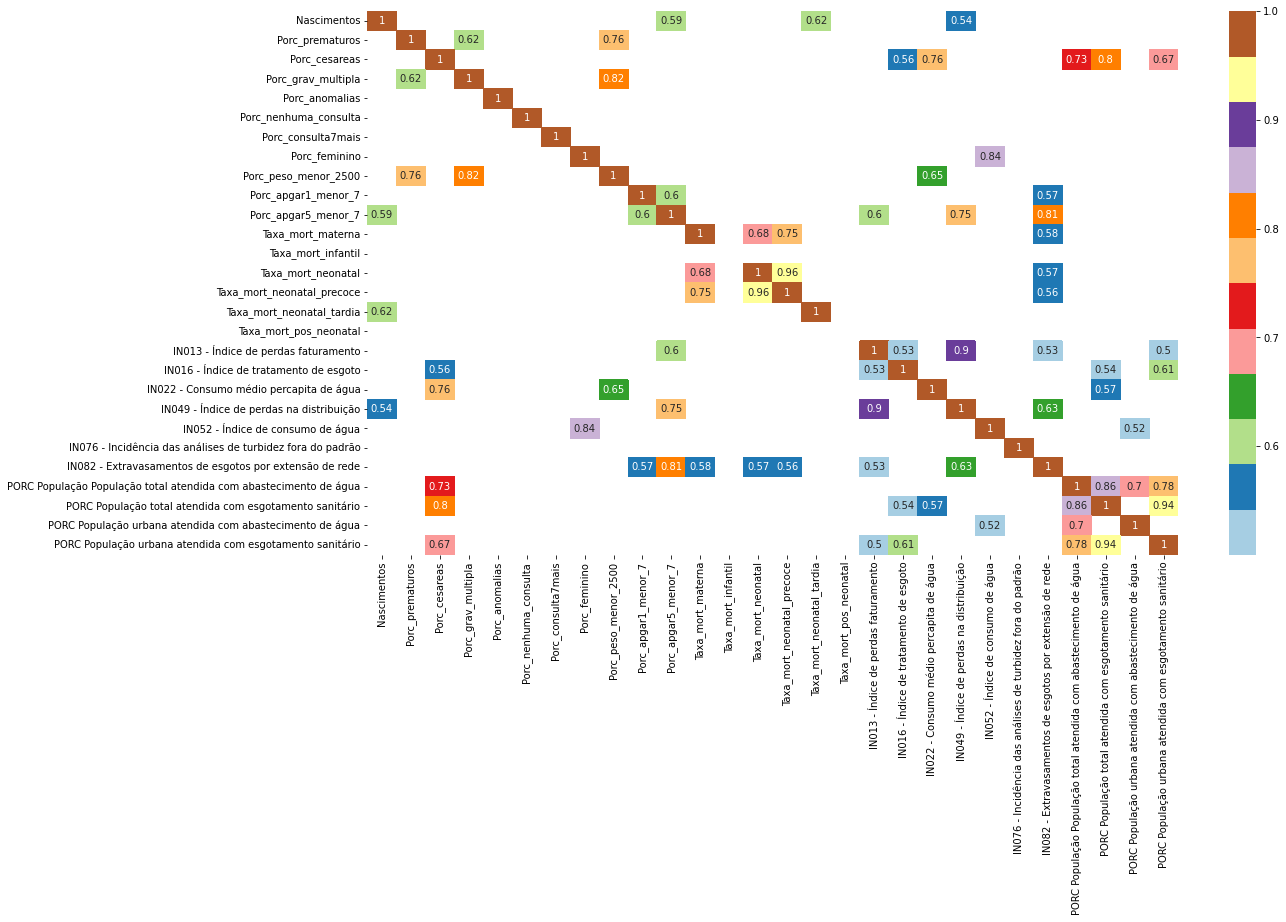

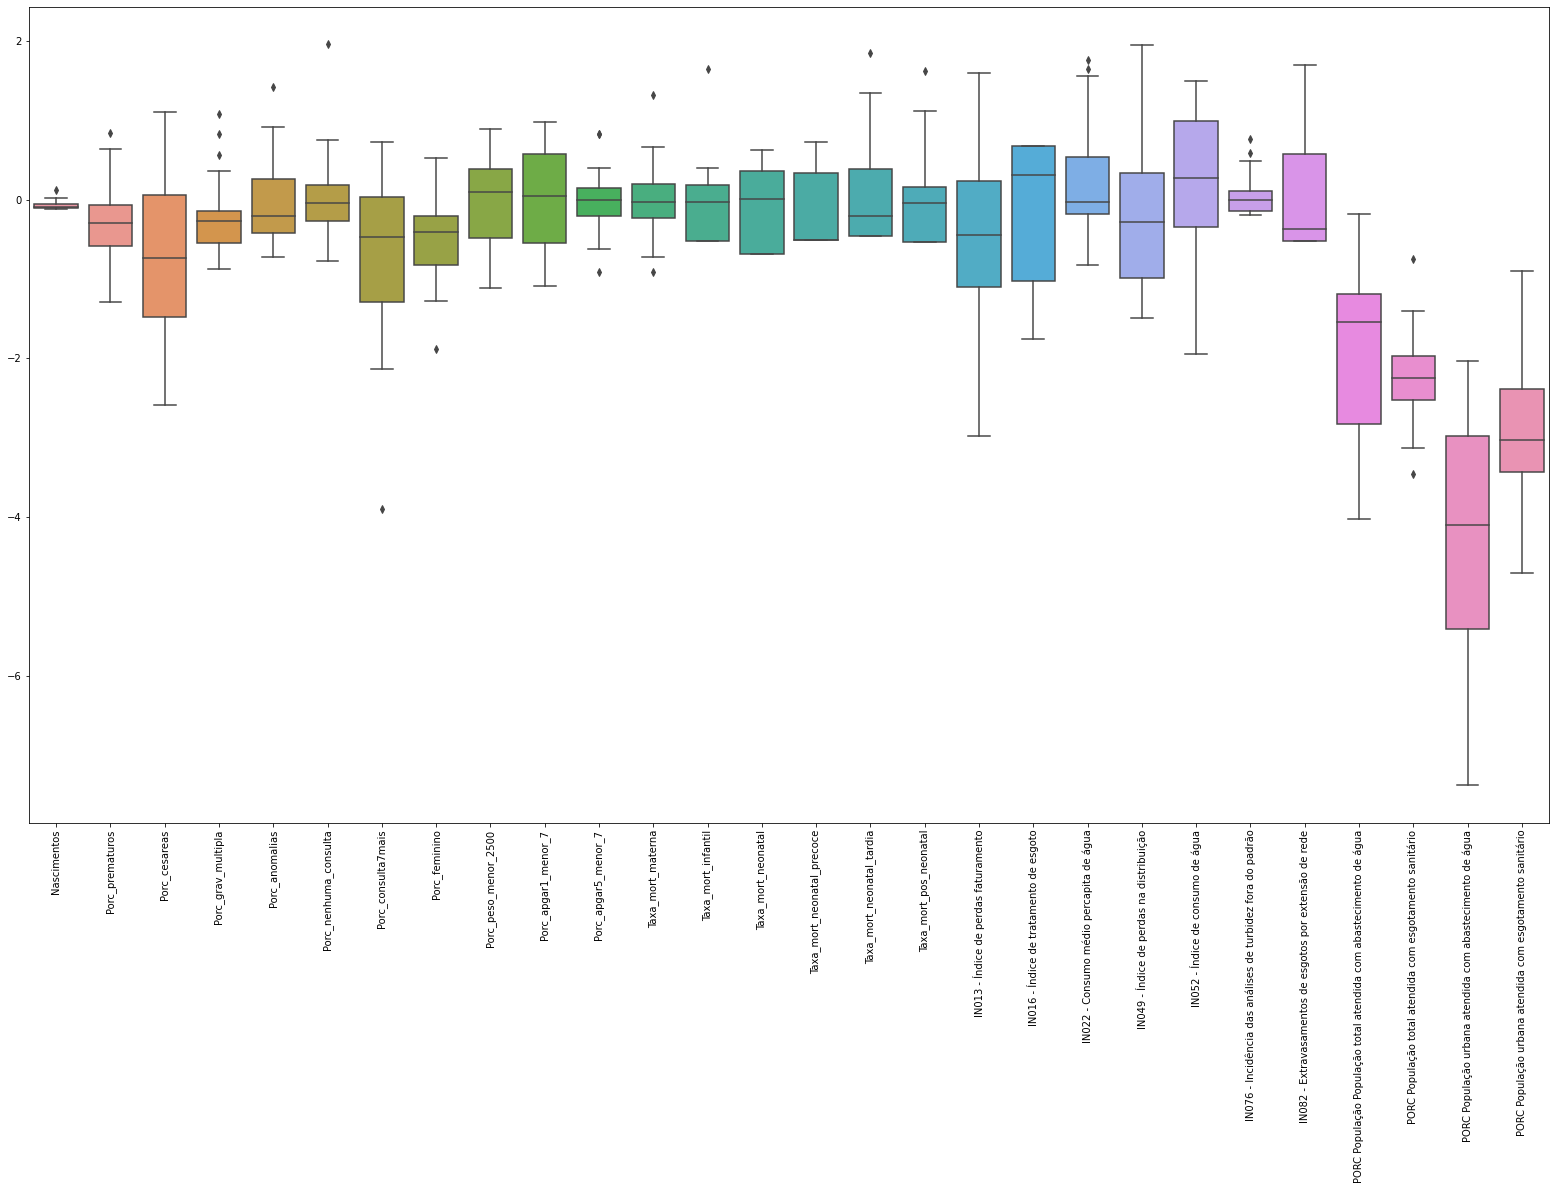

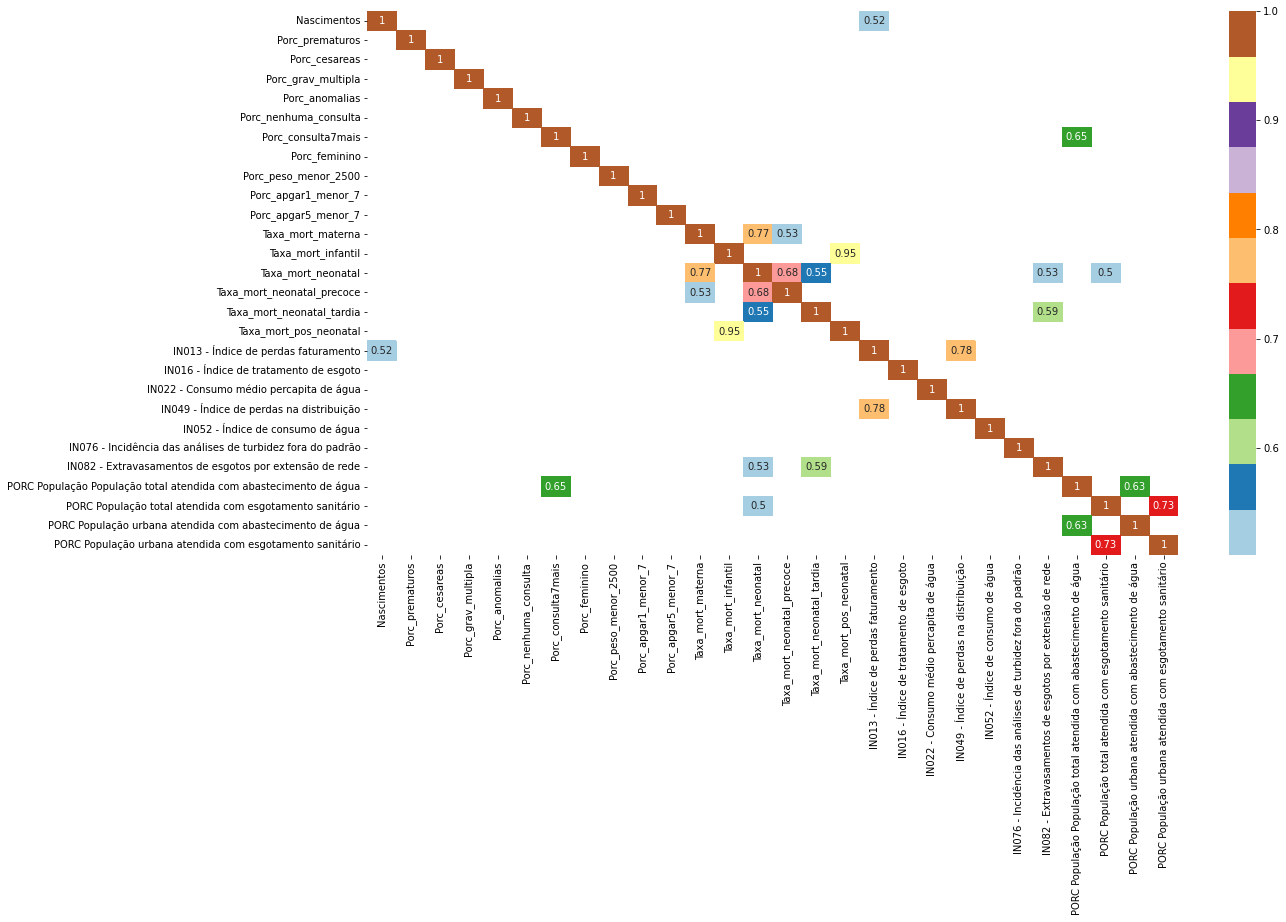

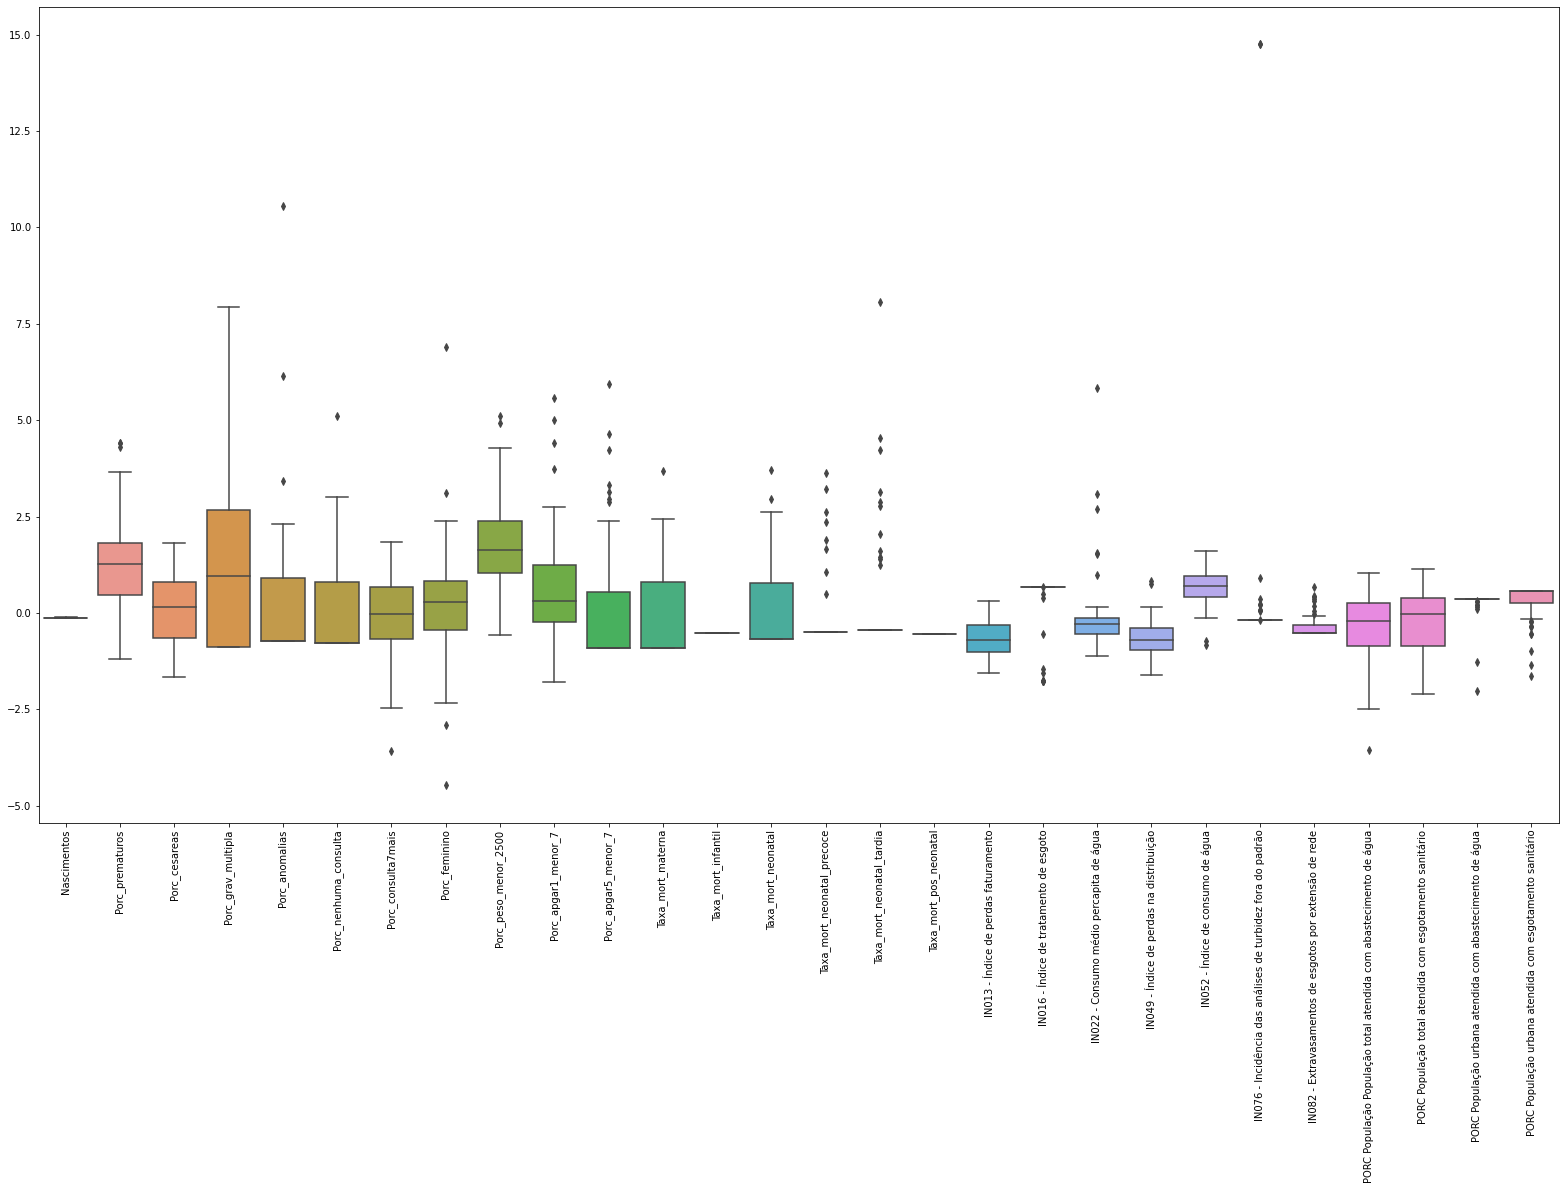

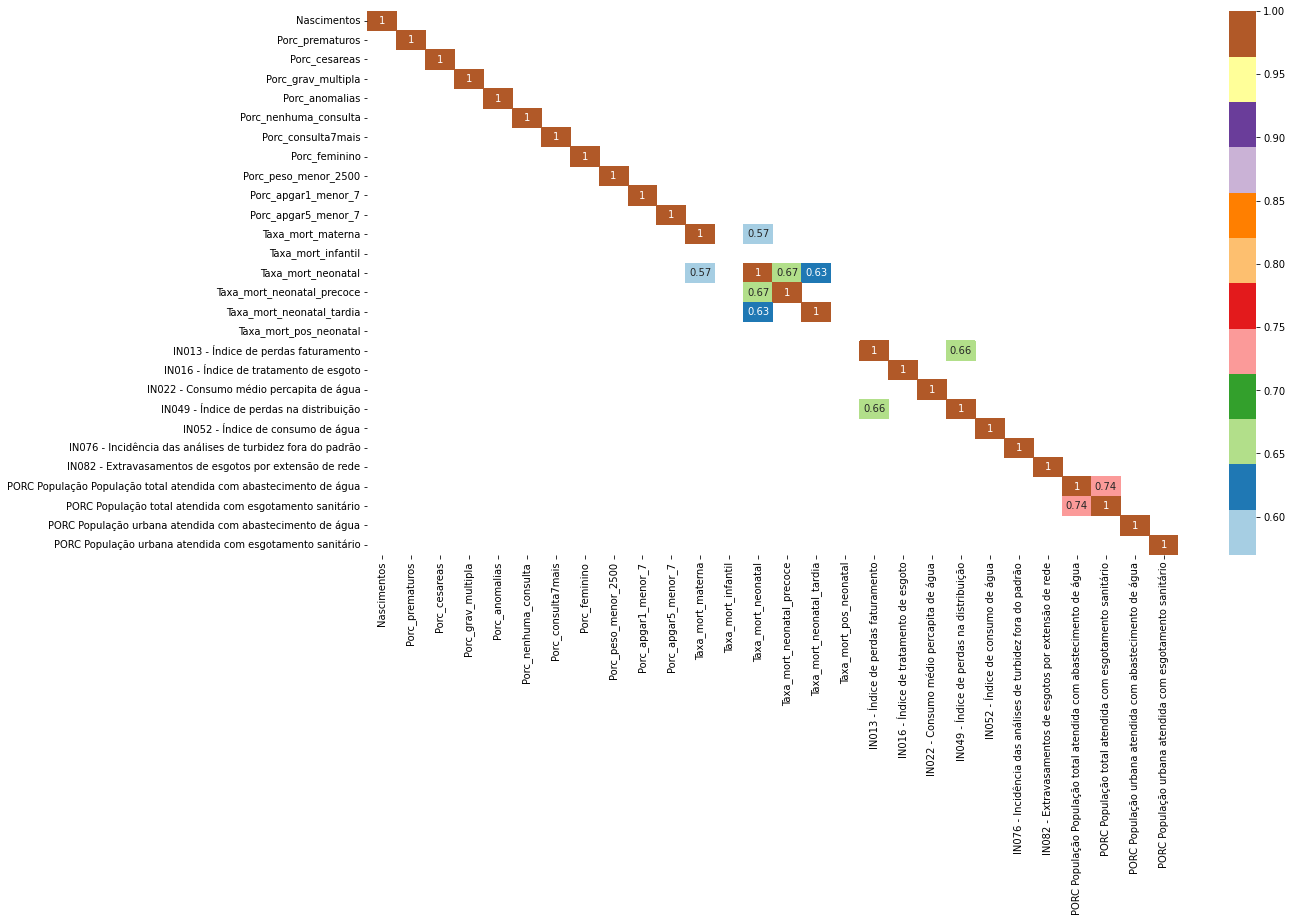

In [ ]:
import seaborn as sea
import matplotlib.pyplot as plt


for i in range(7):
  fator = 1.5
  dimA = 18.16 * fator
  dimB = 10  * fator
  fig, ax = plt.subplots(figsize=(dimA, dimB))
  _ = X.query("Cluster=="+str(i))[df.columns[1:-1]]
  sea.boxplot(data=_, ax=ax)
  plt.xticks(rotation=90)
  plt.show()

  fator = 1
  dimA = 18.16 * fator
  dimB = 10  * fator
  fig, ax = plt.subplots(figsize=(dimA, dimB))
  df_aux  = _.corr()

  sea.heatmap(data=df_aux[df_aux>=.5], ax=ax, cmap='Paired', annot=True)
  plt.show()

  sea.heatmap(data=df_aux[df_aux<=-.5], ax=ax, cmap='Paired', annot=True)

In [ ]:
!pip install pymannkendall

In [ ]:
import pymannkendall as mk


  CLUSTER 0  

-----------------------------------------


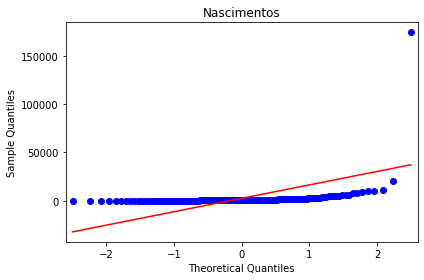

Shapiro-Wilk Test
Statistics=0.124, p=0.000
Sample does not look Gaussian (reject H0)


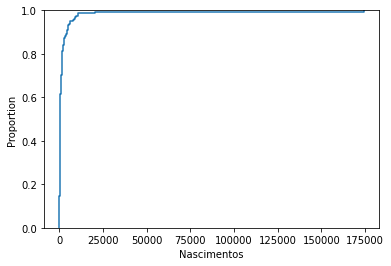

-----------------------------------------


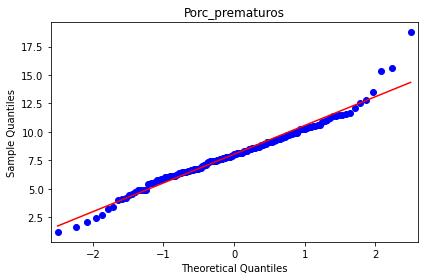

Shapiro-Wilk Test
Statistics=0.972, p=0.002
Sample does not look Gaussian (reject H0)


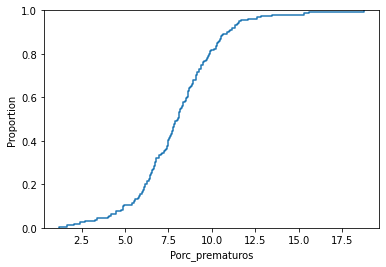

-----------------------------------------


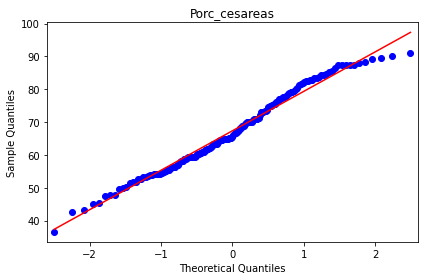

Shapiro-Wilk Test
Statistics=0.981, p=0.026
Sample does not look Gaussian (reject H0)


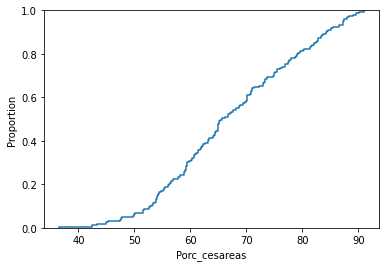

-----------------------------------------


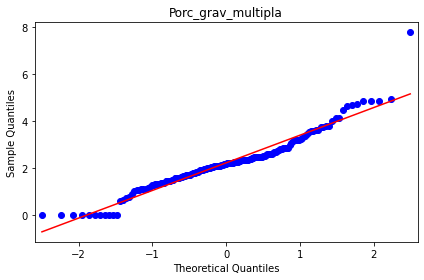

Shapiro-Wilk Test
Statistics=0.944, p=0.000
Sample does not look Gaussian (reject H0)


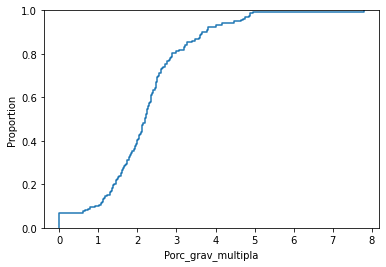

-----------------------------------------


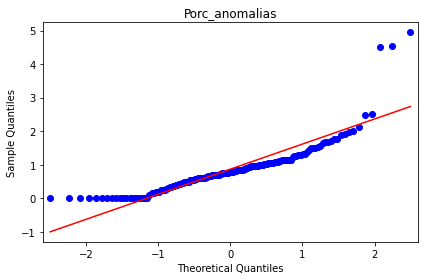

Shapiro-Wilk Test
Statistics=0.787, p=0.000
Sample does not look Gaussian (reject H0)


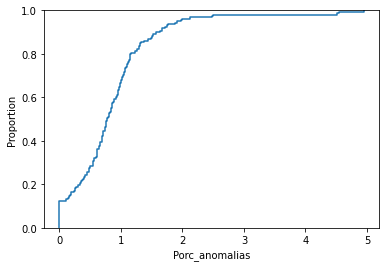

-----------------------------------------


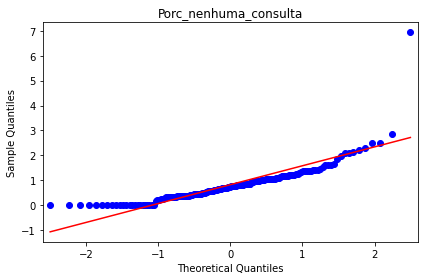

Shapiro-Wilk Test
Statistics=0.748, p=0.000
Sample does not look Gaussian (reject H0)


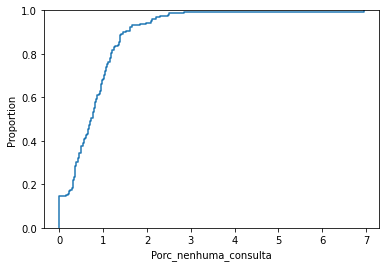

-----------------------------------------


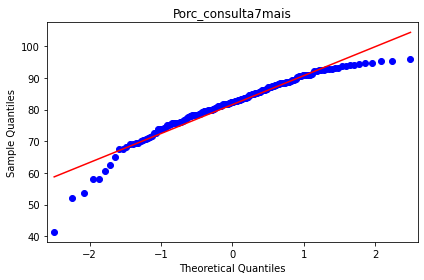

Shapiro-Wilk Test
Statistics=0.934, p=0.000
Sample does not look Gaussian (reject H0)


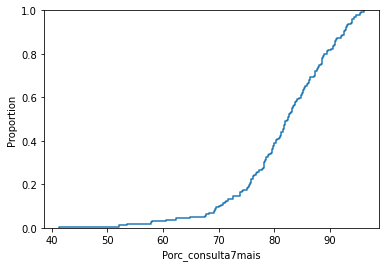

-----------------------------------------


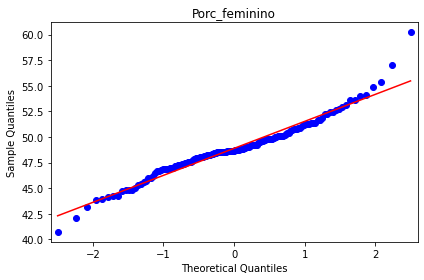

Shapiro-Wilk Test
Statistics=0.965, p=0.000
Sample does not look Gaussian (reject H0)


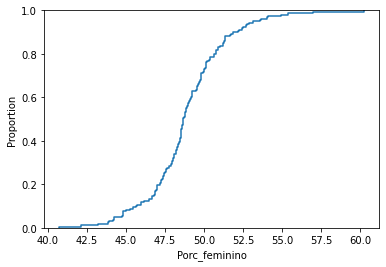

-----------------------------------------


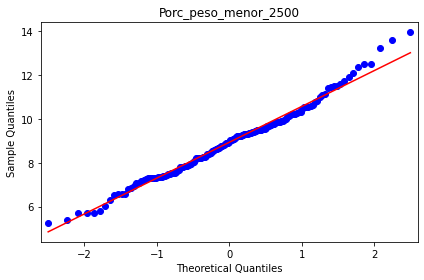

Shapiro-Wilk Test
Statistics=0.987, p=0.140
Sample looks Gaussian (fail to reject H0)


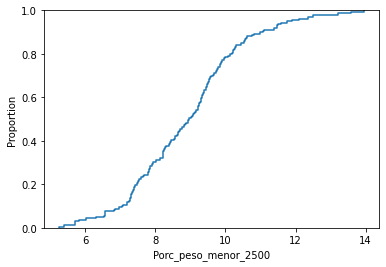

-----------------------------------------


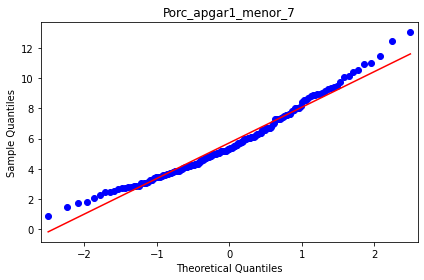

Shapiro-Wilk Test
Statistics=0.972, p=0.003
Sample does not look Gaussian (reject H0)


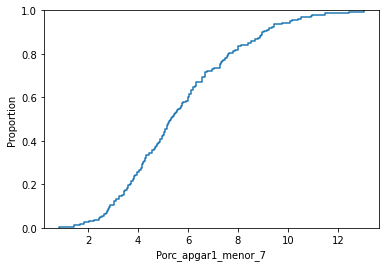

-----------------------------------------


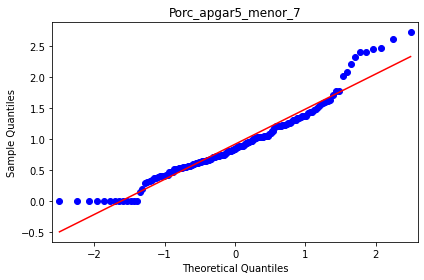

Shapiro-Wilk Test
Statistics=0.945, p=0.000
Sample does not look Gaussian (reject H0)


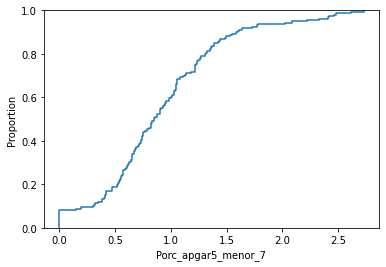

-----------------------------------------


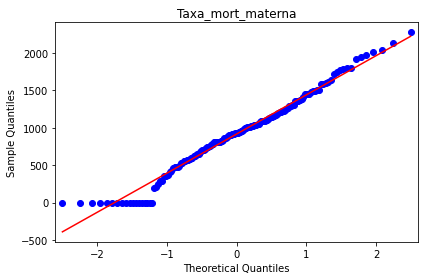

Shapiro-Wilk Test
Statistics=0.975, p=0.006
Sample does not look Gaussian (reject H0)


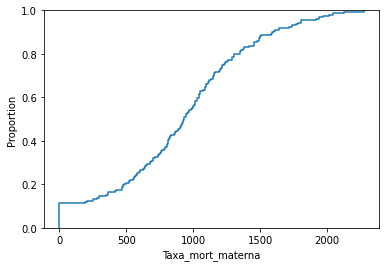

-----------------------------------------


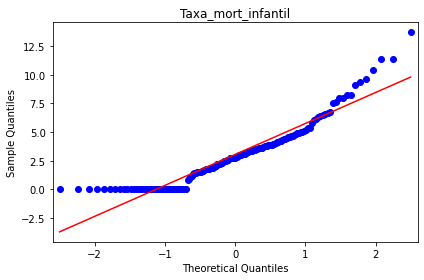

Shapiro-Wilk Test
Statistics=0.898, p=0.000
Sample does not look Gaussian (reject H0)


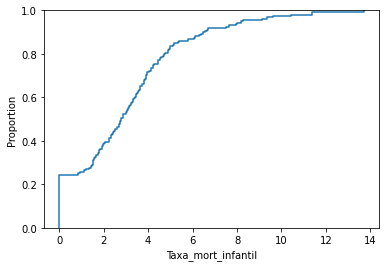

-----------------------------------------


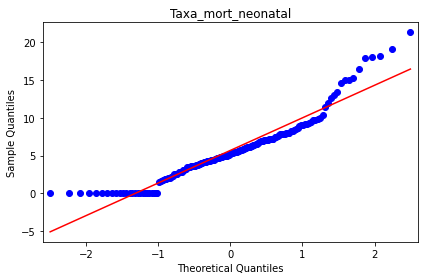

Shapiro-Wilk Test
Statistics=0.915, p=0.000
Sample does not look Gaussian (reject H0)


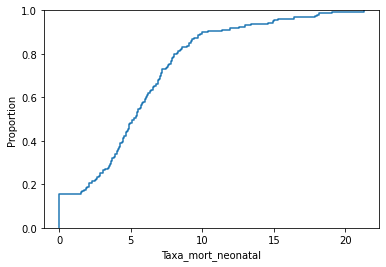

-----------------------------------------


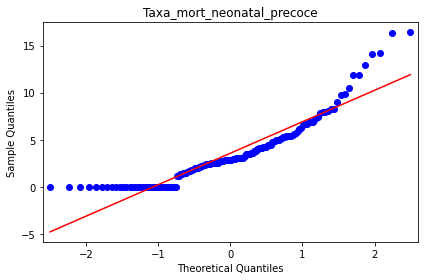

Shapiro-Wilk Test
Statistics=0.863, p=0.000
Sample does not look Gaussian (reject H0)


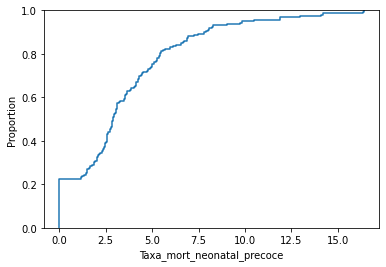

-----------------------------------------


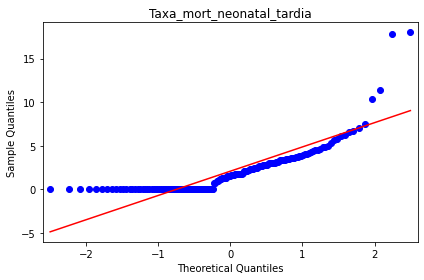

Shapiro-Wilk Test
Statistics=0.710, p=0.000
Sample does not look Gaussian (reject H0)


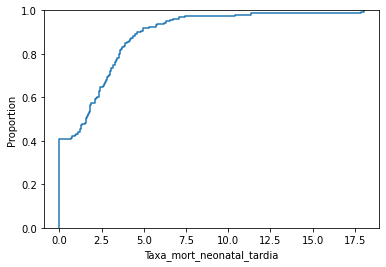

-----------------------------------------


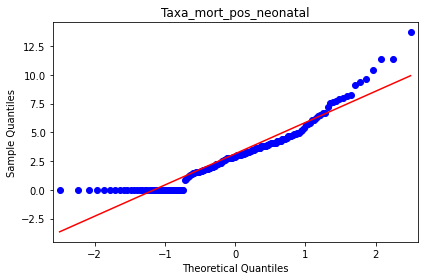

Shapiro-Wilk Test
Statistics=0.906, p=0.000
Sample does not look Gaussian (reject H0)


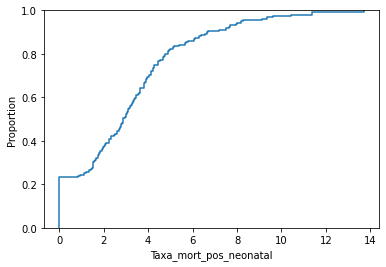

-----------------------------------------


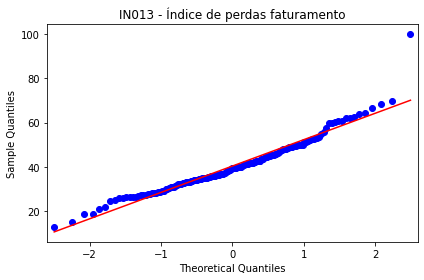

Shapiro-Wilk Test
Statistics=0.949, p=0.000
Sample does not look Gaussian (reject H0)


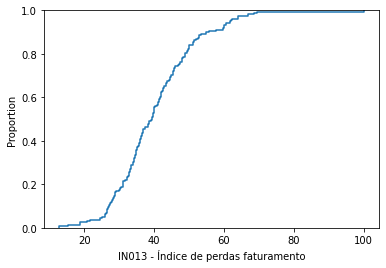

-----------------------------------------


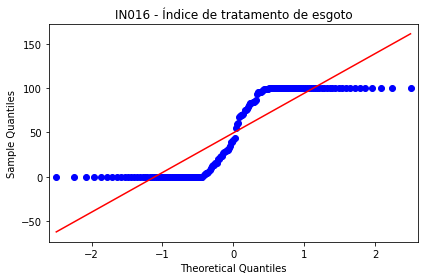

Shapiro-Wilk Test
Statistics=0.758, p=0.000
Sample does not look Gaussian (reject H0)


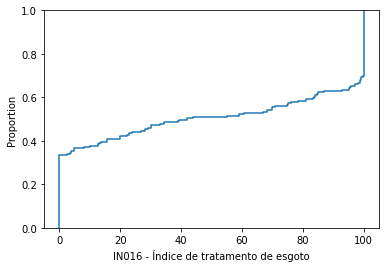

-----------------------------------------


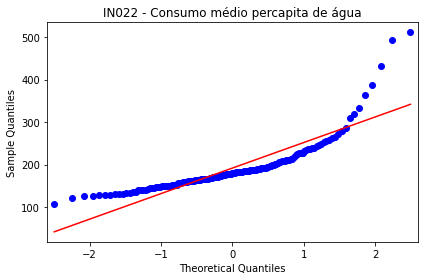

Shapiro-Wilk Test
Statistics=0.760, p=0.000
Sample does not look Gaussian (reject H0)


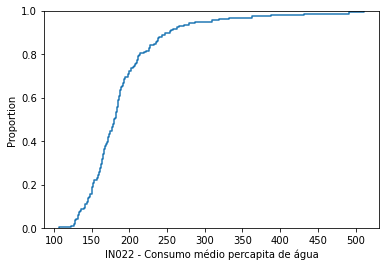

-----------------------------------------


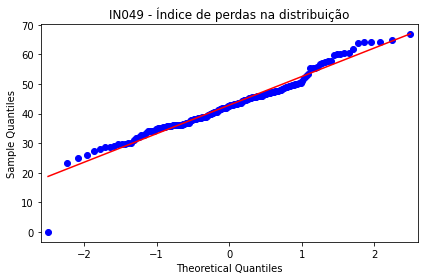

Shapiro-Wilk Test
Statistics=0.966, p=0.001
Sample does not look Gaussian (reject H0)


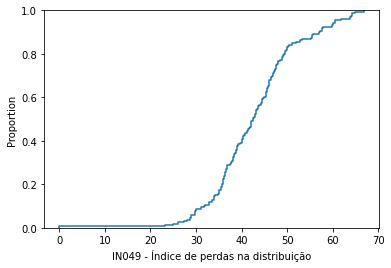

-----------------------------------------


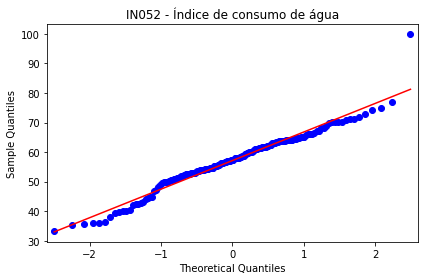

Shapiro-Wilk Test
Statistics=0.966, p=0.001
Sample does not look Gaussian (reject H0)


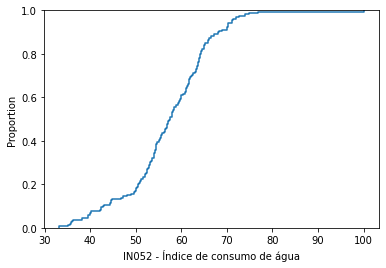

-----------------------------------------


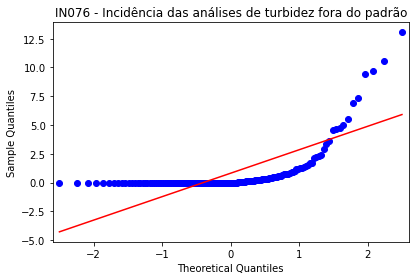

Shapiro-Wilk Test
Statistics=0.455, p=0.000
Sample does not look Gaussian (reject H0)


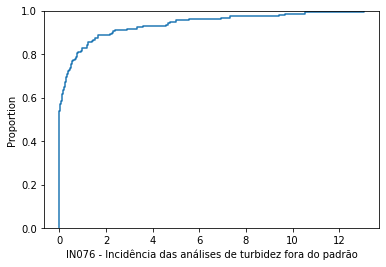

-----------------------------------------


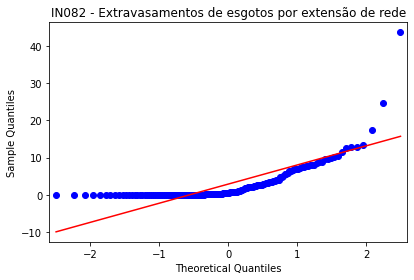

Shapiro-Wilk Test
Statistics=0.585, p=0.000
Sample does not look Gaussian (reject H0)


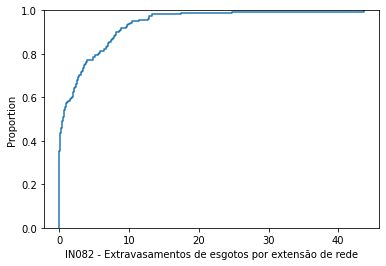

-----------------------------------------


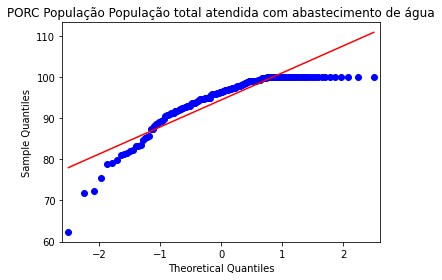

Shapiro-Wilk Test
Statistics=0.798, p=0.000
Sample does not look Gaussian (reject H0)


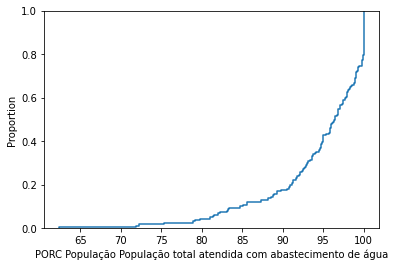

-----------------------------------------


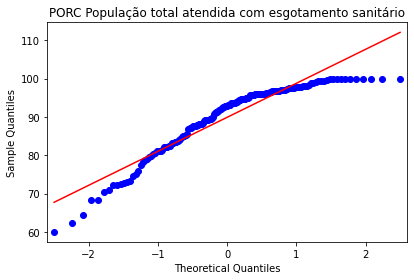

Shapiro-Wilk Test
Statistics=0.889, p=0.000
Sample does not look Gaussian (reject H0)


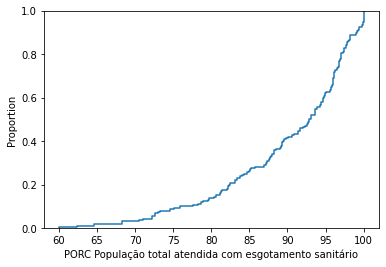

-----------------------------------------


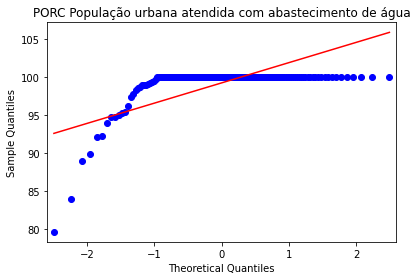

Shapiro-Wilk Test
Statistics=0.332, p=0.000
Sample does not look Gaussian (reject H0)


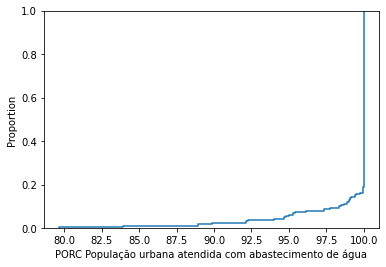

-----------------------------------------


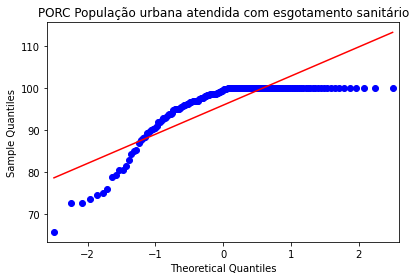

Shapiro-Wilk Test
Statistics=0.653, p=0.000
Sample does not look Gaussian (reject H0)


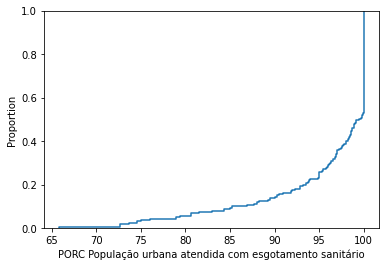


  CLUSTER 1  

-----------------------------------------


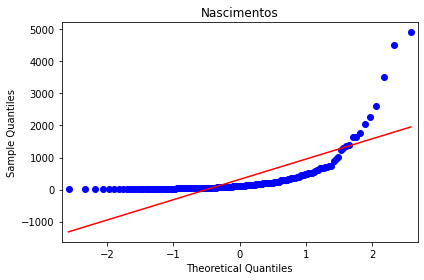

Shapiro-Wilk Test
Statistics=0.466, p=0.000
Sample does not look Gaussian (reject H0)


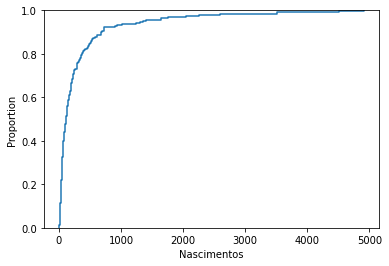

-----------------------------------------


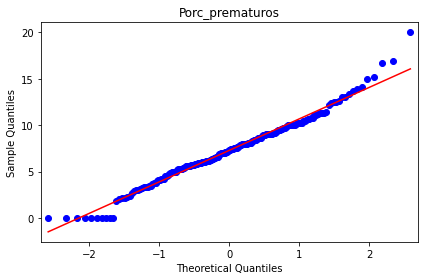

Shapiro-Wilk Test
Statistics=0.982, p=0.012
Sample does not look Gaussian (reject H0)


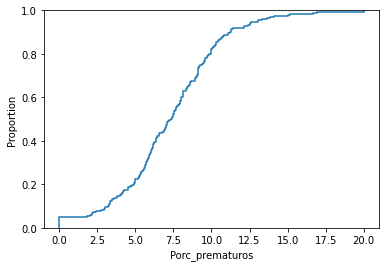

-----------------------------------------


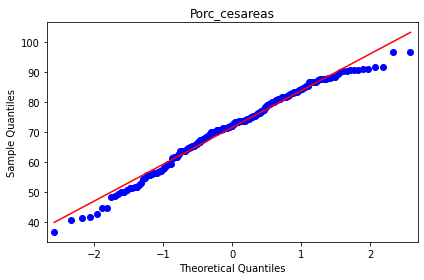

Shapiro-Wilk Test
Statistics=0.980, p=0.006
Sample does not look Gaussian (reject H0)


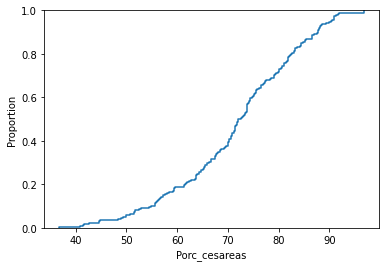

-----------------------------------------


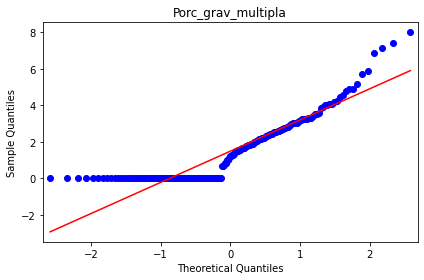

Shapiro-Wilk Test
Statistics=0.825, p=0.000
Sample does not look Gaussian (reject H0)


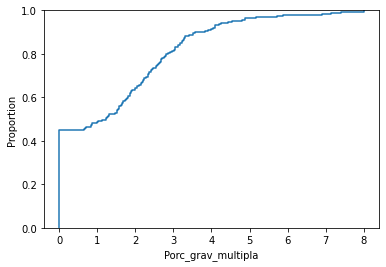

-----------------------------------------


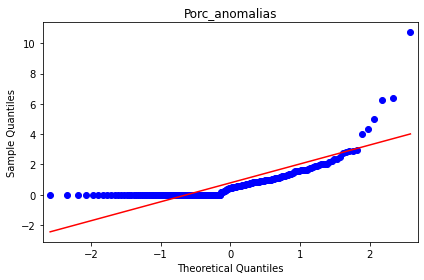

Shapiro-Wilk Test
Statistics=0.627, p=0.000
Sample does not look Gaussian (reject H0)


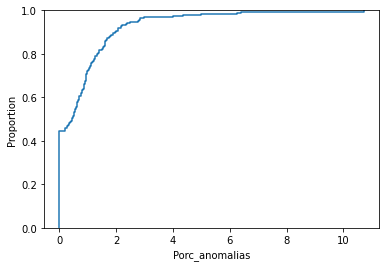

-----------------------------------------


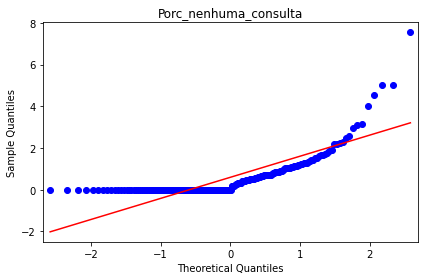

Shapiro-Wilk Test
Statistics=0.627, p=0.000
Sample does not look Gaussian (reject H0)


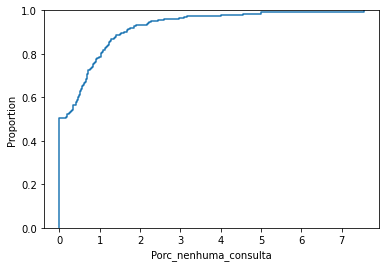

-----------------------------------------


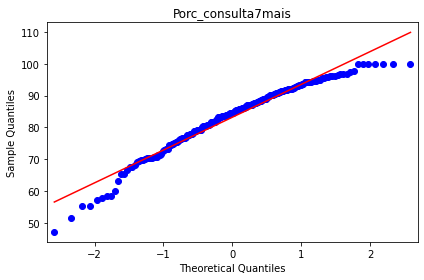

Shapiro-Wilk Test
Statistics=0.956, p=0.000
Sample does not look Gaussian (reject H0)


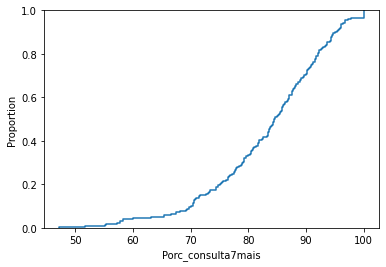

-----------------------------------------


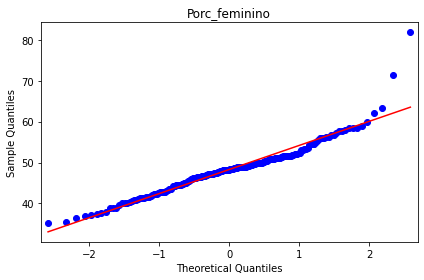

Shapiro-Wilk Test
Statistics=0.933, p=0.000
Sample does not look Gaussian (reject H0)


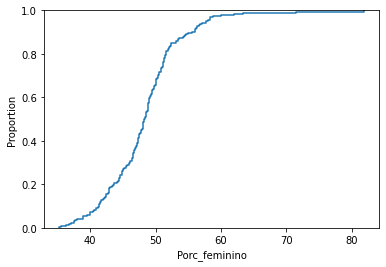

-----------------------------------------


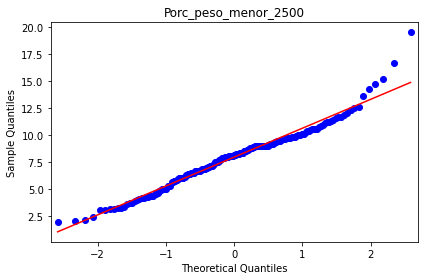

Shapiro-Wilk Test
Statistics=0.972, p=0.000
Sample does not look Gaussian (reject H0)


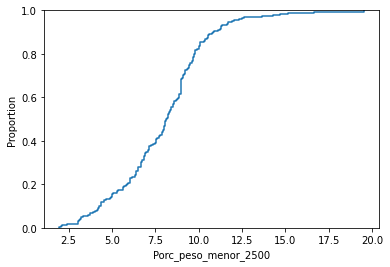

-----------------------------------------


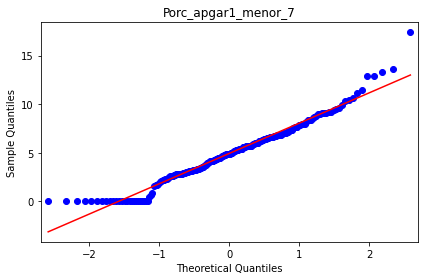

Shapiro-Wilk Test
Statistics=0.964, p=0.000
Sample does not look Gaussian (reject H0)


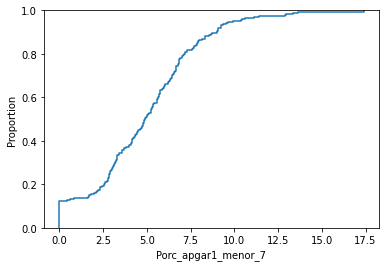

-----------------------------------------


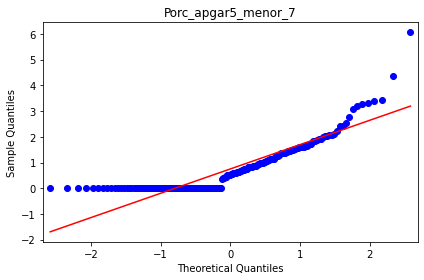

Shapiro-Wilk Test
Statistics=0.782, p=0.000
Sample does not look Gaussian (reject H0)


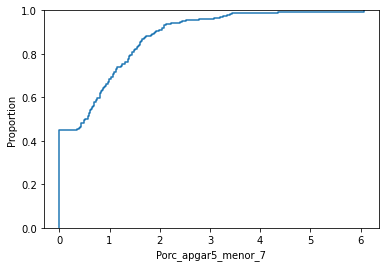

-----------------------------------------


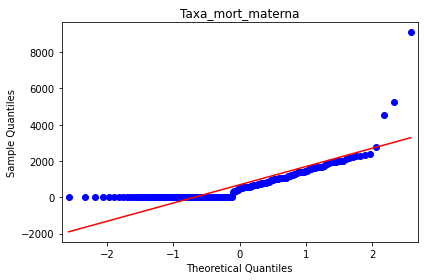

Shapiro-Wilk Test
Statistics=0.656, p=0.000
Sample does not look Gaussian (reject H0)


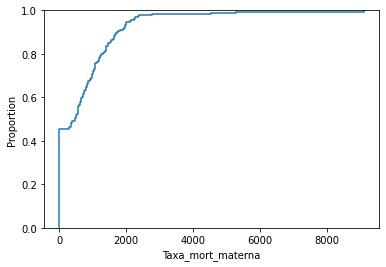

-----------------------------------------


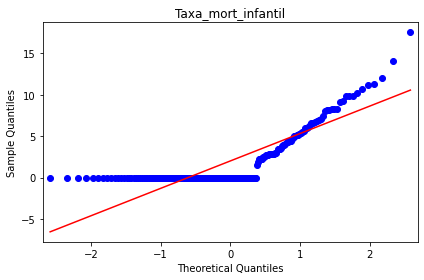

Shapiro-Wilk Test
Statistics=0.671, p=0.000
Sample does not look Gaussian (reject H0)


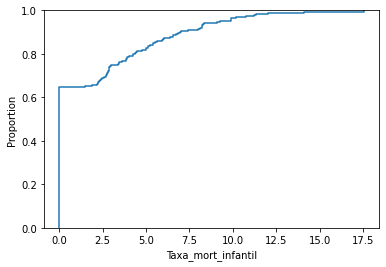

-----------------------------------------


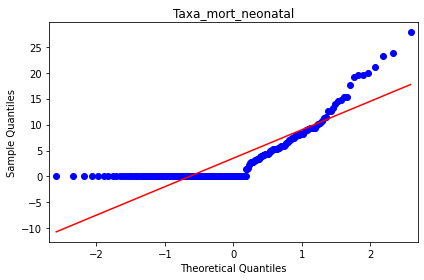

Shapiro-Wilk Test
Statistics=0.699, p=0.000
Sample does not look Gaussian (reject H0)


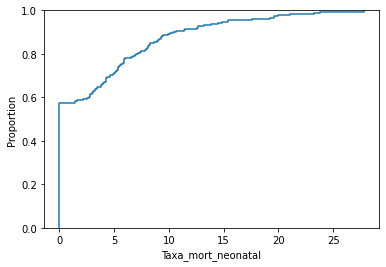

-----------------------------------------


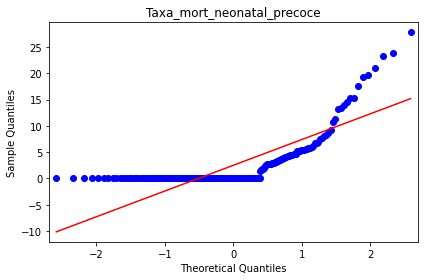

Shapiro-Wilk Test
Statistics=0.580, p=0.000
Sample does not look Gaussian (reject H0)


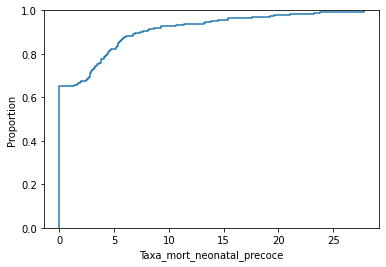

-----------------------------------------


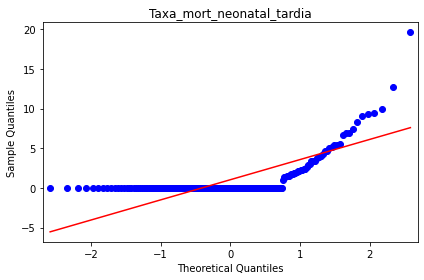

Shapiro-Wilk Test
Statistics=0.471, p=0.000
Sample does not look Gaussian (reject H0)


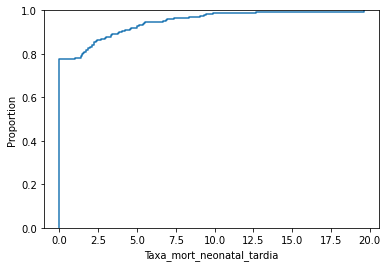

-----------------------------------------


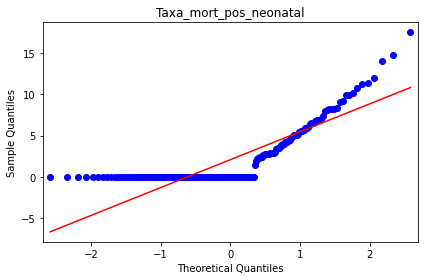

Shapiro-Wilk Test
Statistics=0.676, p=0.000
Sample does not look Gaussian (reject H0)


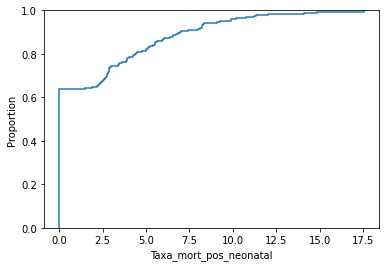

-----------------------------------------


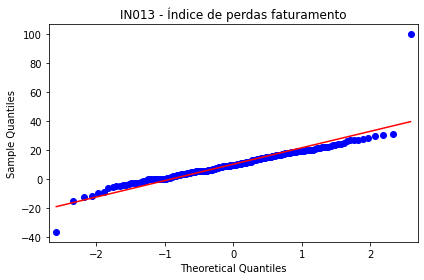

Shapiro-Wilk Test
Statistics=0.845, p=0.000
Sample does not look Gaussian (reject H0)


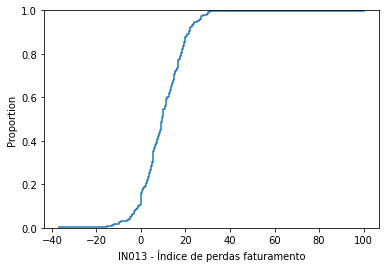

-----------------------------------------


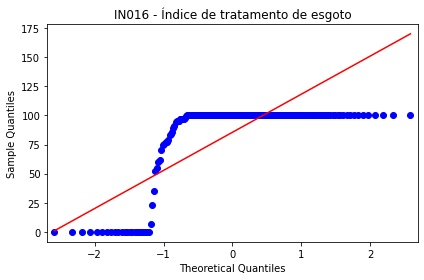

Shapiro-Wilk Test
Statistics=0.475, p=0.000
Sample does not look Gaussian (reject H0)


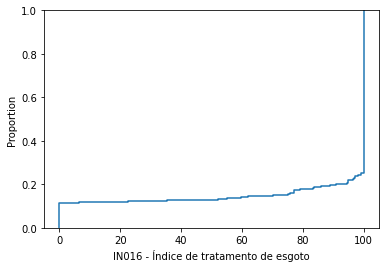

-----------------------------------------


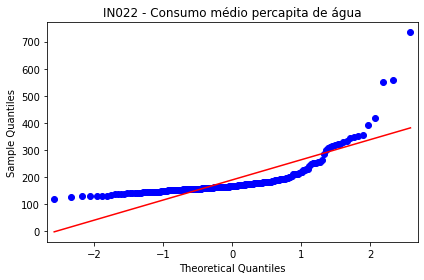

Shapiro-Wilk Test
Statistics=0.607, p=0.000
Sample does not look Gaussian (reject H0)


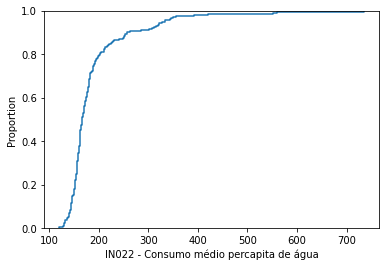

-----------------------------------------


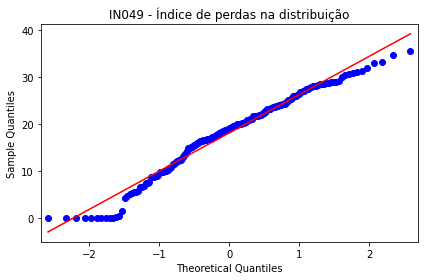

Shapiro-Wilk Test
Statistics=0.971, p=0.000
Sample does not look Gaussian (reject H0)


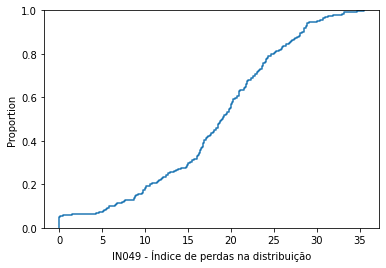

-----------------------------------------


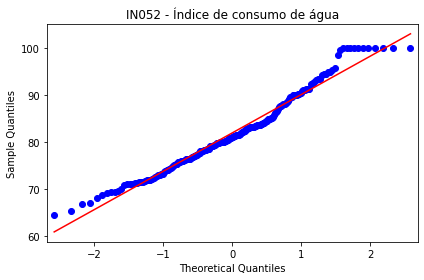

Shapiro-Wilk Test
Statistics=0.971, p=0.000
Sample does not look Gaussian (reject H0)


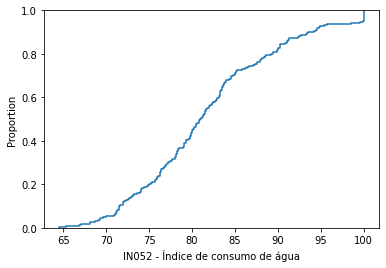

-----------------------------------------


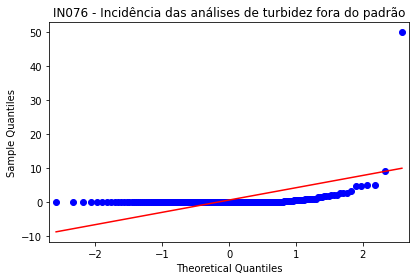

Shapiro-Wilk Test
Statistics=0.133, p=0.000
Sample does not look Gaussian (reject H0)


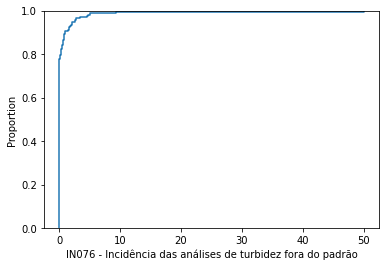

-----------------------------------------


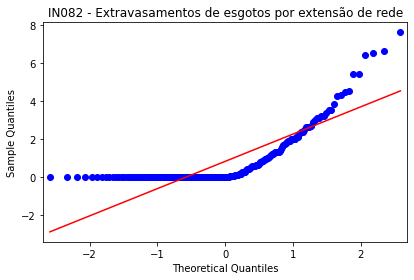

Shapiro-Wilk Test
Statistics=0.640, p=0.000
Sample does not look Gaussian (reject H0)


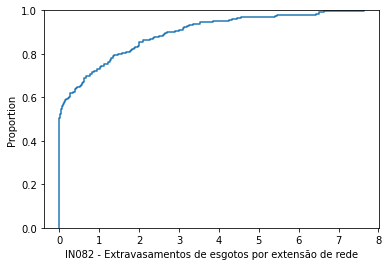

-----------------------------------------


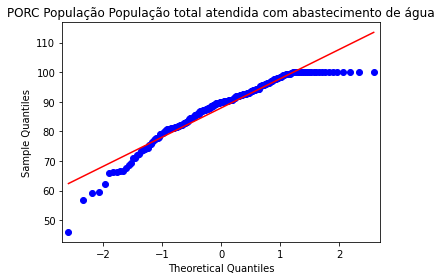

Shapiro-Wilk Test
Statistics=0.917, p=0.000
Sample does not look Gaussian (reject H0)


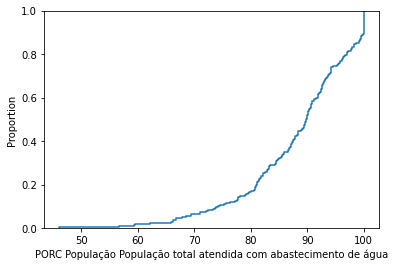

-----------------------------------------


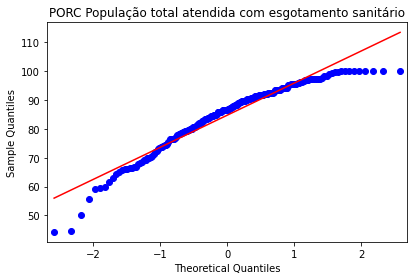

Shapiro-Wilk Test
Statistics=0.932, p=0.000
Sample does not look Gaussian (reject H0)


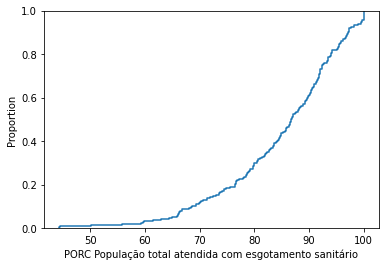

-----------------------------------------


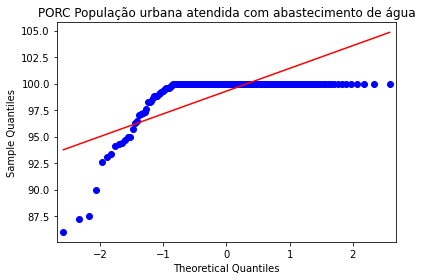

Shapiro-Wilk Test
Statistics=0.381, p=0.000
Sample does not look Gaussian (reject H0)


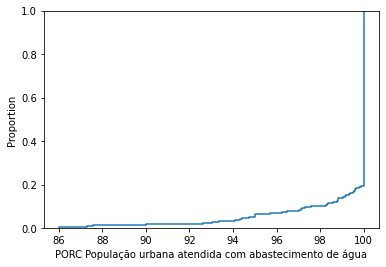

-----------------------------------------


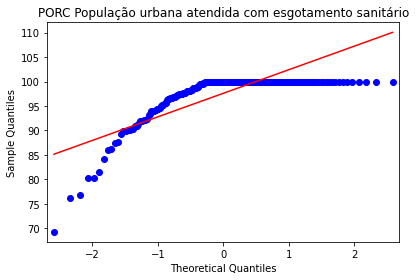

Shapiro-Wilk Test
Statistics=0.570, p=0.000
Sample does not look Gaussian (reject H0)


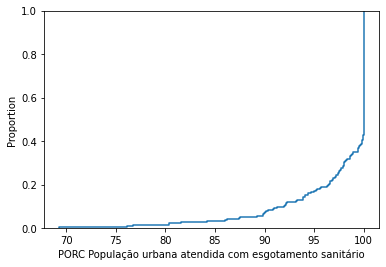


  CLUSTER 2  

-----------------------------------------


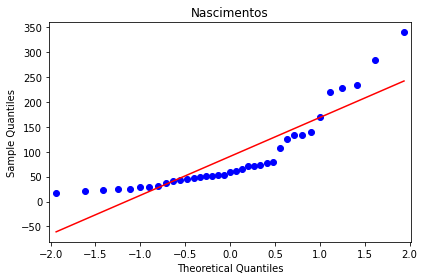

Shapiro-Wilk Test
Statistics=0.788, p=0.000
Sample does not look Gaussian (reject H0)


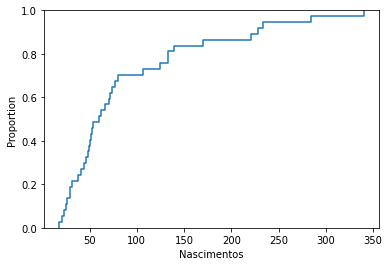

-----------------------------------------


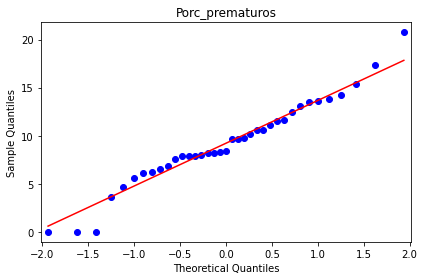

Shapiro-Wilk Test
Statistics=0.972, p=0.466
Sample looks Gaussian (fail to reject H0)


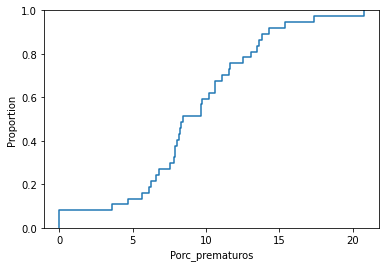

-----------------------------------------


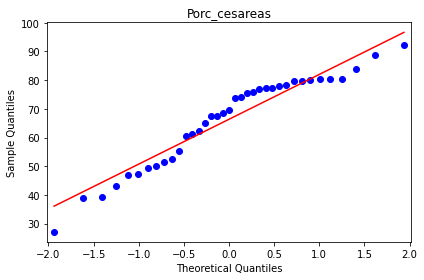

Shapiro-Wilk Test
Statistics=0.935, p=0.033
Sample does not look Gaussian (reject H0)


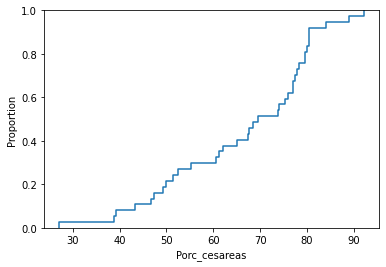

-----------------------------------------


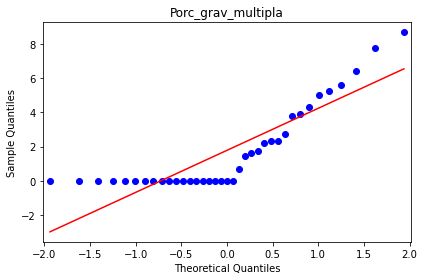

Shapiro-Wilk Test
Statistics=0.753, p=0.000
Sample does not look Gaussian (reject H0)


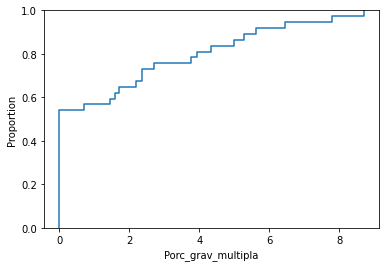

-----------------------------------------


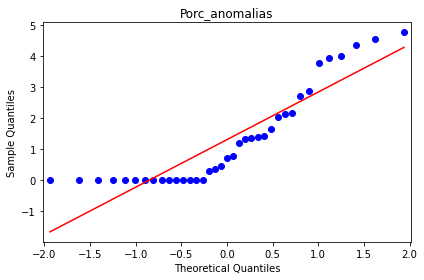

Shapiro-Wilk Test
Statistics=0.806, p=0.000
Sample does not look Gaussian (reject H0)


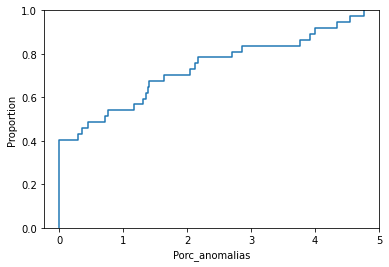

-----------------------------------------


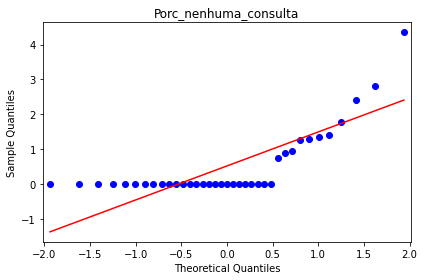

Shapiro-Wilk Test
Statistics=0.608, p=0.000
Sample does not look Gaussian (reject H0)


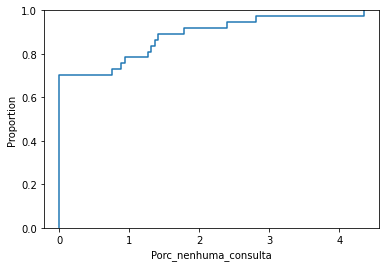

-----------------------------------------


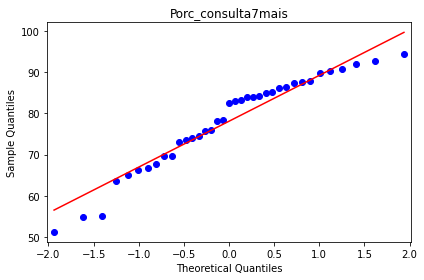

Shapiro-Wilk Test
Statistics=0.938, p=0.041
Sample does not look Gaussian (reject H0)


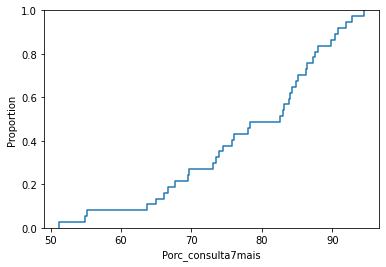

-----------------------------------------


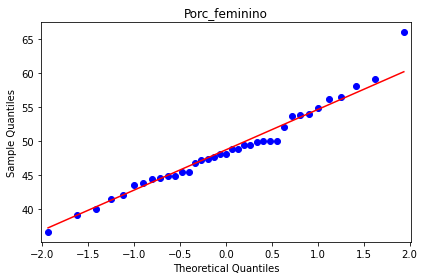

Shapiro-Wilk Test
Statistics=0.976, p=0.599
Sample looks Gaussian (fail to reject H0)


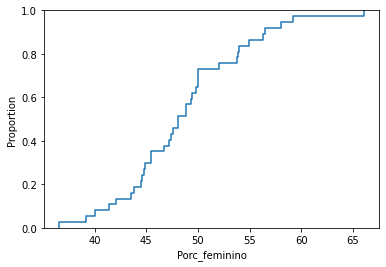

-----------------------------------------


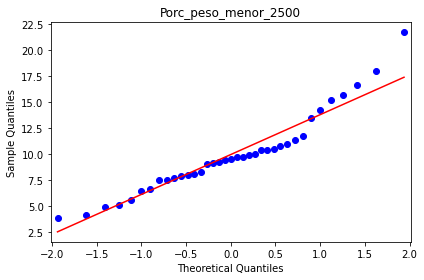

Shapiro-Wilk Test
Statistics=0.932, p=0.026
Sample does not look Gaussian (reject H0)


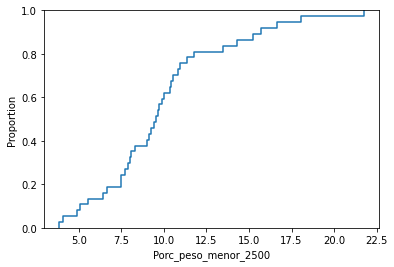

-----------------------------------------


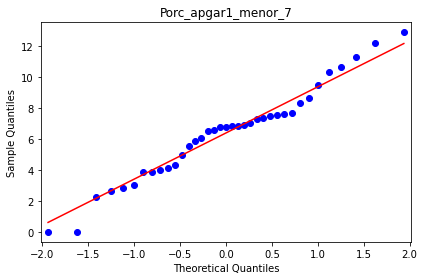

Shapiro-Wilk Test
Statistics=0.975, p=0.572
Sample looks Gaussian (fail to reject H0)


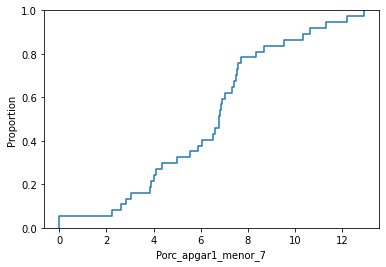

-----------------------------------------


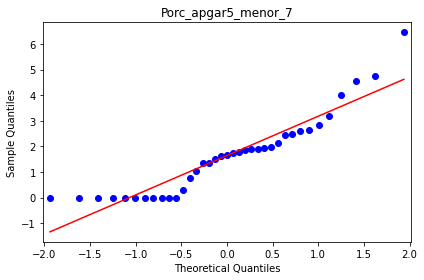

Shapiro-Wilk Test
Statistics=0.880, p=0.001
Sample does not look Gaussian (reject H0)


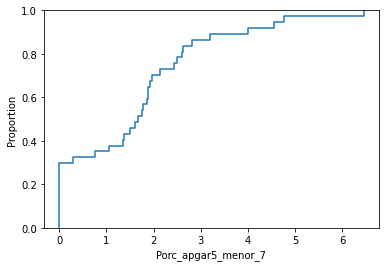

-----------------------------------------


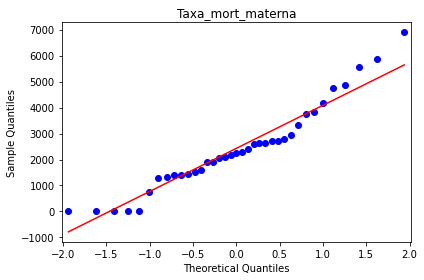

Shapiro-Wilk Test
Statistics=0.942, p=0.053
Sample looks Gaussian (fail to reject H0)


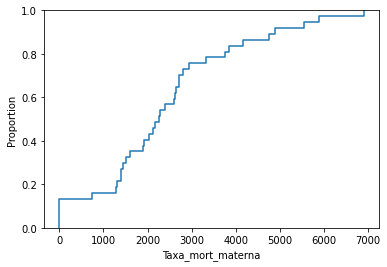

-----------------------------------------


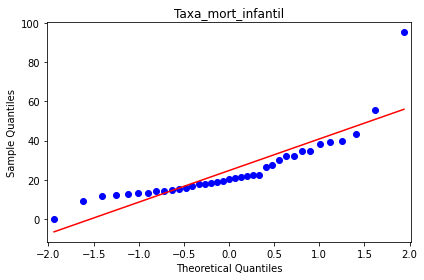

Shapiro-Wilk Test
Statistics=0.786, p=0.000
Sample does not look Gaussian (reject H0)


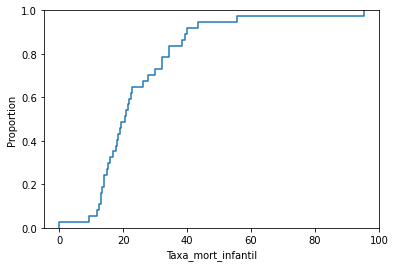

-----------------------------------------


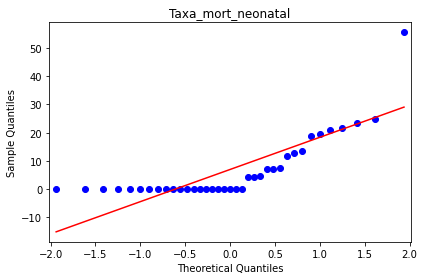

Shapiro-Wilk Test
Statistics=0.662, p=0.000
Sample does not look Gaussian (reject H0)


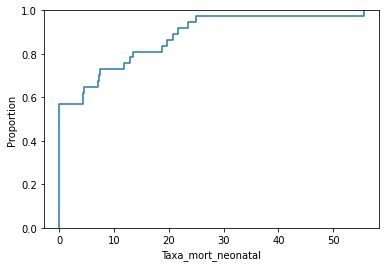

-----------------------------------------


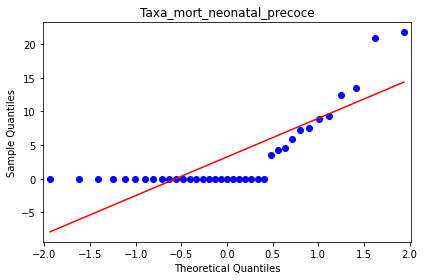

Shapiro-Wilk Test
Statistics=0.631, p=0.000
Sample does not look Gaussian (reject H0)


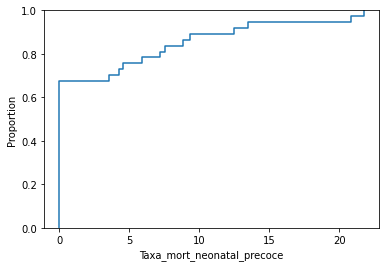

-----------------------------------------


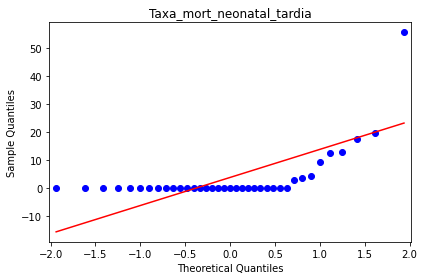

Shapiro-Wilk Test
Statistics=0.426, p=0.000
Sample does not look Gaussian (reject H0)


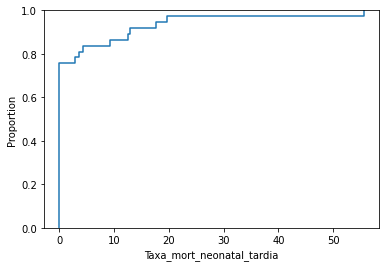

-----------------------------------------


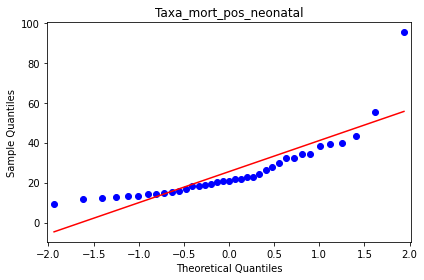

Shapiro-Wilk Test
Statistics=0.747, p=0.000
Sample does not look Gaussian (reject H0)


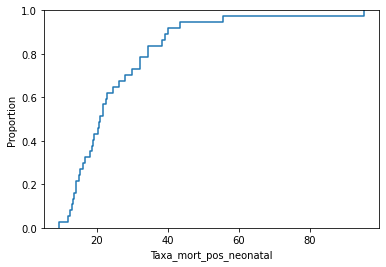

-----------------------------------------


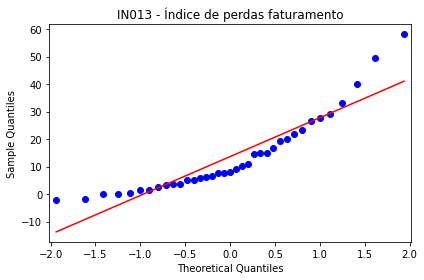

Shapiro-Wilk Test
Statistics=0.860, p=0.000
Sample does not look Gaussian (reject H0)


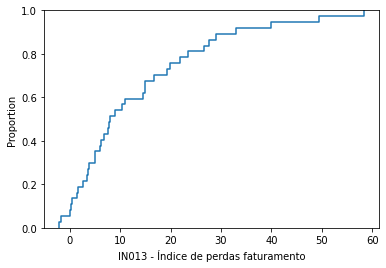

-----------------------------------------


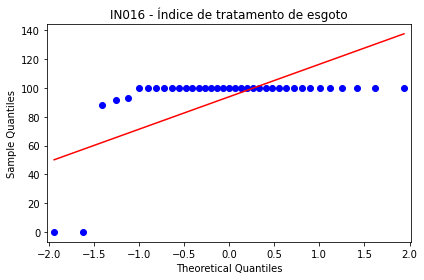

Shapiro-Wilk Test
Statistics=0.286, p=0.000
Sample does not look Gaussian (reject H0)


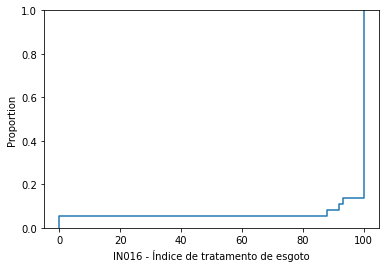

-----------------------------------------


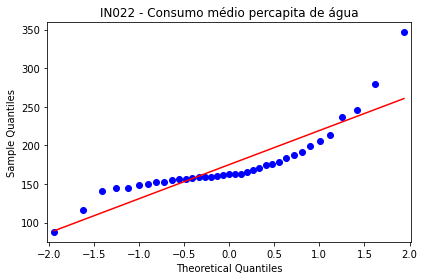

Shapiro-Wilk Test
Statistics=0.810, p=0.000
Sample does not look Gaussian (reject H0)


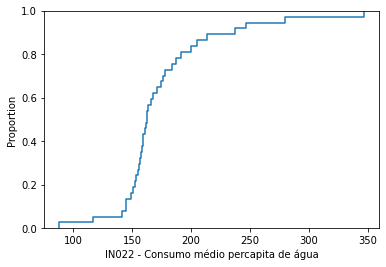

-----------------------------------------


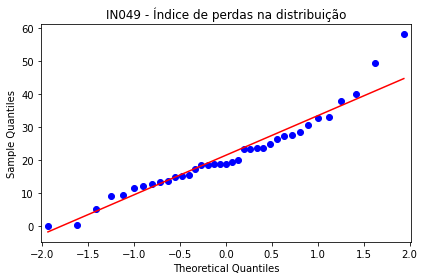

Shapiro-Wilk Test
Statistics=0.948, p=0.081
Sample looks Gaussian (fail to reject H0)


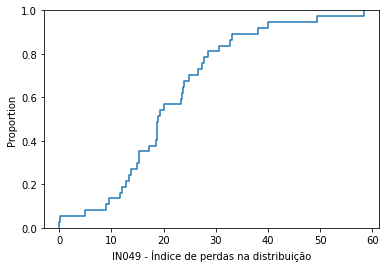

-----------------------------------------


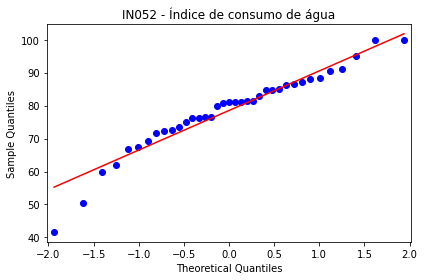

Shapiro-Wilk Test
Statistics=0.948, p=0.082
Sample looks Gaussian (fail to reject H0)


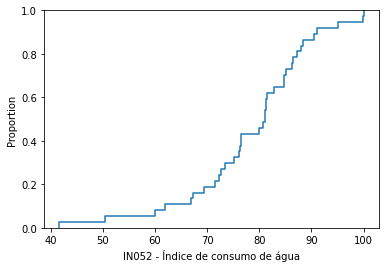

-----------------------------------------


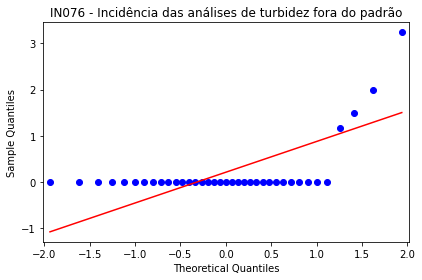

Shapiro-Wilk Test
Statistics=0.365, p=0.000
Sample does not look Gaussian (reject H0)


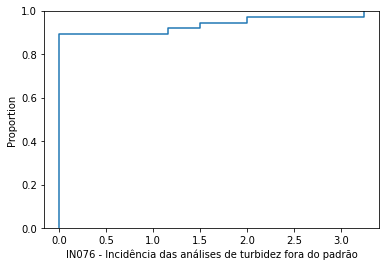

-----------------------------------------


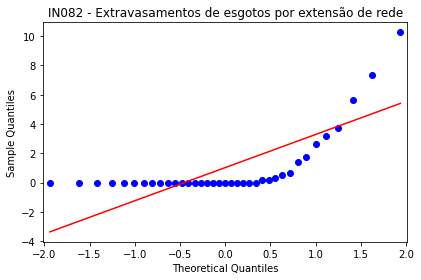

Shapiro-Wilk Test
Statistics=0.527, p=0.000
Sample does not look Gaussian (reject H0)


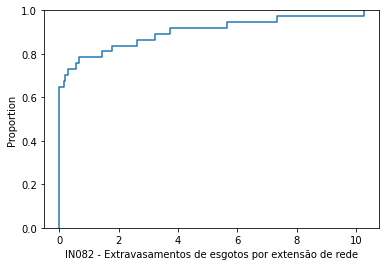

-----------------------------------------


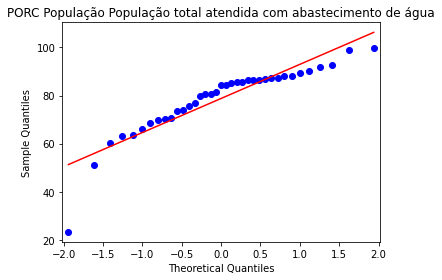

Shapiro-Wilk Test
Statistics=0.861, p=0.000
Sample does not look Gaussian (reject H0)


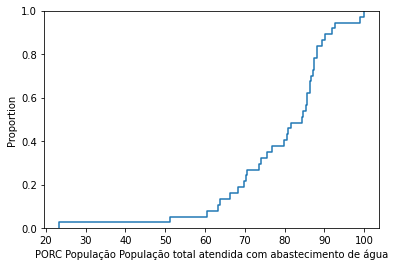

-----------------------------------------


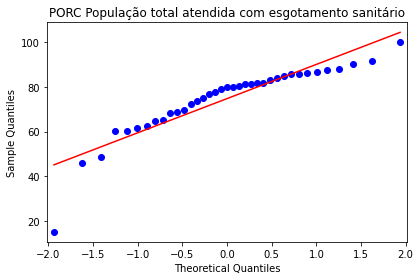

Shapiro-Wilk Test
Statistics=0.862, p=0.000
Sample does not look Gaussian (reject H0)


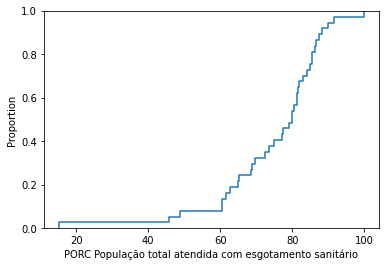

-----------------------------------------


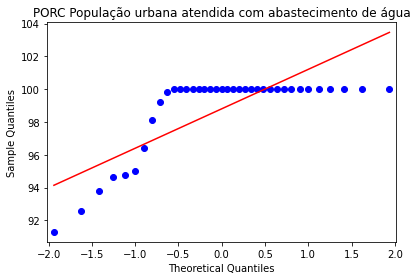

Shapiro-Wilk Test
Statistics=0.559, p=0.000
Sample does not look Gaussian (reject H0)


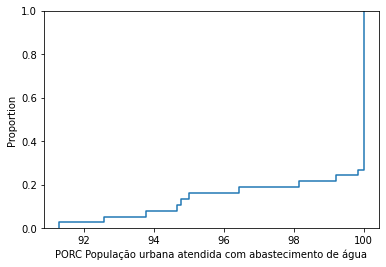

-----------------------------------------


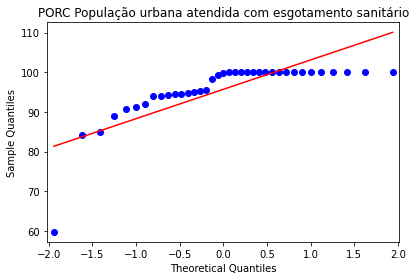

Shapiro-Wilk Test
Statistics=0.602, p=0.000
Sample does not look Gaussian (reject H0)


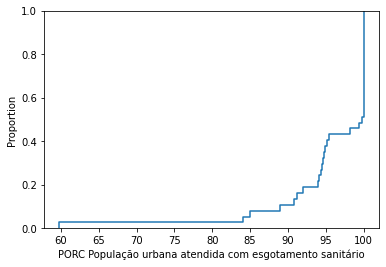


  CLUSTER 3  

-----------------------------------------


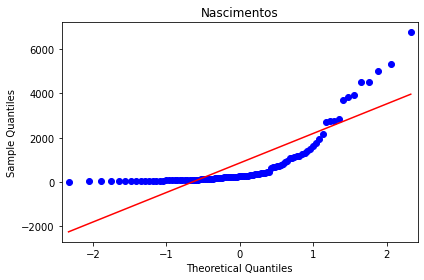

Shapiro-Wilk Test
Statistics=0.642, p=0.000
Sample does not look Gaussian (reject H0)


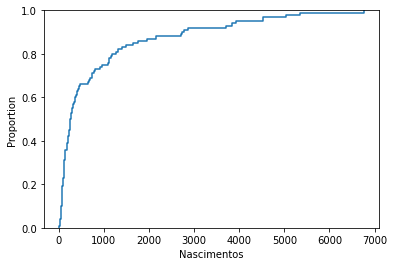

-----------------------------------------


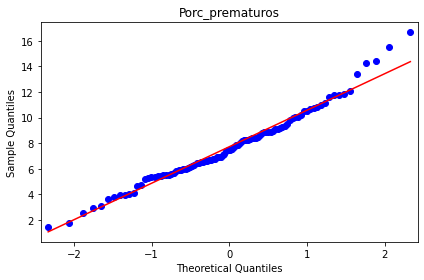

Shapiro-Wilk Test
Statistics=0.979, p=0.117
Sample looks Gaussian (fail to reject H0)


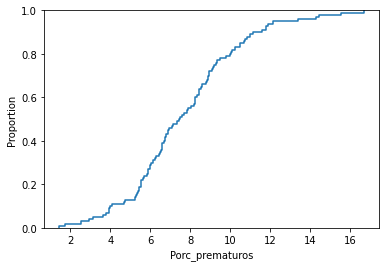

-----------------------------------------


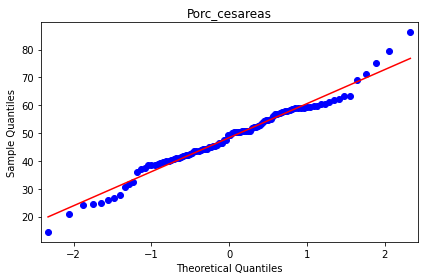

Shapiro-Wilk Test
Statistics=0.981, p=0.173
Sample looks Gaussian (fail to reject H0)


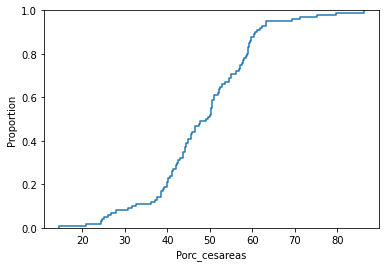

-----------------------------------------


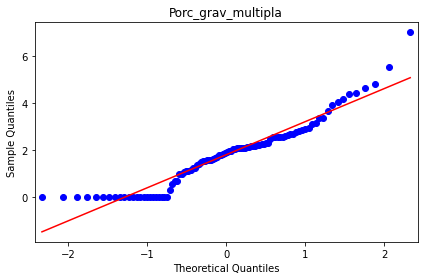

Shapiro-Wilk Test
Statistics=0.923, p=0.000
Sample does not look Gaussian (reject H0)


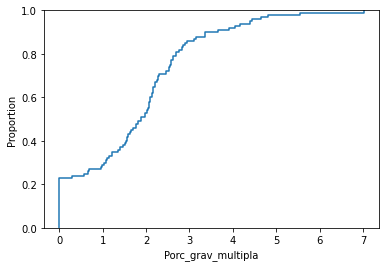

-----------------------------------------


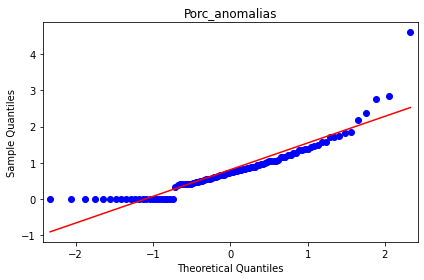

Shapiro-Wilk Test
Statistics=0.855, p=0.000
Sample does not look Gaussian (reject H0)


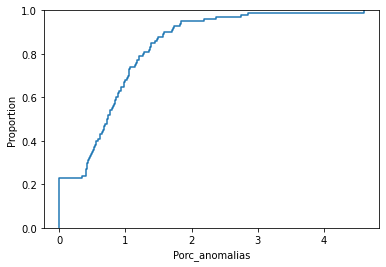

-----------------------------------------


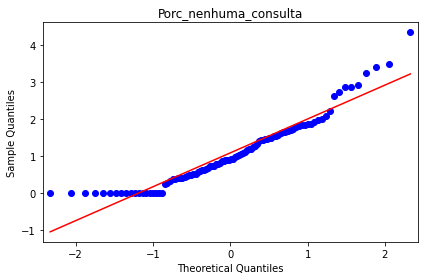

Shapiro-Wilk Test
Statistics=0.915, p=0.000
Sample does not look Gaussian (reject H0)


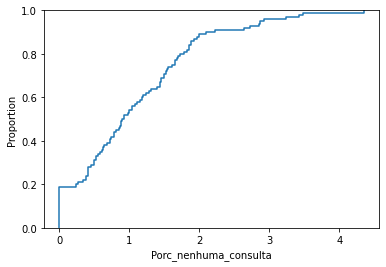

-----------------------------------------


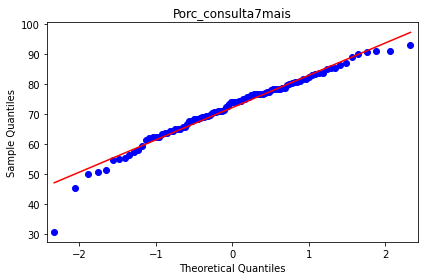

Shapiro-Wilk Test
Statistics=0.969, p=0.019
Sample does not look Gaussian (reject H0)


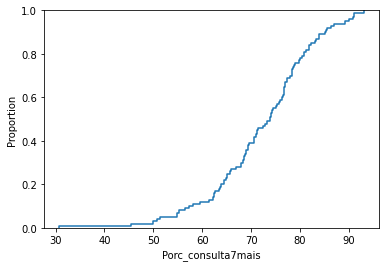

-----------------------------------------


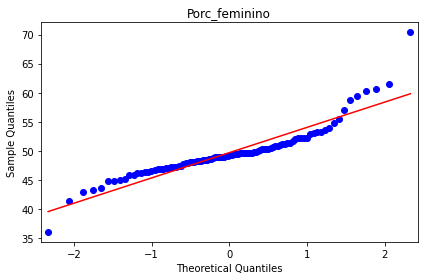

Shapiro-Wilk Test
Statistics=0.879, p=0.000
Sample does not look Gaussian (reject H0)


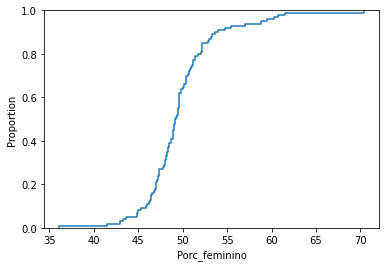

-----------------------------------------


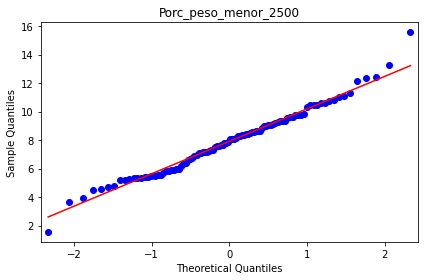

Shapiro-Wilk Test
Statistics=0.987, p=0.429
Sample looks Gaussian (fail to reject H0)


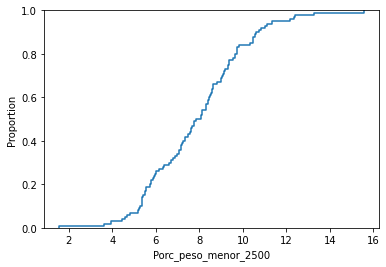

-----------------------------------------


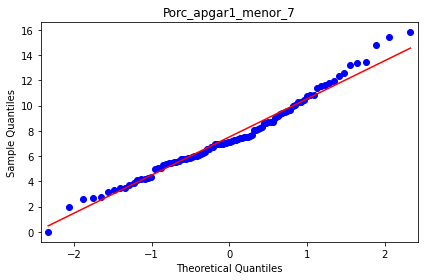

Shapiro-Wilk Test
Statistics=0.980, p=0.129
Sample looks Gaussian (fail to reject H0)


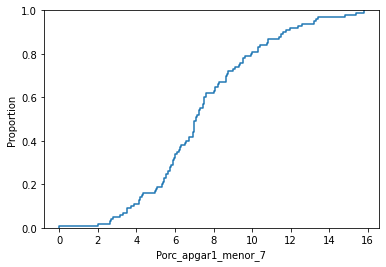

-----------------------------------------


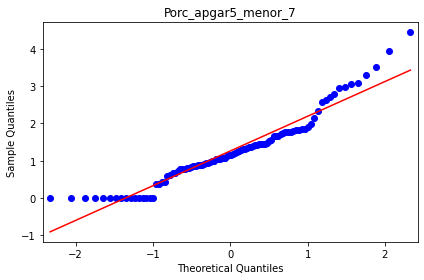

Shapiro-Wilk Test
Statistics=0.928, p=0.000
Sample does not look Gaussian (reject H0)


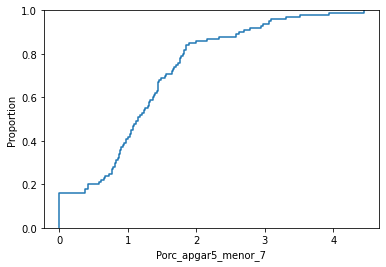

-----------------------------------------


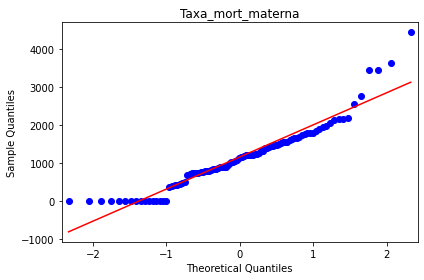

Shapiro-Wilk Test
Statistics=0.919, p=0.000
Sample does not look Gaussian (reject H0)


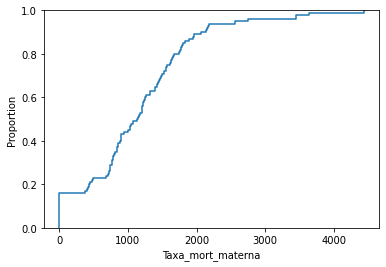

-----------------------------------------


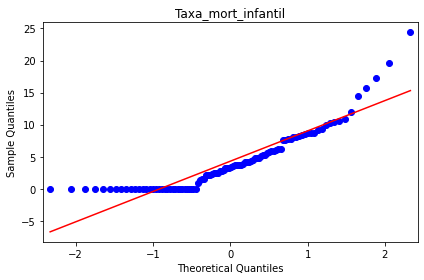

Shapiro-Wilk Test
Statistics=0.835, p=0.000
Sample does not look Gaussian (reject H0)


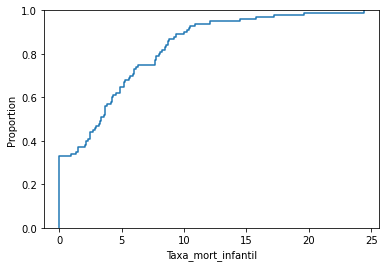

-----------------------------------------


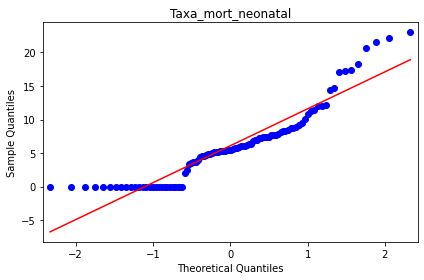

Shapiro-Wilk Test
Statistics=0.878, p=0.000
Sample does not look Gaussian (reject H0)


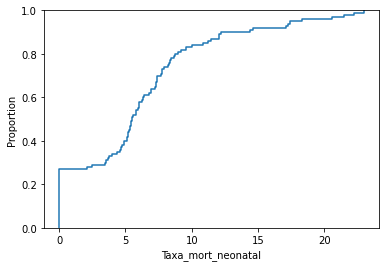

-----------------------------------------


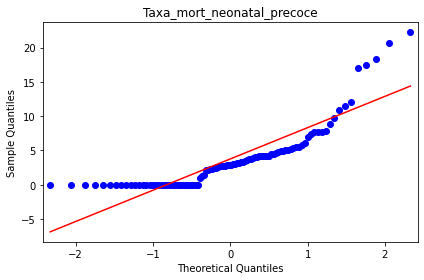

Shapiro-Wilk Test
Statistics=0.760, p=0.000
Sample does not look Gaussian (reject H0)


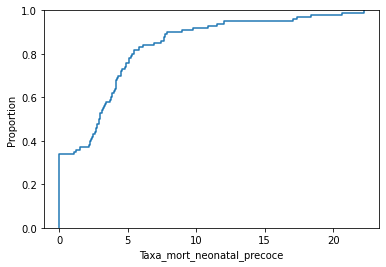

-----------------------------------------


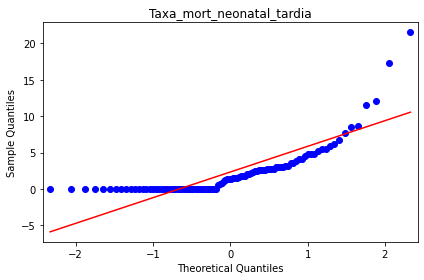

Shapiro-Wilk Test
Statistics=0.673, p=0.000
Sample does not look Gaussian (reject H0)


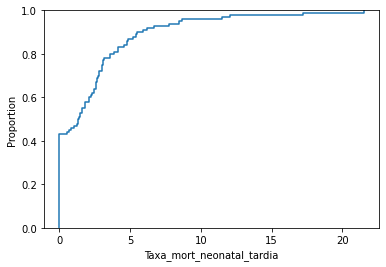

-----------------------------------------


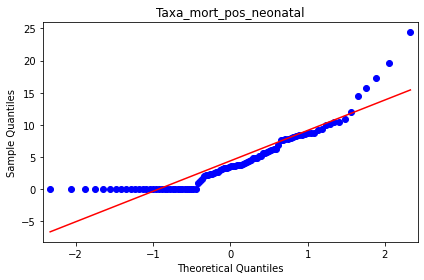

Shapiro-Wilk Test
Statistics=0.841, p=0.000
Sample does not look Gaussian (reject H0)


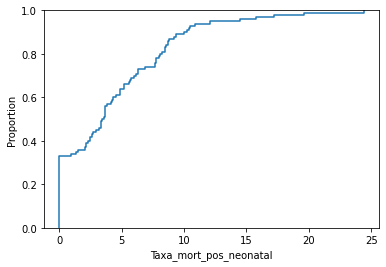

-----------------------------------------


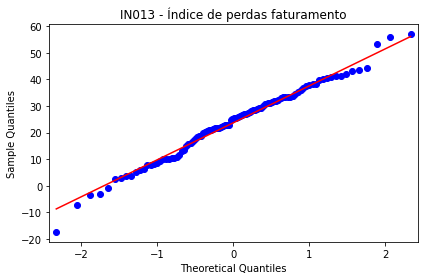

Shapiro-Wilk Test
Statistics=0.990, p=0.678
Sample looks Gaussian (fail to reject H0)


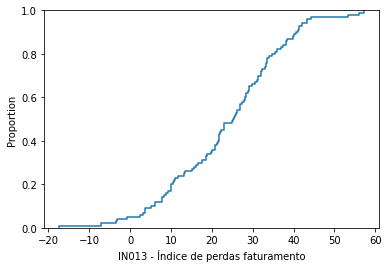

-----------------------------------------


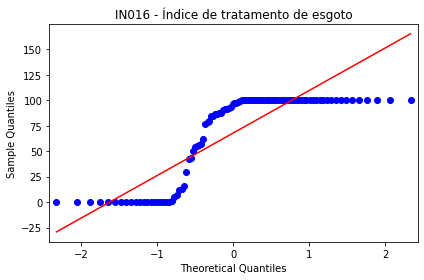

Shapiro-Wilk Test
Statistics=0.699, p=0.000
Sample does not look Gaussian (reject H0)


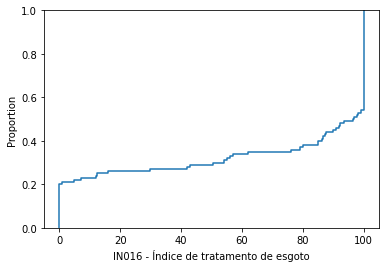

-----------------------------------------


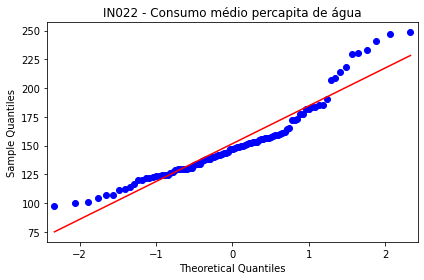

Shapiro-Wilk Test
Statistics=0.915, p=0.000
Sample does not look Gaussian (reject H0)


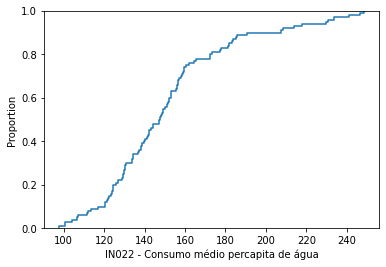

-----------------------------------------


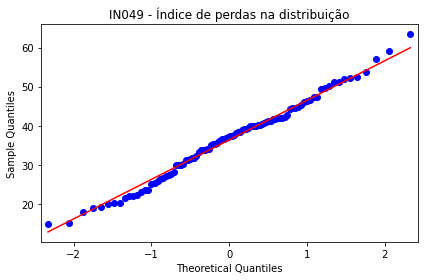

Shapiro-Wilk Test
Statistics=0.989, p=0.590
Sample looks Gaussian (fail to reject H0)


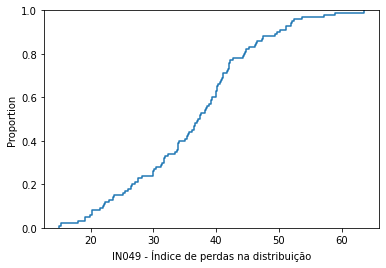

-----------------------------------------


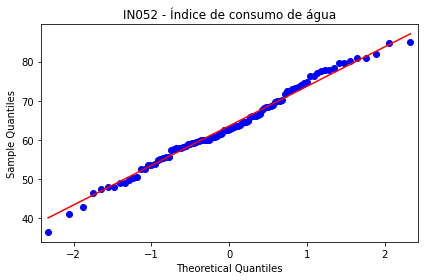

Shapiro-Wilk Test
Statistics=0.989, p=0.589
Sample looks Gaussian (fail to reject H0)


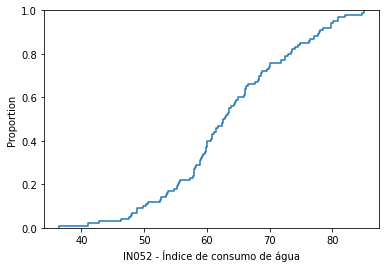

-----------------------------------------


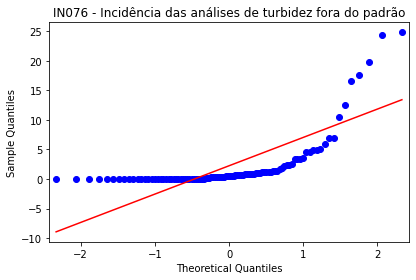

Shapiro-Wilk Test
Statistics=0.507, p=0.000
Sample does not look Gaussian (reject H0)


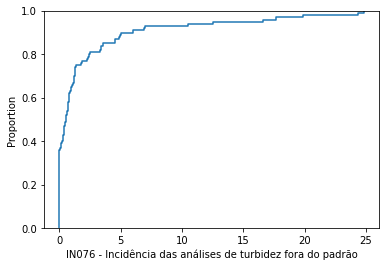

-----------------------------------------


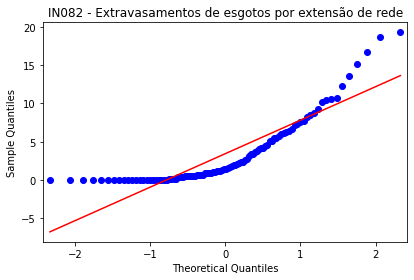

Shapiro-Wilk Test
Statistics=0.777, p=0.000
Sample does not look Gaussian (reject H0)


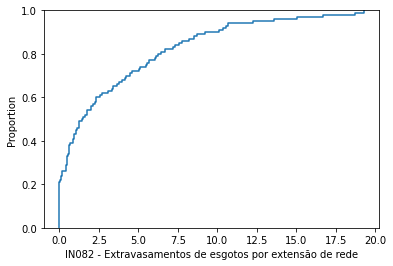

-----------------------------------------


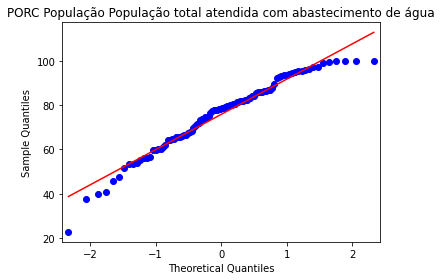

Shapiro-Wilk Test
Statistics=0.961, p=0.005
Sample does not look Gaussian (reject H0)


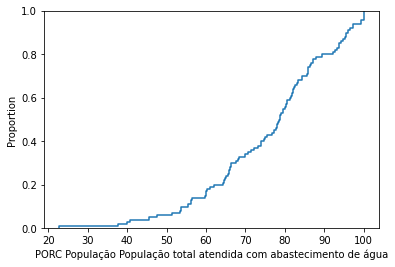

-----------------------------------------


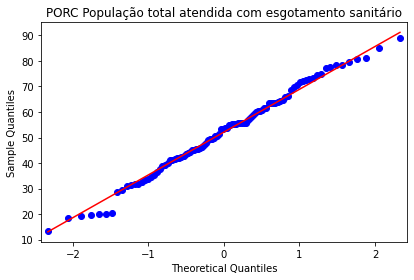

Shapiro-Wilk Test
Statistics=0.988, p=0.541
Sample looks Gaussian (fail to reject H0)


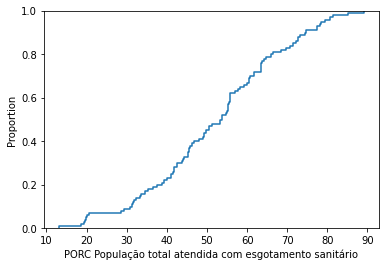

-----------------------------------------


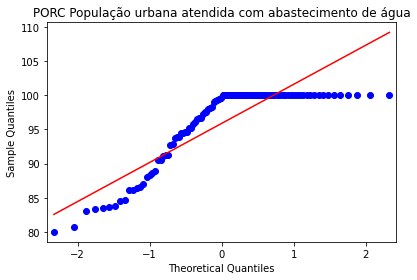

Shapiro-Wilk Test
Statistics=0.743, p=0.000
Sample does not look Gaussian (reject H0)


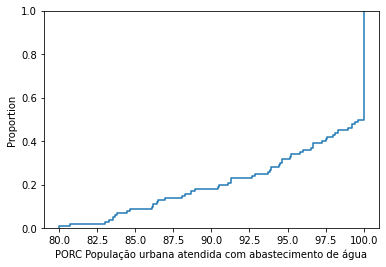

-----------------------------------------


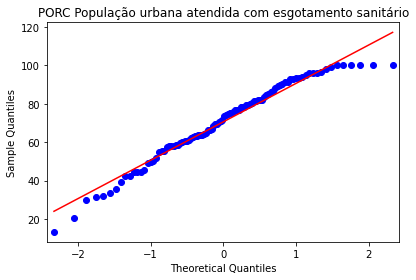

Shapiro-Wilk Test
Statistics=0.964, p=0.008
Sample does not look Gaussian (reject H0)


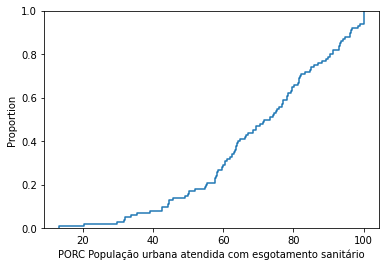


  CLUSTER 4  

-----------------------------------------


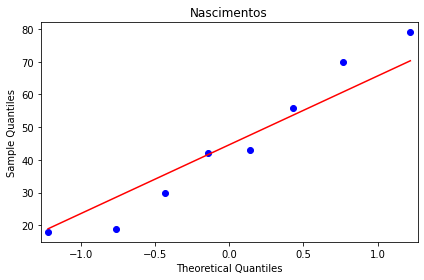

Shapiro-Wilk Test
Statistics=0.938, p=0.590
Sample looks Gaussian (fail to reject H0)


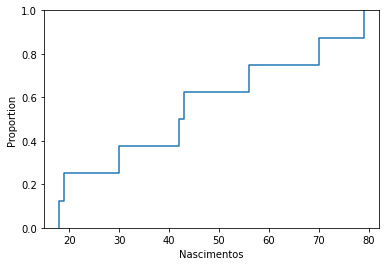

-----------------------------------------


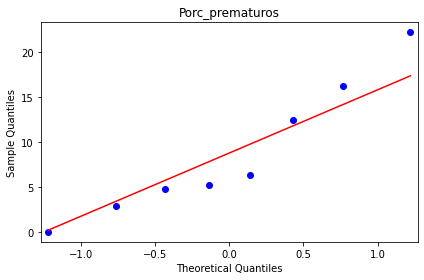

Shapiro-Wilk Test
Statistics=0.918, p=0.417
Sample looks Gaussian (fail to reject H0)


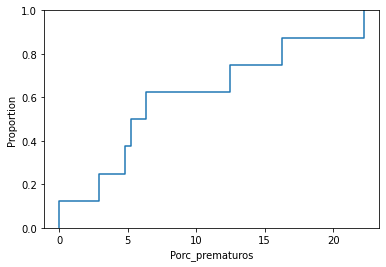

-----------------------------------------


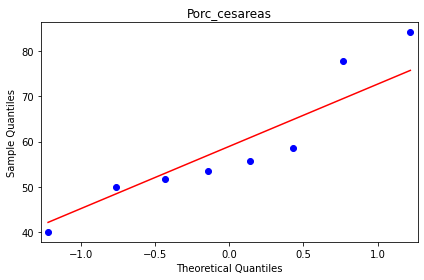

Shapiro-Wilk Test
Statistics=0.891, p=0.240
Sample looks Gaussian (fail to reject H0)


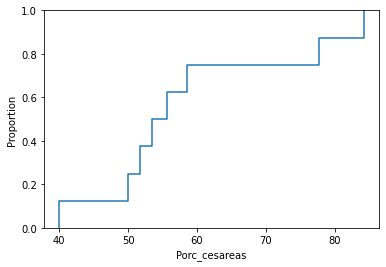

-----------------------------------------


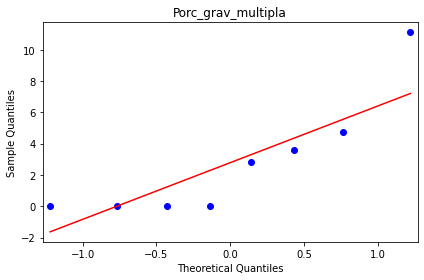

Shapiro-Wilk Test
Statistics=0.775, p=0.015
Sample does not look Gaussian (reject H0)


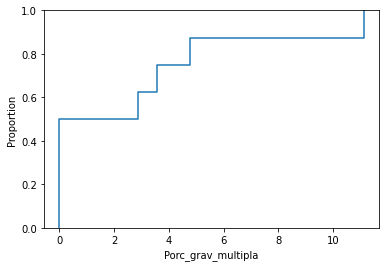

-----------------------------------------


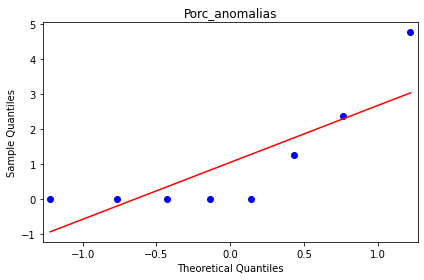

Shapiro-Wilk Test
Statistics=0.704, p=0.003
Sample does not look Gaussian (reject H0)


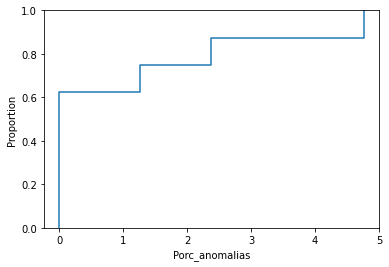

-----------------------------------------


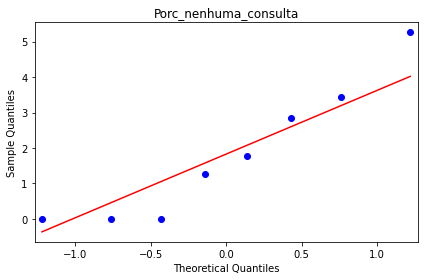

Shapiro-Wilk Test
Statistics=0.894, p=0.254
Sample looks Gaussian (fail to reject H0)


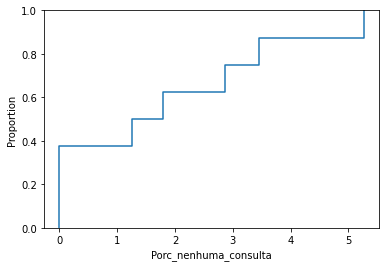

-----------------------------------------


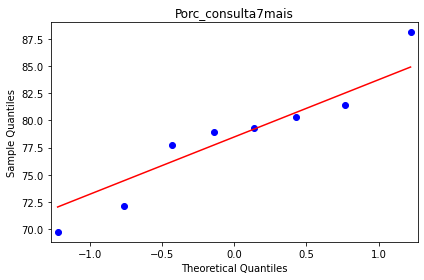

Shapiro-Wilk Test
Statistics=0.946, p=0.675
Sample looks Gaussian (fail to reject H0)


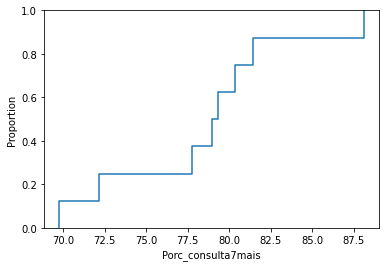

-----------------------------------------


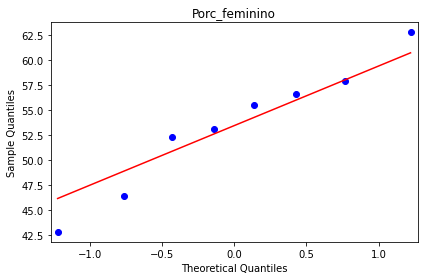

Shapiro-Wilk Test
Statistics=0.965, p=0.860
Sample looks Gaussian (fail to reject H0)


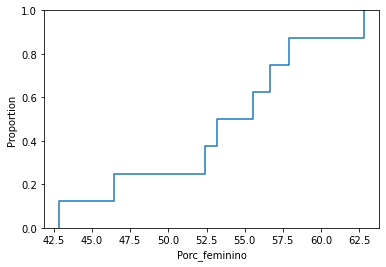

-----------------------------------------


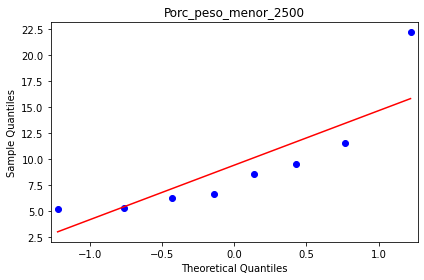

Shapiro-Wilk Test
Statistics=0.756, p=0.010
Sample does not look Gaussian (reject H0)


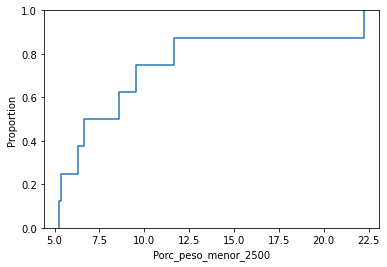

-----------------------------------------


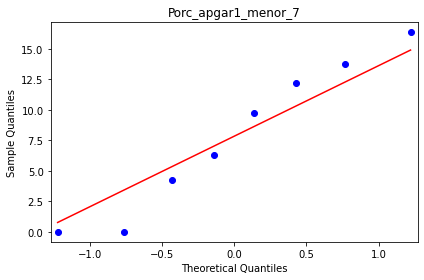

Shapiro-Wilk Test
Statistics=0.934, p=0.558
Sample looks Gaussian (fail to reject H0)


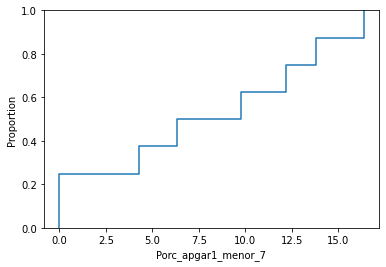

-----------------------------------------


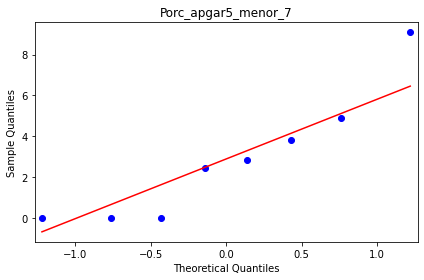

Shapiro-Wilk Test
Statistics=0.873, p=0.161
Sample looks Gaussian (fail to reject H0)


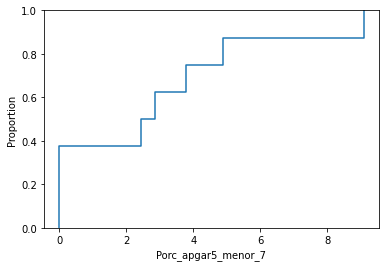

-----------------------------------------


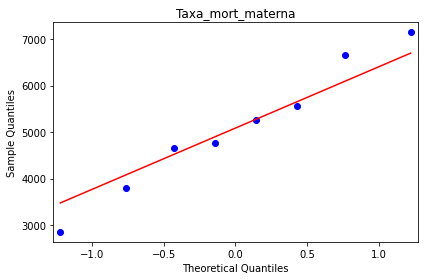

Shapiro-Wilk Test
Statistics=0.978, p=0.952
Sample looks Gaussian (fail to reject H0)


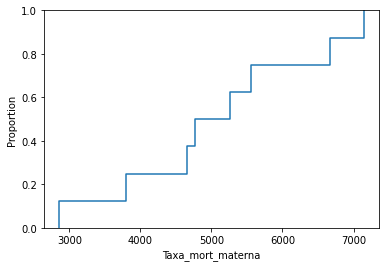

-----------------------------------------


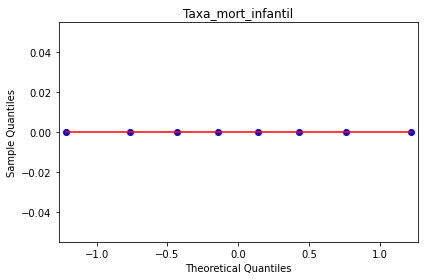

Shapiro-Wilk Test
Statistics=1.000, p=1.000
Sample looks Gaussian (fail to reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


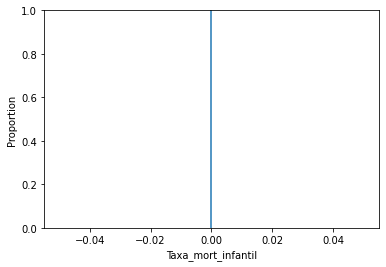

-----------------------------------------


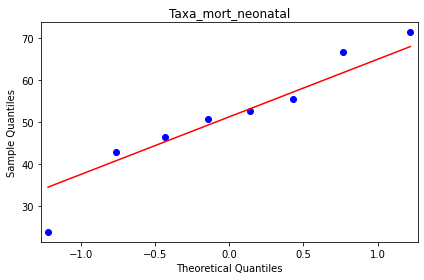

Shapiro-Wilk Test
Statistics=0.957, p=0.784
Sample looks Gaussian (fail to reject H0)


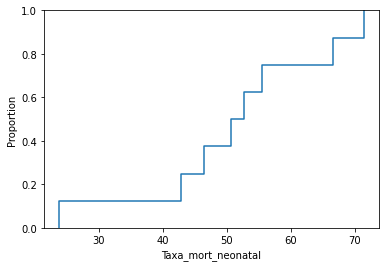

-----------------------------------------


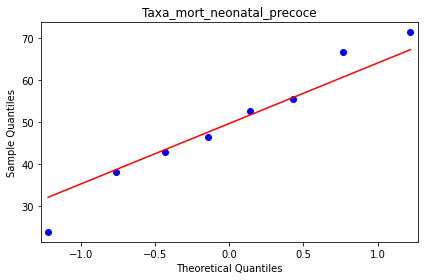

Shapiro-Wilk Test
Statistics=0.981, p=0.970
Sample looks Gaussian (fail to reject H0)


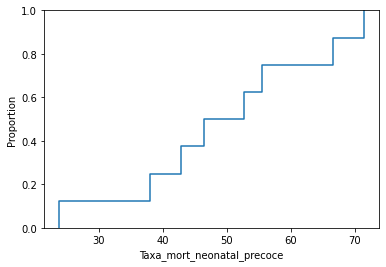

-----------------------------------------


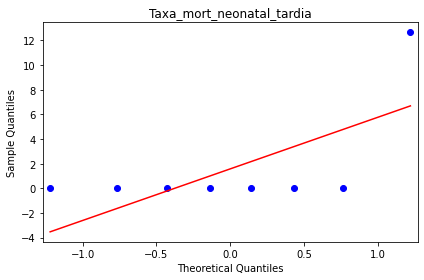

Shapiro-Wilk Test
Statistics=0.418, p=0.000
Sample does not look Gaussian (reject H0)


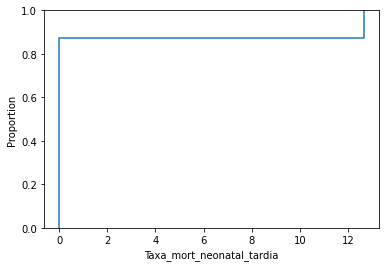

-----------------------------------------


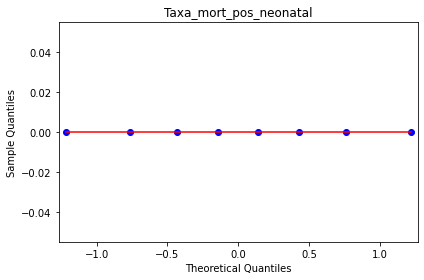

Shapiro-Wilk Test
Statistics=1.000, p=1.000
Sample looks Gaussian (fail to reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


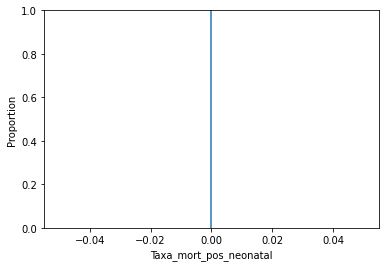

-----------------------------------------


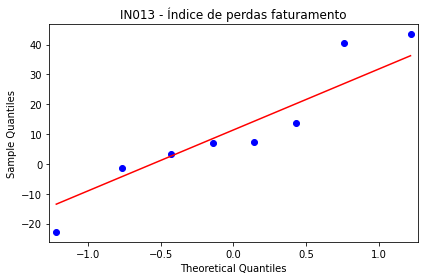

Shapiro-Wilk Test
Statistics=0.920, p=0.432
Sample looks Gaussian (fail to reject H0)


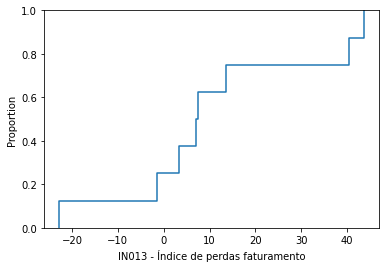

-----------------------------------------


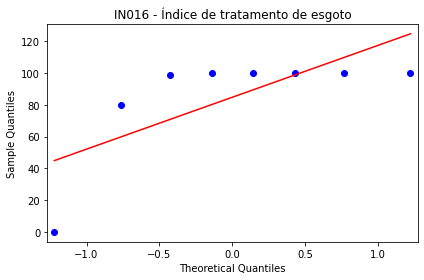

Shapiro-Wilk Test
Statistics=0.524, p=0.000
Sample does not look Gaussian (reject H0)


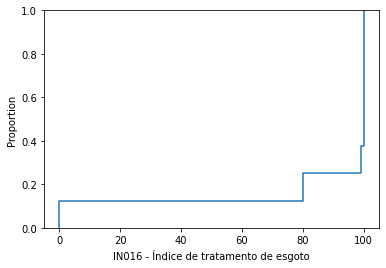

-----------------------------------------


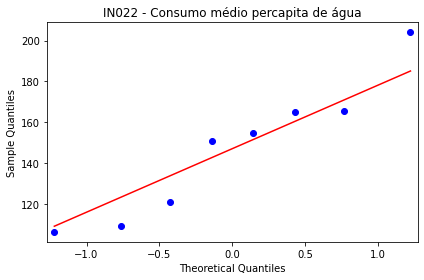

Shapiro-Wilk Test
Statistics=0.929, p=0.510
Sample looks Gaussian (fail to reject H0)


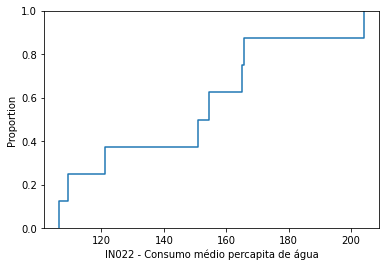

-----------------------------------------


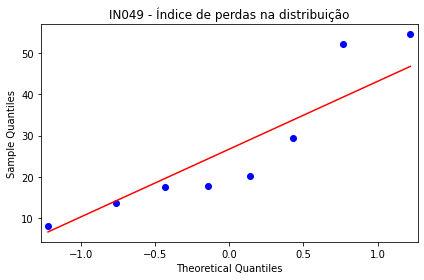

Shapiro-Wilk Test
Statistics=0.839, p=0.073
Sample looks Gaussian (fail to reject H0)


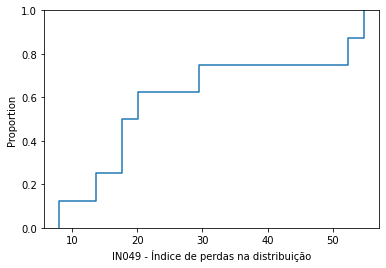

-----------------------------------------


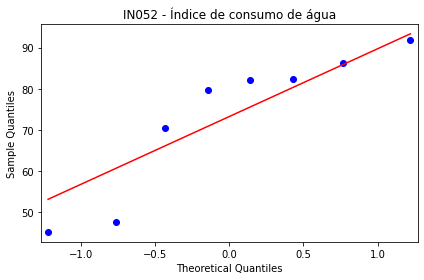

Shapiro-Wilk Test
Statistics=0.839, p=0.073
Sample looks Gaussian (fail to reject H0)


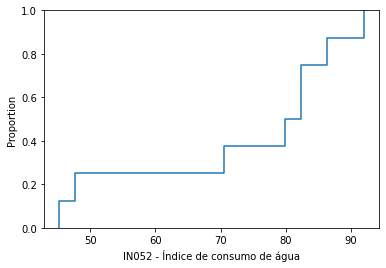

-----------------------------------------


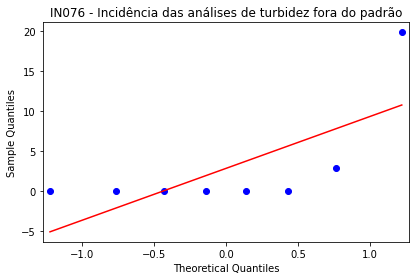

Shapiro-Wilk Test
Statistics=0.493, p=0.000
Sample does not look Gaussian (reject H0)


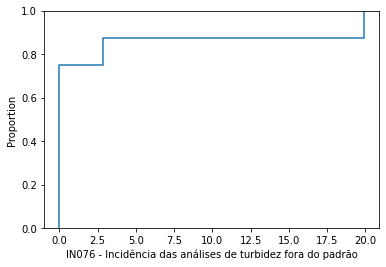

-----------------------------------------


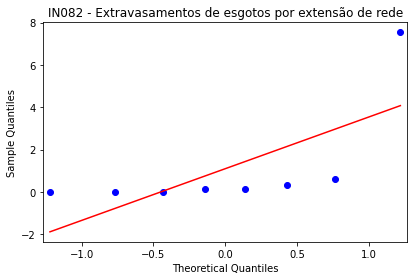

Shapiro-Wilk Test
Statistics=0.484, p=0.000
Sample does not look Gaussian (reject H0)


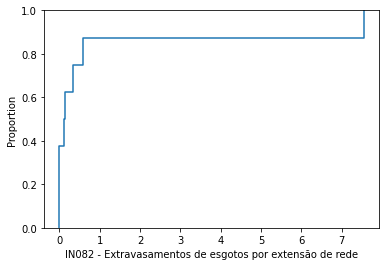

-----------------------------------------


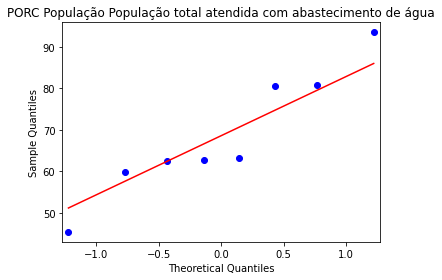

Shapiro-Wilk Test
Statistics=0.930, p=0.518
Sample looks Gaussian (fail to reject H0)


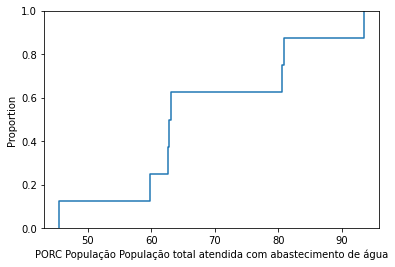

-----------------------------------------


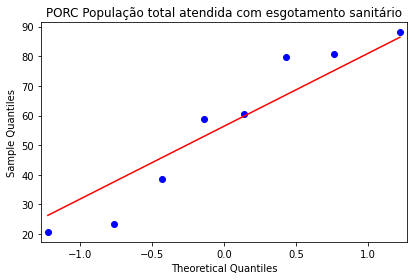

Shapiro-Wilk Test
Statistics=0.904, p=0.312
Sample looks Gaussian (fail to reject H0)


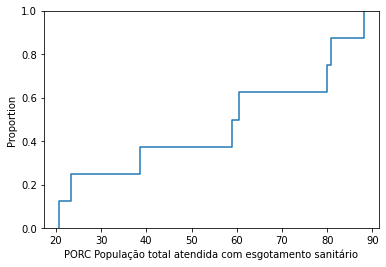

-----------------------------------------


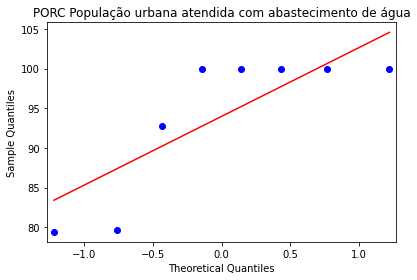

Shapiro-Wilk Test
Statistics=0.676, p=0.001
Sample does not look Gaussian (reject H0)


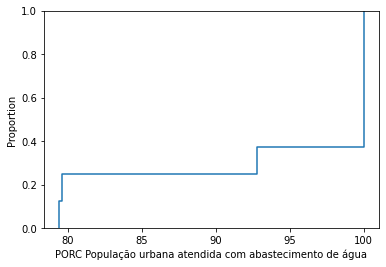

-----------------------------------------


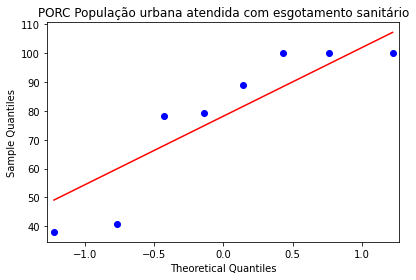

Shapiro-Wilk Test
Statistics=0.807, p=0.034
Sample does not look Gaussian (reject H0)


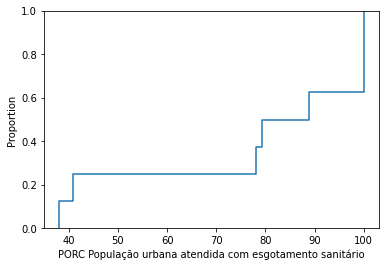


  CLUSTER 5  

-----------------------------------------


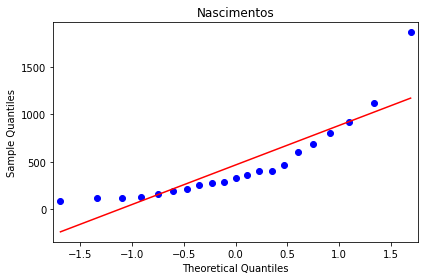

Shapiro-Wilk Test
Statistics=0.784, p=0.000
Sample does not look Gaussian (reject H0)


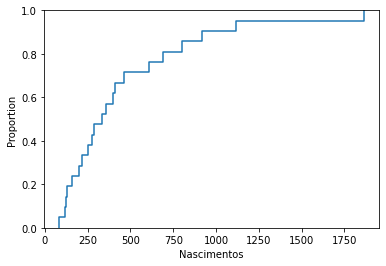

-----------------------------------------


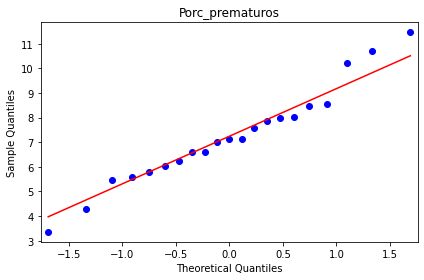

Shapiro-Wilk Test
Statistics=0.974, p=0.812
Sample looks Gaussian (fail to reject H0)


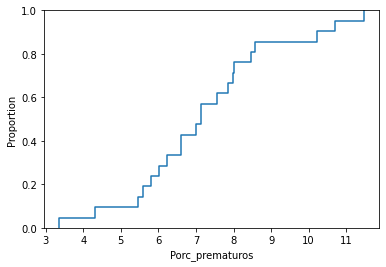

-----------------------------------------


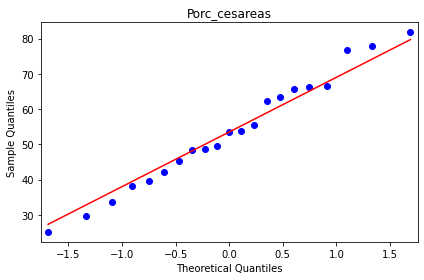

Shapiro-Wilk Test
Statistics=0.976, p=0.866
Sample looks Gaussian (fail to reject H0)


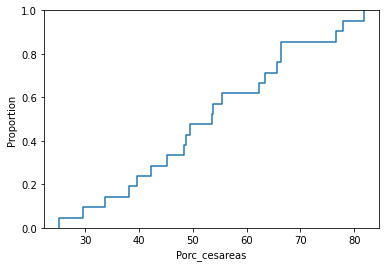

-----------------------------------------


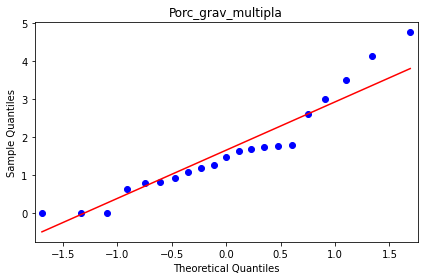

Shapiro-Wilk Test
Statistics=0.913, p=0.063
Sample looks Gaussian (fail to reject H0)


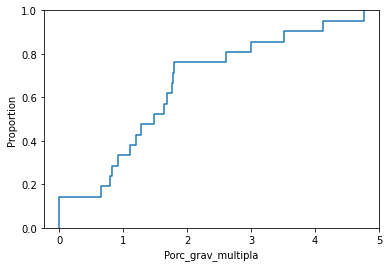

-----------------------------------------


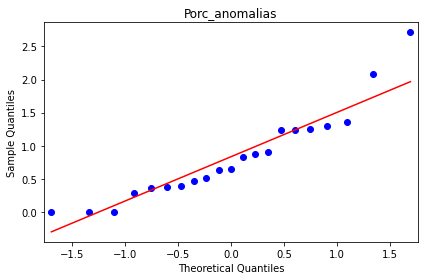

Shapiro-Wilk Test
Statistics=0.905, p=0.043
Sample does not look Gaussian (reject H0)


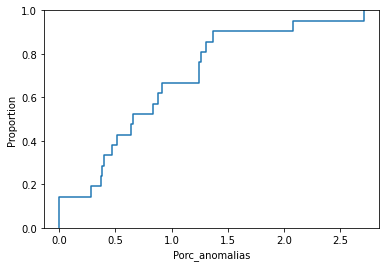

-----------------------------------------


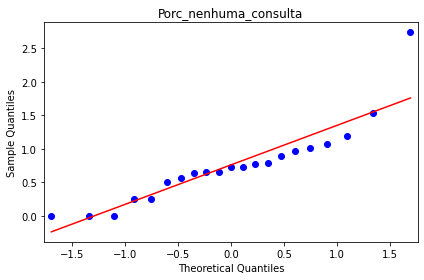

Shapiro-Wilk Test
Statistics=0.853, p=0.005
Sample does not look Gaussian (reject H0)


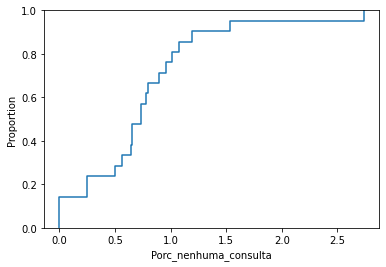

-----------------------------------------


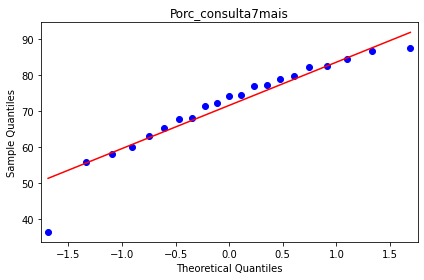

Shapiro-Wilk Test
Statistics=0.923, p=0.102
Sample looks Gaussian (fail to reject H0)


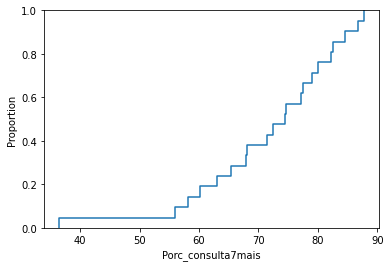

-----------------------------------------


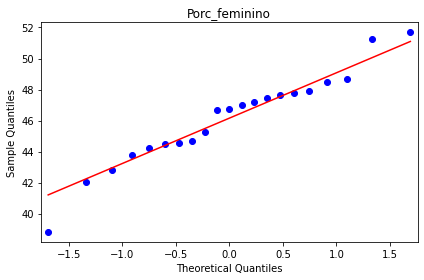

Shapiro-Wilk Test
Statistics=0.967, p=0.676
Sample looks Gaussian (fail to reject H0)


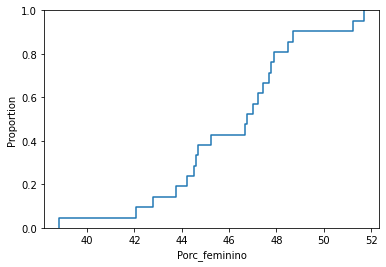

-----------------------------------------


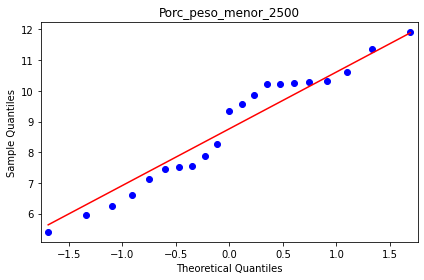

Shapiro-Wilk Test
Statistics=0.942, p=0.234
Sample looks Gaussian (fail to reject H0)


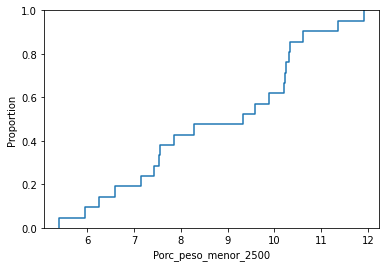

-----------------------------------------


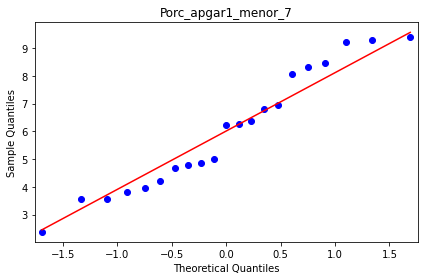

Shapiro-Wilk Test
Statistics=0.938, p=0.198
Sample looks Gaussian (fail to reject H0)


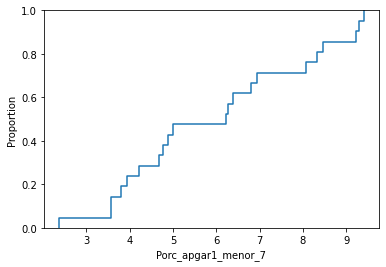

-----------------------------------------


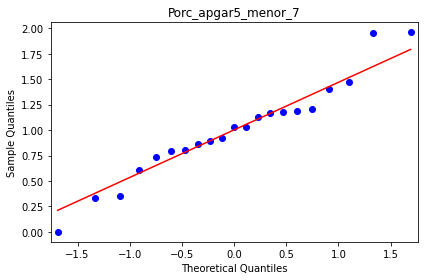

Shapiro-Wilk Test
Statistics=0.965, p=0.624
Sample looks Gaussian (fail to reject H0)


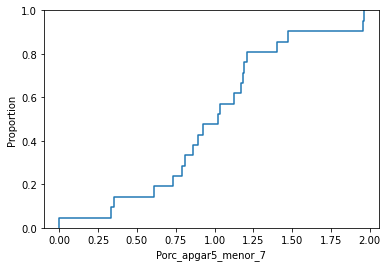

-----------------------------------------


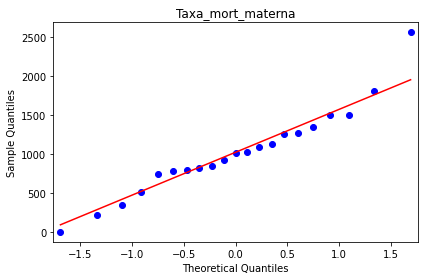

Shapiro-Wilk Test
Statistics=0.958, p=0.477
Sample looks Gaussian (fail to reject H0)


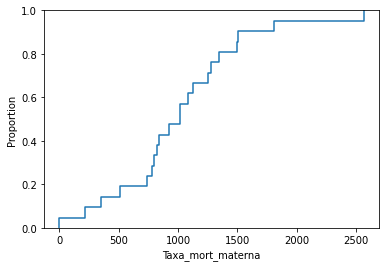

-----------------------------------------


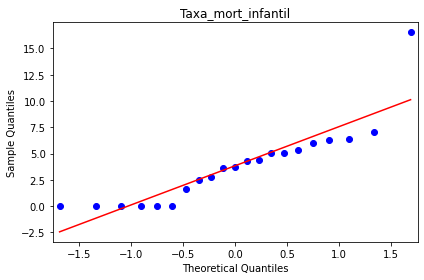

Shapiro-Wilk Test
Statistics=0.813, p=0.001
Sample does not look Gaussian (reject H0)


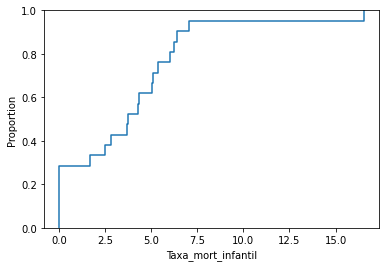

-----------------------------------------


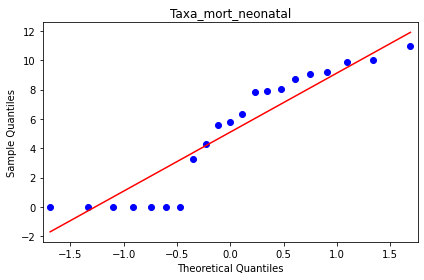

Shapiro-Wilk Test
Statistics=0.852, p=0.005
Sample does not look Gaussian (reject H0)


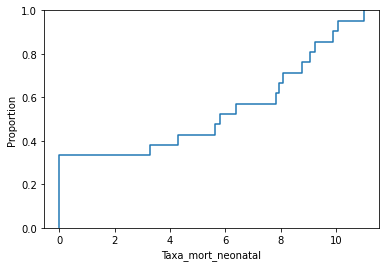

-----------------------------------------


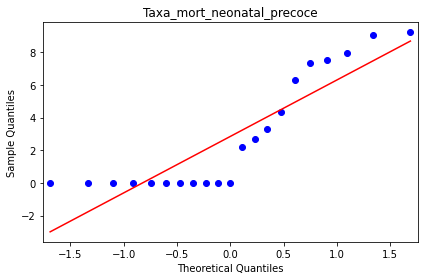

Shapiro-Wilk Test
Statistics=0.768, p=0.000
Sample does not look Gaussian (reject H0)


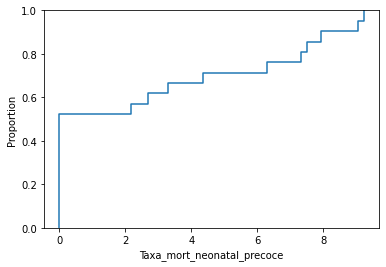

-----------------------------------------


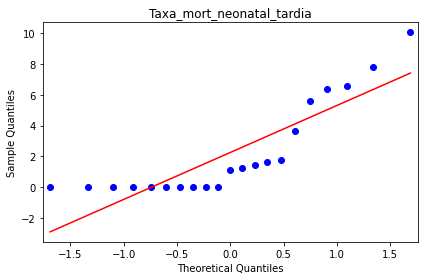

Shapiro-Wilk Test
Statistics=0.753, p=0.000
Sample does not look Gaussian (reject H0)


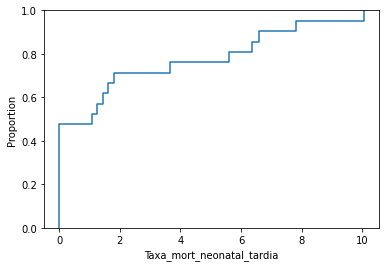

-----------------------------------------


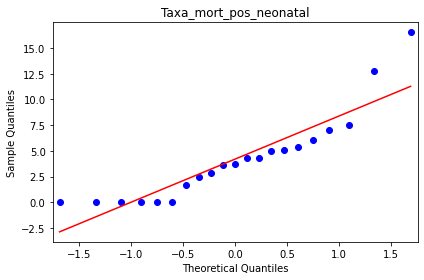

Shapiro-Wilk Test
Statistics=0.846, p=0.004
Sample does not look Gaussian (reject H0)


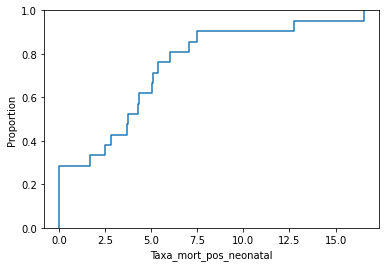

-----------------------------------------


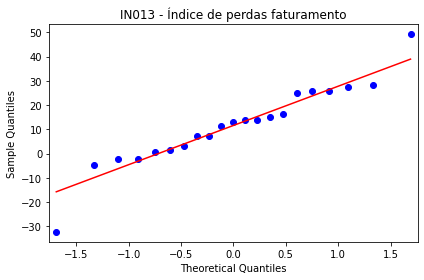

Shapiro-Wilk Test
Statistics=0.949, p=0.326
Sample looks Gaussian (fail to reject H0)


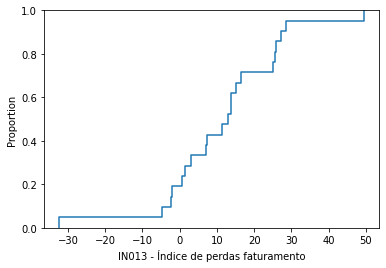

-----------------------------------------


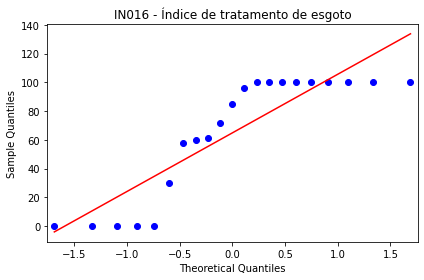

Shapiro-Wilk Test
Statistics=0.759, p=0.000
Sample does not look Gaussian (reject H0)


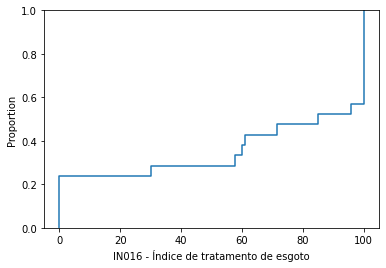

-----------------------------------------


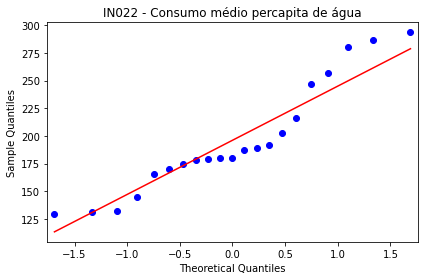

Shapiro-Wilk Test
Statistics=0.902, p=0.039
Sample does not look Gaussian (reject H0)


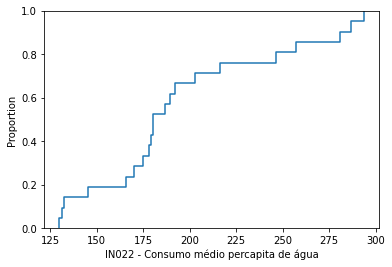

-----------------------------------------


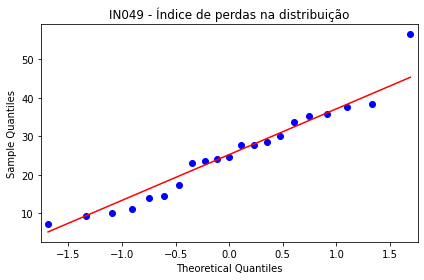

Shapiro-Wilk Test
Statistics=0.948, p=0.314
Sample looks Gaussian (fail to reject H0)


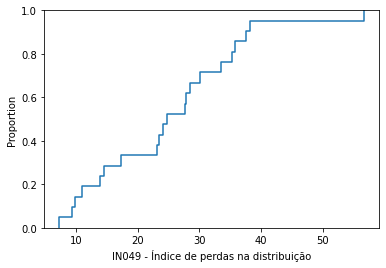

-----------------------------------------


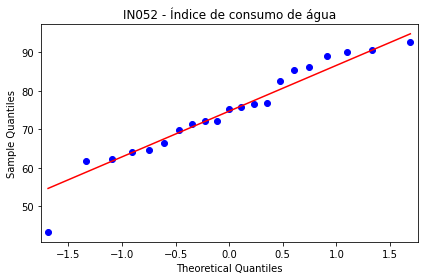

Shapiro-Wilk Test
Statistics=0.948, p=0.314
Sample looks Gaussian (fail to reject H0)


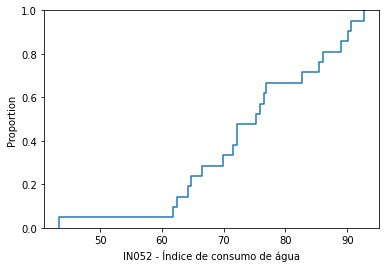

-----------------------------------------


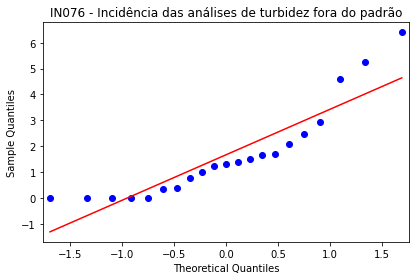

Shapiro-Wilk Test
Statistics=0.832, p=0.002
Sample does not look Gaussian (reject H0)


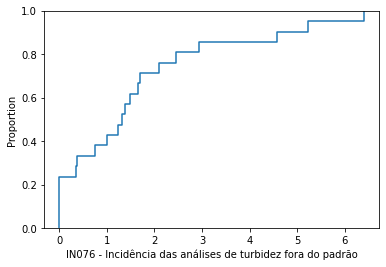

-----------------------------------------


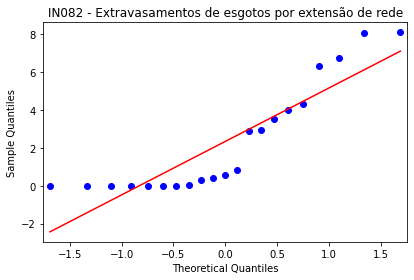

Shapiro-Wilk Test
Statistics=0.788, p=0.000
Sample does not look Gaussian (reject H0)


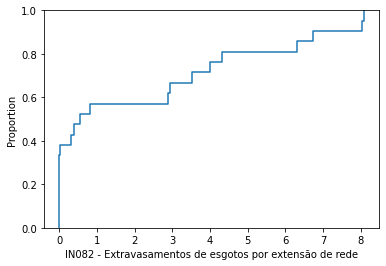

-----------------------------------------


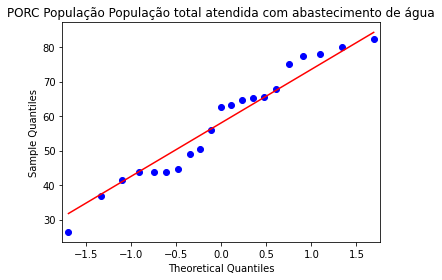

Shapiro-Wilk Test
Statistics=0.951, p=0.358
Sample looks Gaussian (fail to reject H0)


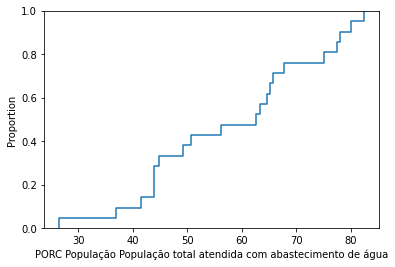

-----------------------------------------


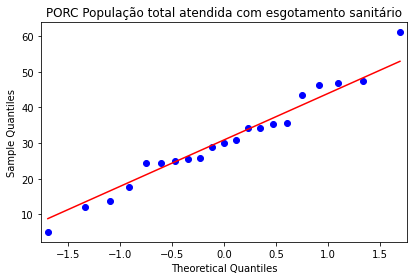

Shapiro-Wilk Test
Statistics=0.978, p=0.893
Sample looks Gaussian (fail to reject H0)


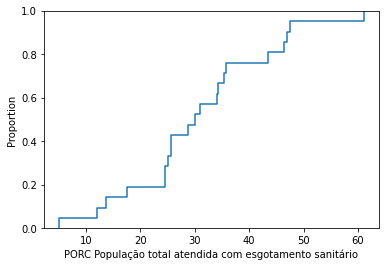

-----------------------------------------


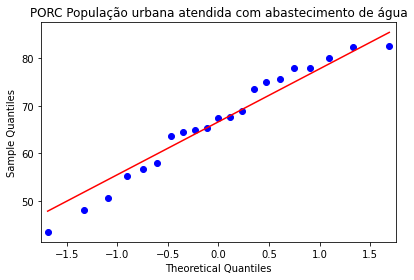

Shapiro-Wilk Test
Statistics=0.955, p=0.422
Sample looks Gaussian (fail to reject H0)


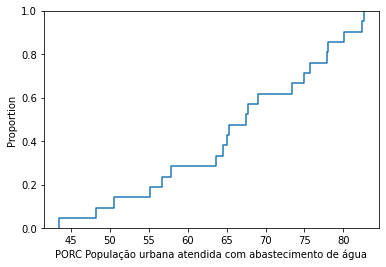

-----------------------------------------


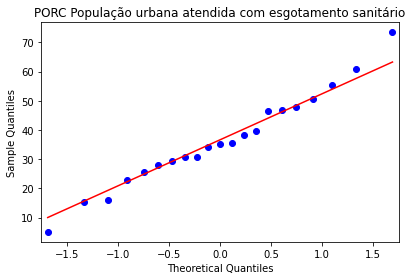

Shapiro-Wilk Test
Statistics=0.988, p=0.993
Sample looks Gaussian (fail to reject H0)


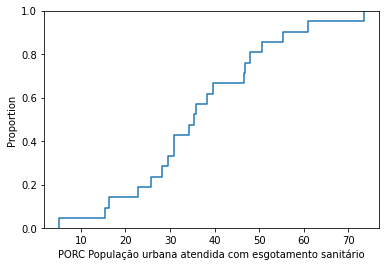


  CLUSTER 6  

-----------------------------------------


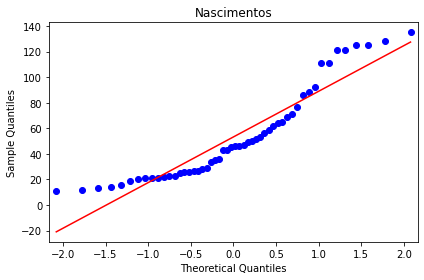

Shapiro-Wilk Test
Statistics=0.876, p=0.000
Sample does not look Gaussian (reject H0)


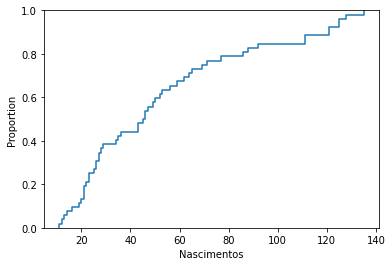

-----------------------------------------


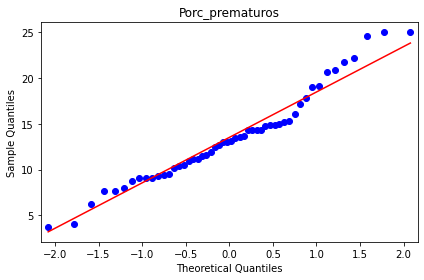

Shapiro-Wilk Test
Statistics=0.959, p=0.074
Sample looks Gaussian (fail to reject H0)


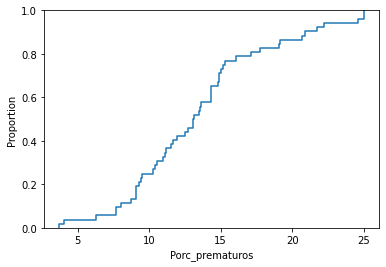

-----------------------------------------


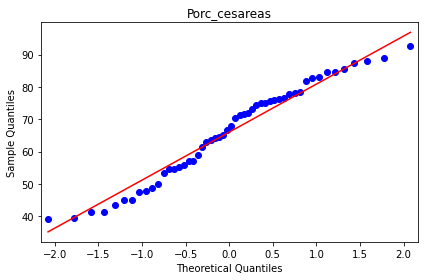

Shapiro-Wilk Test
Statistics=0.959, p=0.069
Sample looks Gaussian (fail to reject H0)


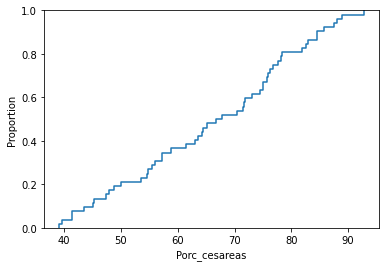

-----------------------------------------


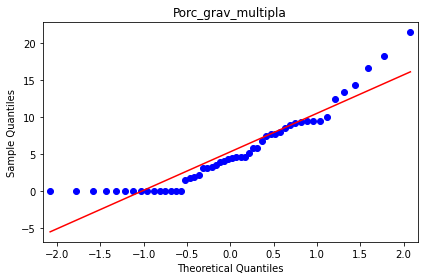

Shapiro-Wilk Test
Statistics=0.883, p=0.000
Sample does not look Gaussian (reject H0)


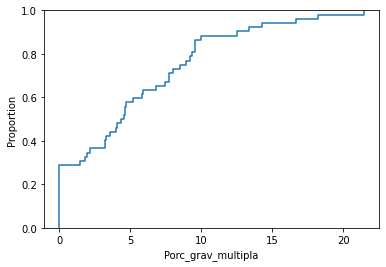

-----------------------------------------


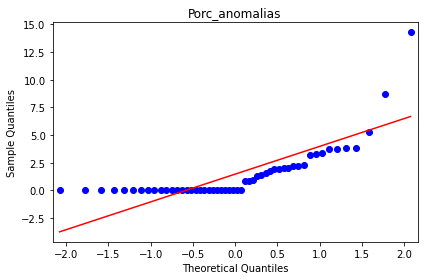

Shapiro-Wilk Test
Statistics=0.619, p=0.000
Sample does not look Gaussian (reject H0)


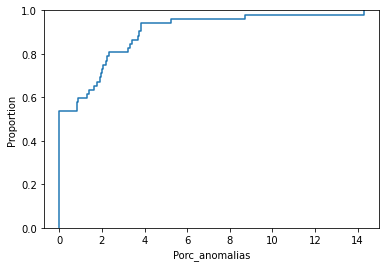

-----------------------------------------


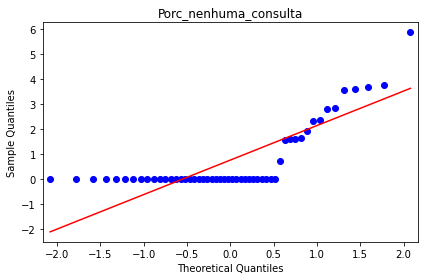

Shapiro-Wilk Test
Statistics=0.622, p=0.000
Sample does not look Gaussian (reject H0)


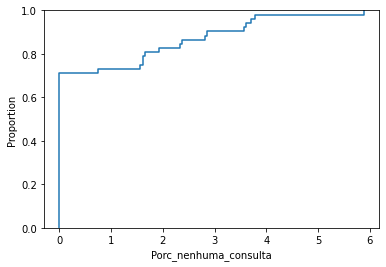

-----------------------------------------


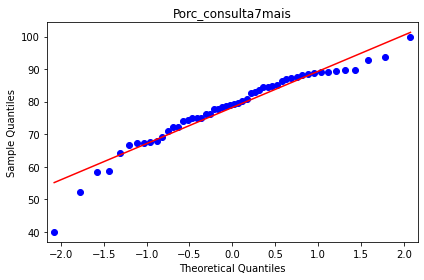

Shapiro-Wilk Test
Statistics=0.946, p=0.019
Sample does not look Gaussian (reject H0)


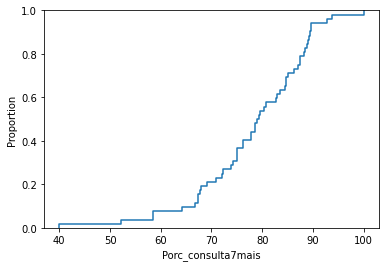

-----------------------------------------


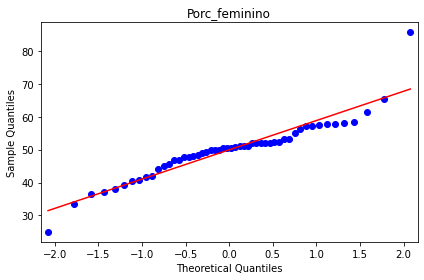

Shapiro-Wilk Test
Statistics=0.914, p=0.001
Sample does not look Gaussian (reject H0)


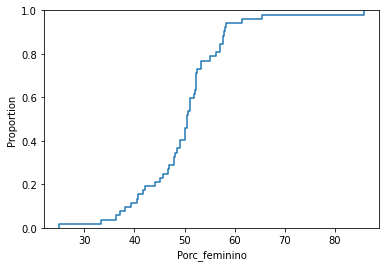

-----------------------------------------


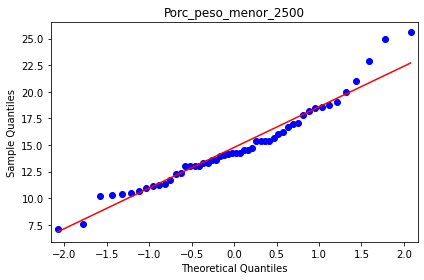

Shapiro-Wilk Test
Statistics=0.957, p=0.058
Sample looks Gaussian (fail to reject H0)


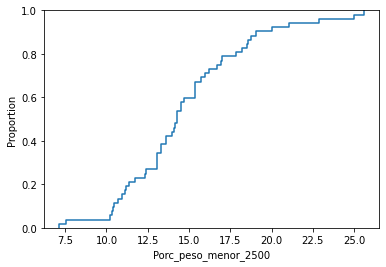

-----------------------------------------


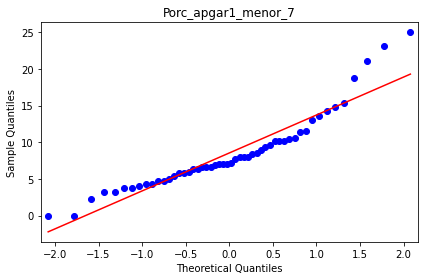

Shapiro-Wilk Test
Statistics=0.900, p=0.000
Sample does not look Gaussian (reject H0)


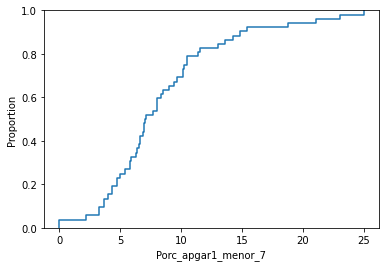

-----------------------------------------


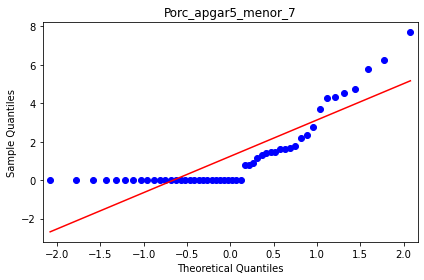

Shapiro-Wilk Test
Statistics=0.708, p=0.000
Sample does not look Gaussian (reject H0)


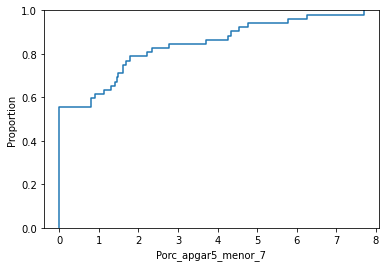

-----------------------------------------


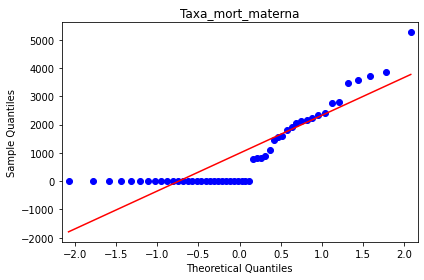

Shapiro-Wilk Test
Statistics=0.760, p=0.000
Sample does not look Gaussian (reject H0)


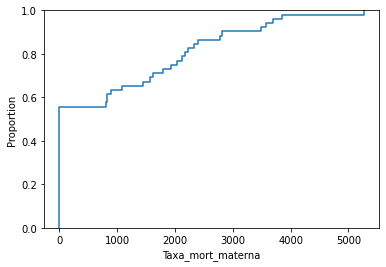

-----------------------------------------


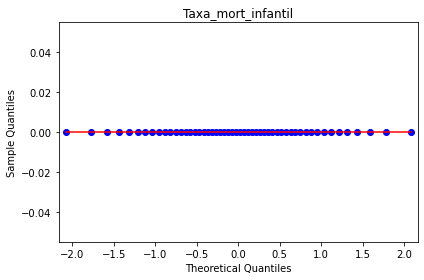

Shapiro-Wilk Test
Statistics=1.000, p=1.000
Sample looks Gaussian (fail to reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


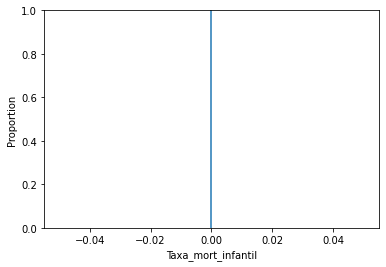

-----------------------------------------


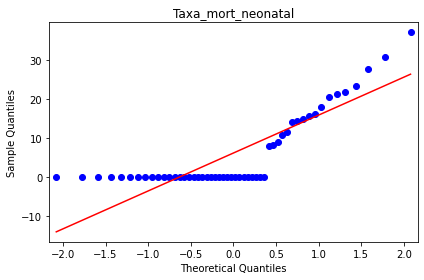

Shapiro-Wilk Test
Statistics=0.691, p=0.000
Sample does not look Gaussian (reject H0)


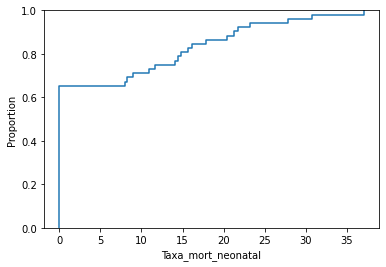

-----------------------------------------


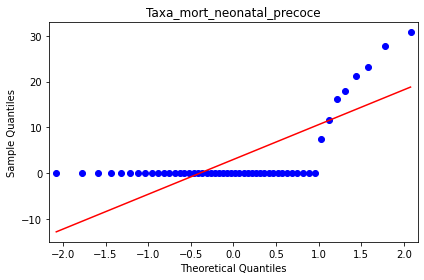

Shapiro-Wilk Test
Statistics=0.448, p=0.000
Sample does not look Gaussian (reject H0)


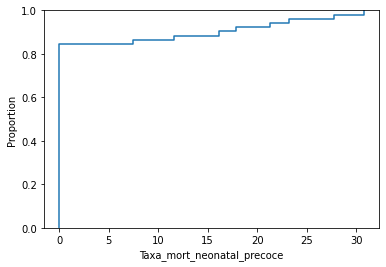

-----------------------------------------


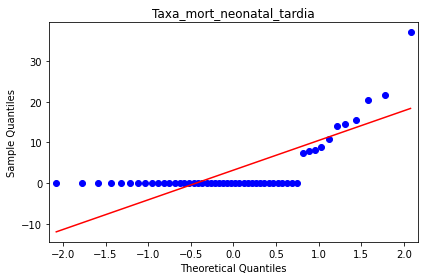

Shapiro-Wilk Test
Statistics=0.512, p=0.000
Sample does not look Gaussian (reject H0)


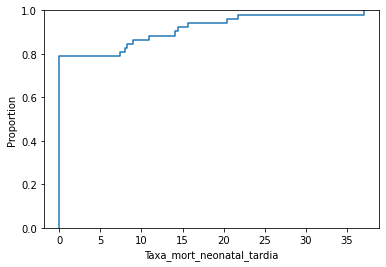

-----------------------------------------


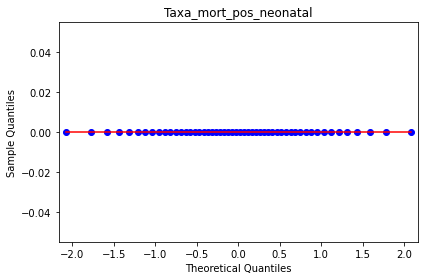

Shapiro-Wilk Test
Statistics=1.000, p=1.000
Sample looks Gaussian (fail to reject H0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


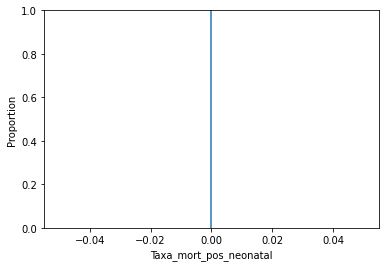

-----------------------------------------


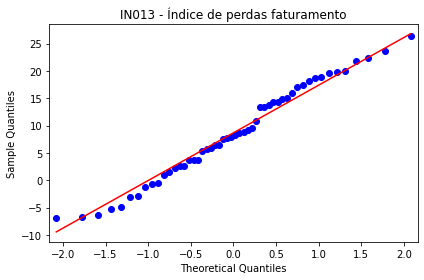

Shapiro-Wilk Test
Statistics=0.974, p=0.304
Sample looks Gaussian (fail to reject H0)


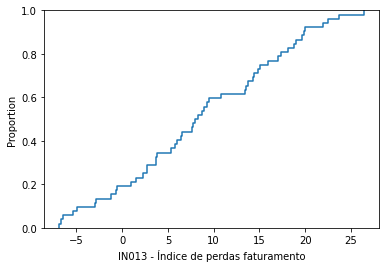

-----------------------------------------


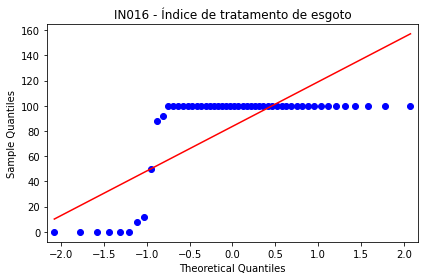

Shapiro-Wilk Test
Statistics=0.484, p=0.000
Sample does not look Gaussian (reject H0)


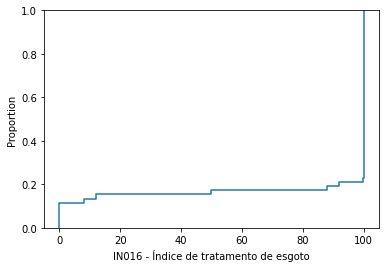

-----------------------------------------


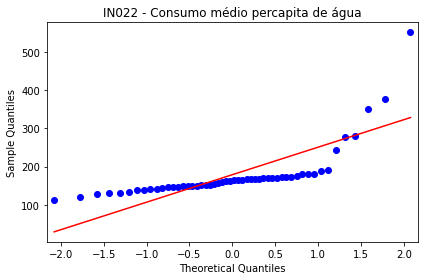

Shapiro-Wilk Test
Statistics=0.583, p=0.000
Sample does not look Gaussian (reject H0)


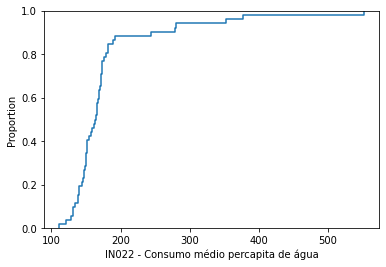

-----------------------------------------


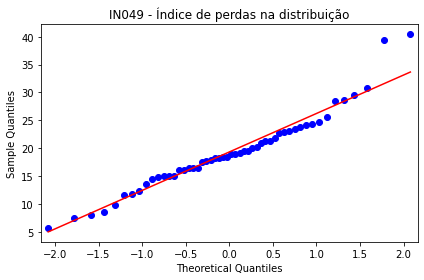

Shapiro-Wilk Test
Statistics=0.953, p=0.039
Sample does not look Gaussian (reject H0)


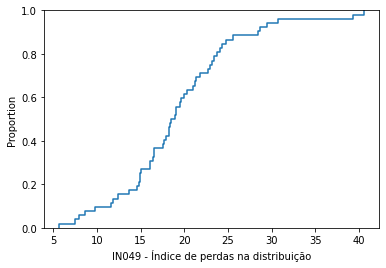

-----------------------------------------


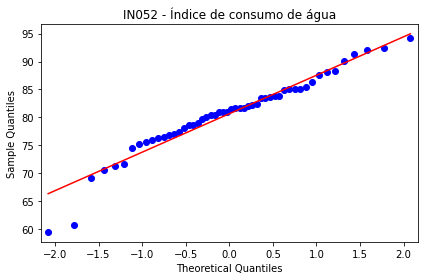

Shapiro-Wilk Test
Statistics=0.953, p=0.039
Sample does not look Gaussian (reject H0)


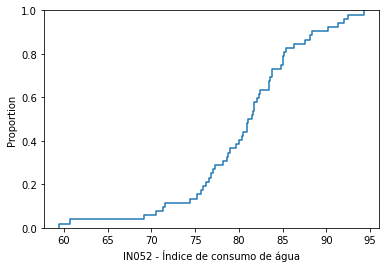

-----------------------------------------


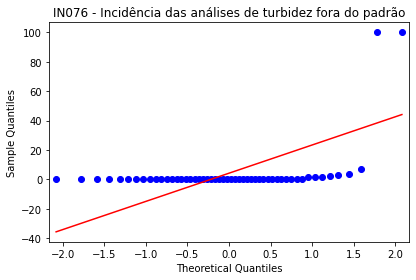

Shapiro-Wilk Test
Statistics=0.222, p=0.000
Sample does not look Gaussian (reject H0)


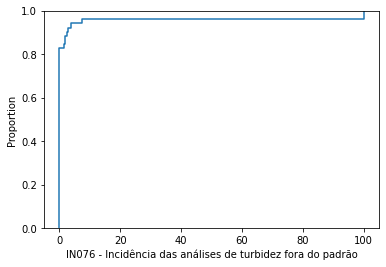

-----------------------------------------


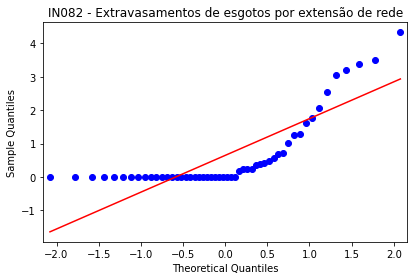

Shapiro-Wilk Test
Statistics=0.649, p=0.000
Sample does not look Gaussian (reject H0)


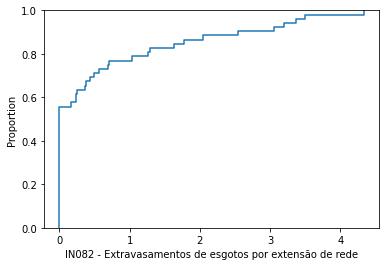

-----------------------------------------


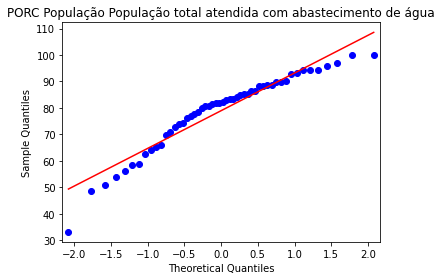

Shapiro-Wilk Test
Statistics=0.928, p=0.004
Sample does not look Gaussian (reject H0)


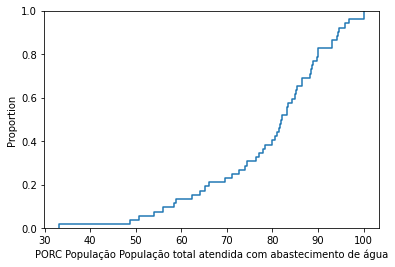

-----------------------------------------


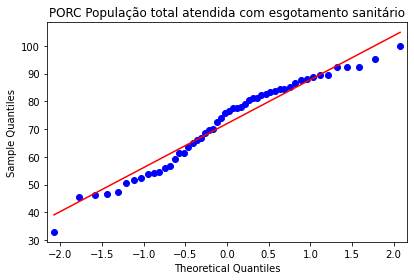

Shapiro-Wilk Test
Statistics=0.958, p=0.061
Sample looks Gaussian (fail to reject H0)


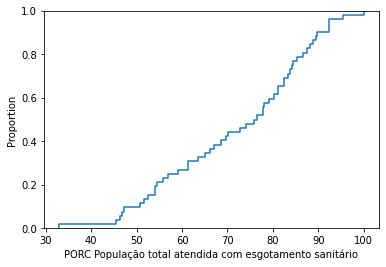

-----------------------------------------


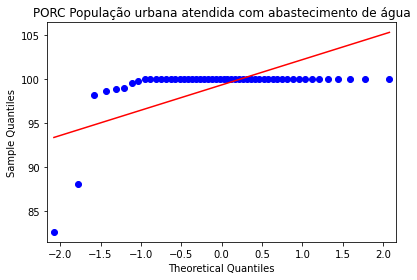

Shapiro-Wilk Test
Statistics=0.251, p=0.000
Sample does not look Gaussian (reject H0)


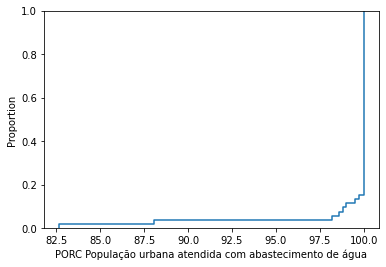

-----------------------------------------


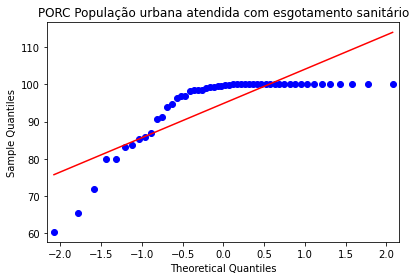

Shapiro-Wilk Test
Statistics=0.627, p=0.000
Sample does not look Gaussian (reject H0)


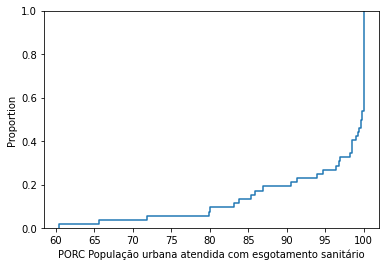

In [ ]:
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
import seaborn as sea

kendall = []

for i in range(7):
  
  print(f'\n \033[1m CLUSTER {str(i)} \033[0m \n')

  for f  in feats:
    #df[f] = (df[f] - df[f].mean()) / df[f].std()
    x = df.loc[X.Cluster == i][f]
    trend,h,p,z,tau,s,var_s,slope,intercept = mk.original_test(x)
    kendall.append([f, trend,h,p,z,tau,s,var_s,slope,intercept,i])

    print('-----------------------------------------')
    
    qqplot(x, line='s')

    titu = f
    
    plt.title(titu)
    plt.tight_layout()
    plt.show()# QQ Plot# Shapiro-Wilk Test
    print("Shapiro-Wilk Test")
    stat, p = shapiro(x)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
      print('Sample looks Gaussian (fail to reject H0)')
    else:
      print('Sample does not look Gaussian (reject H0)')
    plt.show()

    sea.ecdfplot(x)
    plt.show()

In [ ]:
feats = df.loc[:,'Nascimentos':'PORC População urbana atendida com esgotamento sanitário'].columns

In [ ]:
df_kendall = pd.DataFrame(kendall, columns=['feature', 'trend','h','p','z','tau','s','var_s','slope','intercept','cluster'])

df_kendall.sort_values(by='p', ascending=True)

feature       trend      h         p  \
0                                Nascimentos  increasing   True  0.012872   
145                    Porc_nenhuma_consulta  increasing   True  0.029419   
68                        Taxa_mort_infantil  decreasing   True  0.036335   
12                        Taxa_mort_infantil  increasing   True  0.040208   
181                       Taxa_mort_neonatal  decreasing   True  0.044070   
..                                       ...         ...    ...       ...   
128                   Taxa_mort_pos_neonatal    no trend  False  1.000000   
130   IN016 - Índice de tratamento de esgoto    no trend  False  1.000000   
131  IN022 - Consumo médio percapita de água    no trend  False  1.000000   
184                   Taxa_mort_pos_neonatal    no trend  False  1.000000   
121                      Porc_apgar1_menor_7    no trend  False  1.000000   

            z       tau       s          var_s     slope   intercept  cluster  
0    2.487295  0.133031  1671.0  450794.333333  2.201835  382.055046        0  
145  2.177822  0.347619    73.0    1093.000000  0.039689    0.333041        5  
68  -2.093158 -0.241742  -161.0    5843.000000 -0.285970   25.555618        2  
12   2.051608  0.108909  1368.0  443964.666667  0.005535    2.332812        0  
181 -2.013423 -0.163650  -217.0   11509.000000  0.000000    0.000000        6  
..        ...       ...     ...            ...       ...         ...      ...  
128  0.000000  0.000000     0.0       0.000000  0.000000    0.000000        4  
130  0.000000  0.000000     0.0      48.666667  0.000000  100.000000        4  
131  0.000000  0.000000     0.0      65.333333 -0.250000  153.675000        4  
184  0.000000  0.000000     0.0       0.000000  0.000000    0.000000        6  
121  0.000000  0.035714     1.0      64.333333  0.340567    6.850623        4  

[196 rows x 11 columns]

In [ ]:
df['Cluster'] = X.Cluster

In [ ]:
df.to_excel(r'snis_obr_2010_cluster.xlsx', index = False)